In [3]:
import pandas as pd
import pyodbc as db
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.dates as mdates
import numpy as np
import os
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import itertools
from datetime import datetime
from IPhreeqcPy import IPhreeqc
import math

In [4]:
# Ипорт базы данных в формат данных "пандас.датафрейфм",
# это 2хмерная матрица с заголовками колонок и индексами строк
conn = db.connect('Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=D:\\Kortunov\\transfer\\Esentuk\\РЕЖИМ_по частям.mdb;')
curs = conn.cursor()#эти штуки нужны для работы с базаой курс - это курсор, просто для перемещения по БД
for row in curs.tables(): #этот цикл пробешает по всем таблицам и пишет их имена, просто для навигации
    print(row.table_name)

MSysAccessObjects
MSysAccessXML
MSysACEs
MSysNameMap
MSysNavPaneGroupCategories
MSysNavPaneGroups
MSysNavPaneGroupToObjects
MSysNavPaneObjectIDs
MSysObjects
MSysQueries
MSysRelationships
###___К расчету ГАЗОВЫХ параметров
ДАННЫЕ ДЛЯ ГРАФИКОВ
Описание полей базы
ПОЛЯ БАЗ свойства
Скважины_АО_В РАСЧЕТЫ
Часть 1_Гидродинамика
Часть 2_Химия
Часть 3_Химия_МГУ
###_Выборка скважины для графика ХИМИЯ_НОВЫЙ
Выборка скважины для графика


In [5]:
tablename = 'ВСЕ ДАННЫЕ'
df_dyn = pd.read_sql_query("SELECT * FROM [Часть 1_Гидродинамика];", conn)#Это sql запрос, мы запрашиваем таблицу "все данные"
df_chem = pd.read_sql_query("SELECT * FROM [Часть 2_Химия];", conn)#Это sql запрос, мы запрашиваем таблицу "все данные"
#df_chem_msu = pd.read_sql_query("SELECT * FROM [Часть 3_Химия_МГУ];", conn)#Это sql запрос, мы запрашиваем таблицу "все данные"
df_info = pd.read_sql_query("SELECT * FROM [Скважины_АО_В РАСЧЕТЫ];", conn)#Это sql запрос, мы запрашиваем таблицу "все данные"
df = pd.read_sql_query("SELECT * FROM [###___К расчету ГАЗОВЫХ параметров];", conn)
# и сохраняем ее в пандас.датафйрем. Все, теперь мы можем с ней работать с помощью питона, причем с возможностью использовать силы модуля пандас
#pd.reset_option('display.max_rows', None)
pd.set_option('display.max_columns', None)#это опции визуалицации таблицы, в данном случае я прошу ее показать все колонки. 
#это я вывожу на экран датафрейм. Если в питонге пишешь просто переменную по всему, это тоже самое что команда print
curs.close()#закрываю базу данных, все, больше мы ее не используем, а используем первый датафрем где все данные хранятся для этого блокнота
conn.close()

In [6]:
df_dyn

,Year,Month,Day,Hour,Minute,IDPN,ДАТА,ДЕБИТ_СБОРНЫЙ_М3_СУТ,Напор вычисленный АО (м),Напор вычисленный МАКСИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО,Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО,Напор ДИНАМИЧЕСКИЙ вычисленный АО (м),Напор СТАТИЧЕСКИЙ вычисленный АО (м),Напор_СТАТ_на_устье_в_замере_ГФ_(метры)_ID_7805,Напор_ДИН_на_устье_в_замере_ГФ_(метры)_ID_7810,P_атмосферы_(SOLINST)_МАКС_СУТ_(Кпа)_ID_7111,P_атмосферы_(SOLINST)_МИН_СУТ_(Кпа)_ID_7112,P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110,P_атмосферы_в_замере_ГФ_(Кпа)_ID_7840,T_атмосферы_(SOLINST)_CРЕДН_СУТ_(Градус_С)_ID_7113,T_атмосферы_(SOLINST)_МАКС_СУТ_(Градус_С)_ID_7114,T_атмосферы_(SOLINST)_МИН_СУТ_(Градус_С)_ID_7115,Газовый_фактор_(м3_в_м3)_ID_7062,ГАЗОВЫЙ_ФАКТОР_поДОБЫЧЕ_(ЕЗМВ_Р)_(м3_в_м3)_ID_7104,Газовый_фактор_при_НТД_условиях_(м3_в_м3)_ID_7040,Давление_(ЕЗМВ)_P1_НА_УСТЬЕ_(кг_на_см2)_ID_7090,Давление_МАКС_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7574,Давление_МИН_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7572,Давление_СРЕД_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7570,Давление_СРЕД_СУТ_(ЕЗМВ)_Р2_(кг_на_см2)_ID_7578,Давление_СТ_ОТКЛ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7576,Дебит_(м3_в_сут)_ID_7057,Дебит_в_замере_ГФ_(м3_в_сут)_ID_7825,Дебит_воды_В_ЗАМЕРЕ_ГАЗ_ФАКТОРА_(л/с)_ID_7060,Дебит газа В ЗАМЕРЕ ГАЗ_ФАКТОРА (л/с) ID 7061,Динам__уровень_от_ТЗ_замер_техника_(метр)_ID_7055,Динамический_уровень_(Показания_манометра)_ID_7560,Динамический_уровень_от_ТЗ_(метры)_ID_7054,Динамический_уровень_от_устья_(метры)_ID_7053,Какое-то_время_(ЕЗМВ)_Tи_(час)_ID_7102,Какое-то_время_ЗА_СУТКИ__(ЕЗМВ)_Tи_(Час)_ID_7608,Масса_(ЕЗМВ)_M1_ГВС_НА_УСТЬЕ_(тонн)_ID_7098,Масса_(ЕЗМВ)_M2_ВОДЫ_В_ПУНКТ_НАЛИВА_(тонн)_ID_7099,Масса_(ЕЗМВ)_M3_НЕИЗВЕСТНО_(тонн)_ID_7100,Масса_ЗА_СУТКИ_(ЕЗМВ)_M1_ГВС_(тонн)_ID_7600,Масса_ЗА_СУТКИ_(ЕЗМВ)_M2_ВОДА_(тонн)_ID_7602,Масса_ЗА_СУТКИ_(ЕЗМВ)_M3_(тонн)_ID_7604,Напор_(SOLINST)_МАКСИМУМ_СУТОЧНЫЙ_(метры)_ID_7078,Напор_(SOLINST)_МИНИМУМ_СУТОЧНЫЙ_(метры)_ID_7079,Напор_(SOLINST)_СРЕДНЕЕ_СУТОЧНОЕ_(метры)_ID_7075,Напор_(АО)_(метры)_ID_7073,Напор_(ГИДЭК)_МАКСИМУМ_СУТОЧНЫЙ_(метры)_ID_7082,Напор_(ГИДЭК)_МИНИМУМ_СУТОЧНЫЙ_(метры)_ID_7083,Напор_(ГИДЭК)_СРЕДНЕЕ_СУТОЧНОЕ_(метры)_ID_7077,Напор_на_устье_в_замере_ГФ_(метры)_ID_7830,Напор_ДО_отбора_(ЕЗМВ_Р)__(АО_метры)_ID_7084,Напор_ПРИ_отборе_(ЕЗМВ_Р)__(АО_метры)_ID_7085,Объем_(ЕЗМВ)_V1_ГВС_НА_УСТЬЕ_(метр_куб)_ID_7095,Объем_(ЕЗМВ)_V2_ВОДЫ_В_П_НАЛИВА_(метр_куб)_ID_7096,Объем_(ЕЗМВ)_V3_НЕИЗВЕСТНО_(метр_куб)_ID_7097,Объем_ЗА_СУТКИ_(ЕЗМВ)_V1_ГВС_(метр_куб)_ID_7594,Объем_ЗА_СУТКИ_(ЕЗМВ)_V2_ВОДА_(метр_куб)_ID_7596,Объем_ЗА_СУТКИ_(ЕЗМВ)_V3_(метр_куб)_ID_7598,Оператор_динам_уровень_КОНТРОЛЬ_ВЗУ(метры)_ID_7011,"Оператор_пьез_уровень,_КОНТРОЛЬ_ВЗУ(метры)_ID_7010",Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087,Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086,ПОТЕРИ_при_отборе_(ЕЗМВ_Р)__(литр)_ID_7088,СБРОС_(ЕЗМВ_Р)__(метр_куб)_ID_7089,Статический_уровень_(Показания_манометра)_ID_7550,Статический_уровень_от_ТЗ_(метры)_ID_7051,Статический_уровень_от_устья_скв__(метры)_ID_7050,Температура_(SOLINST)_МАКС_СУТ_(Градус_С)_ID_7080,Температура_(SOLINST)_МИН_СУТ_(Градус_С)_ID_7081,Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076,Температура_(ЕЗМВ)_dt_ДЕЛЬТА_(Градус_С)_ID_7093,Температура_(ЕЗМВ)_t1_НА_УСТЬЕ_(Градус_С)_ID_7091,Температура_(ЕЗМВ)_t2_В_П_НАЛИВ_(Градус_С)_ID_7092,Температура_(ЕЗМВ)_tз_НЕИЗВЕСТН_(Градус_С)_ID_7094,Температура_воды_(Градус_С)_ID_7058,Температура_воды_в_замере_ГФ_(Градус_С)_ID_7820,Температура_воды_замер_машиниста(Градус_С)_ID_7059,Температура_воздуха_в_замере_ГФ_(Градус_С)_ID_7815,Температура_газа_в_замере_ГФ_(Градус_С)_ID_7835,Температура_динамическая_(Градус_С)_ID_7072,Температура_МАКС_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7584,Температура_МИН_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7582,Температура_при_отборе_пробы_(Градус_С)_ID_7012,Температура_СРЕД_СУТ_(ЕЗМВ)_dt_(Градус_С)_ID_7590,Температура_СРЕД_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7580,Температура_СРЕД_СУТ_(ЕЗМВ)_t2_(Градус_С)_ID_7588,Температура_СРЕД_СУТ_(ЕЗМВ)_t3_(Градус_С)_ID_7592,Температура_СТ_ОТКЛ_(ЕЗМВ)_t1_(Градус_С)_ID_7586,Температура_с

In [7]:
df = pd.concat([df,df_chem[['IDPN','ДАТА','Хлорид_Cl-_(грамм_в_литре)_ID_2301']],df_dyn[['IDPN','ДАТА','ДЕБИТ_СБОРНЫЙ_М3_СУТ']]], ignore_index=True, sort=True)
df

,IDPN,P_атмосферы_(SOLINST)_МАКС_СУТ_(Кпа)_ID_7111,P_атмосферы_(SOLINST)_МИН_СУТ_(Кпа)_ID_7112,P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110,P_атмосферы_в_замере_ГФ_(Кпа)_ID_7840,pH_водородный_показатель_ID_2201,Азот+метан_в_спонтанной_газовой_фазе_(%V)_ID_7067,Азот_N2_РАСТВОРЕННЫЙ_(объемный_процент)_ID_7212,Азот_N2_РАСТВОРЕННЫЙ_(см3_в_литре)_ID_7217,Азот_N2_в_спонтанной_газовой_фазе_(%V)_ID_3507,ГАЗОВЫЙ_ФАКТОР_поДОБЫЧЕ_(ЕЗМВ_Р)_(м3_в_м3)_ID_7104,Газовый фактор при НТД условиях (м3 в м3) ID 7040,Газовый_фактор_(м3_в_м3)_ID_7062,Газосодержание общее (литр в литре) ID 7565,Газосодержание_общее_в_зам_ГФ_(л_в_л)_ID_7850,Газосодержание_общее_в_зам_ГФ_НТД_(л_в_л)_ID_7855,Гелий_He_РАСТВОРЕННЫЙ_(объемный_процент)_ID_7210,Гелий_He_в_спонтанной_газовой_фазе_(%V)_ID_3702,Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303,ДАТА,ДЕБИТ_СБОРНЫЙ_М3_СУТ,Двуокись_CO2_РАСТ_в_зам_ГФ_(грамм_в_литре)_ID_7845,Двуокись_CO2_РАСТВОРЕННАЯ_(%V)_ID_7214,Двуокись_CO2_РАСТВОРЕННАЯ_(грамм_в_литре)_ID_7225,Двуокись_CO2_РАСТВОРЕННАЯ_(дм3_в_дм3)_ID_7063,Двуокись_CO2_РАСТВОРЕННАЯ_(см3_в_литре)_ID_7219,Двуокись_CO2_в_спонтанной_газовой_фазе(%V)_ID_7066,Двуокись_CO2_общая_(грамм_в_литре)_ID_2311,Двуокись_CO2_свободная_(грамм_в_литре)_ID_2310,Дебит газа В ЗАМЕРЕ ГАЗ_ФАКТОРА (л/с) ID 7061,Дебит_воды_В_ЗАМЕРЕ_ГАЗ_ФАКТОРА_(л/с)_ID_7060,Калий_ион_K+_(грамм_в_литре)_ID_2402,Кальций-ион_Ca++_(грамм_в_литре)_ID_2405,МГУ_ГАЗ__Ar___(%_объемный)_ID_7782,МГУ_ГАЗ__CH4___(%_объемный)_ID_7788,МГУ_ГАЗ__CO2___(%_объемный)_ID_7789,МГУ_ГАЗ__CO___(%_объемный)_ID_7787,МГУ_ГАЗ__He___(%_объемный)_ID_7784,МГУ_ГАЗ__N2___(%_объемный)_ID_7786,МГУ_ГАЗ__O2___(%_объемный)_ID_7783,МГУ_ГАЗ__Н2___(%_объемный)_ID_7785,МГУ_ГАЗ__Сумма___(%_объемный)_ID_7790,Магний-ион_Mg++_(грамм_в_литре)_ID_2404,Напор ДИНАМИЧЕСКИЙ вычисленный АО (м),Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО,Напор_на_устье_в_замере_ГФ_(метры)_ID_7830,Натрий-ион_Na+_(грамм_в_литре)_ID_2401,Общая_газонасыщенность_(м3_в_м3)_ID_7064,Сероводород_H2S_ОБЩИЙ_(грамм_в_литре)_ID_3504,Сероводород_H2S_СВОБОДНЫЙ_(грамм_в_литре)_ID_3511,Сульфат_SO4--_(грамм_в_литре)_ID_2302,Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403,Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206,Температура_(SOLINST)_МАКС_СУТ_(Градус_С)_ID_7080,Температура_(SOLINST)_МИН_СУТ_(Градус_С)_ID_7081,Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076,Температура_(ЕЗМВ)_t1_НА_УСТЬЕ_(Градус_С)_ID_7091,Температура_МАКС_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7584,Температура_МИН_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7582,Температура_СБОРНАЯ_(Градус_С),Температура_СРЕД_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7580,Температура_воды_(Градус_С)_ID_7058,Температура_воды_в_замере_ГФ_(Градус_С)_ID_7820,Температура_воды_замер_машиниста(Градус_С)_ID_7059,Температура_воздуха_в_замере_ГФ_(Градус_С)_ID_7815,Температура_газа_в_замере_ГФ_(Градус_С)_ID_7835,Температура_динамическая_(Градус_С)_ID_7072,Температура_при_отборе_пробы_(Градус_С)_ID_7012,Температура_статическая_(Градус_С)_ID_7071,Хлорид_Cl-_(грамм_в_литре)_ID_2301,кислород_O2_РАСТВОРЕННЫЙ_(%V)_ID_7211,кислород_O2_РАСТВОРЕННЫЙ_(см3_литре)_ID_7216,кислород_O2_в_спонтанной_газовой_фазе_(%V)_ID_3505,метан_CH4_РАСТВОРЕННЫЙ_(объемный_процент)_ID_7213,метан_CH4_РАСТВОРЕННЫЙ_(см3_в_литре)_ID_7218,метан_CH4_в_спонтанной_газовой_фазе_(%V)_ID_3508
0,251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,604.831,603.945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.4,16.5,16.723612,NaN,NaN,NaN,17.400000,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6422,2020-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3497,NaN,4.264,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1

In [8]:
wellnumbers =  pd.unique(df_info['ID PN']).astype(int)
index = np.argwhere(wellnumbers==90020)
#wellnumbers= wellnumbers.numpy.delete(90020)
wellnumbers = np.delete(wellnumbers, index)
wellnames = df_info['Номер скважины']
wellnames= wellnames.drop(7,axis=0)
wellnames= wellnames.reset_index(drop=True)
wellnames

0          418ʹ
1        41-бис
2            56
3     57-РЭ-бис
4           1-Э
5           2-Э
6            55
7     1-КМВ-бис
8         57-РЭ
9         58-РЭ
10           36
11          360
12        59-РЭ
13        389-н
14         21-н
15         11-н
16         20-н
17          7-н
18           41
19           39
20    23 (23-н)
21         45-а
22     1-НВ-бис
23           46
24         49-Э
25            9
26       75-бис
27           73
28         71-н
29       17-бис
30      418-бис
31           70
32           71
33           24
34       24-бис
35     24-бис-1
36       33-бис
37       34-бис
38       36-бис
39       39-бис
Name: Номер скважины, dtype: object

In [9]:
#df = pd.concat([df_dyn,df_chem], ignore_index=True, sort=False)
#df = pd.read_sql_query("SELECT * FROM [###___К расчету ГАЗОВЫХ параметров];", conn)
df

,IDPN,P_атмосферы_(SOLINST)_МАКС_СУТ_(Кпа)_ID_7111,P_атмосферы_(SOLINST)_МИН_СУТ_(Кпа)_ID_7112,P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110,P_атмосферы_в_замере_ГФ_(Кпа)_ID_7840,pH_водородный_показатель_ID_2201,Азот+метан_в_спонтанной_газовой_фазе_(%V)_ID_7067,Азот_N2_РАСТВОРЕННЫЙ_(объемный_процент)_ID_7212,Азот_N2_РАСТВОРЕННЫЙ_(см3_в_литре)_ID_7217,Азот_N2_в_спонтанной_газовой_фазе_(%V)_ID_3507,ГАЗОВЫЙ_ФАКТОР_поДОБЫЧЕ_(ЕЗМВ_Р)_(м3_в_м3)_ID_7104,Газовый фактор при НТД условиях (м3 в м3) ID 7040,Газовый_фактор_(м3_в_м3)_ID_7062,Газосодержание общее (литр в литре) ID 7565,Газосодержание_общее_в_зам_ГФ_(л_в_л)_ID_7850,Газосодержание_общее_в_зам_ГФ_НТД_(л_в_л)_ID_7855,Гелий_He_РАСТВОРЕННЫЙ_(объемный_процент)_ID_7210,Гелий_He_в_спонтанной_газовой_фазе_(%V)_ID_3702,Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303,ДАТА,ДЕБИТ_СБОРНЫЙ_М3_СУТ,Двуокись_CO2_РАСТ_в_зам_ГФ_(грамм_в_литре)_ID_7845,Двуокись_CO2_РАСТВОРЕННАЯ_(%V)_ID_7214,Двуокись_CO2_РАСТВОРЕННАЯ_(грамм_в_литре)_ID_7225,Двуокись_CO2_РАСТВОРЕННАЯ_(дм3_в_дм3)_ID_7063,Двуокись_CO2_РАСТВОРЕННАЯ_(см3_в_литре)_ID_7219,Двуокись_CO2_в_спонтанной_газовой_фазе(%V)_ID_7066,Двуокись_CO2_общая_(грамм_в_литре)_ID_2311,Двуокись_CO2_свободная_(грамм_в_литре)_ID_2310,Дебит газа В ЗАМЕРЕ ГАЗ_ФАКТОРА (л/с) ID 7061,Дебит_воды_В_ЗАМЕРЕ_ГАЗ_ФАКТОРА_(л/с)_ID_7060,Калий_ион_K+_(грамм_в_литре)_ID_2402,Кальций-ион_Ca++_(грамм_в_литре)_ID_2405,МГУ_ГАЗ__Ar___(%_объемный)_ID_7782,МГУ_ГАЗ__CH4___(%_объемный)_ID_7788,МГУ_ГАЗ__CO2___(%_объемный)_ID_7789,МГУ_ГАЗ__CO___(%_объемный)_ID_7787,МГУ_ГАЗ__He___(%_объемный)_ID_7784,МГУ_ГАЗ__N2___(%_объемный)_ID_7786,МГУ_ГАЗ__O2___(%_объемный)_ID_7783,МГУ_ГАЗ__Н2___(%_объемный)_ID_7785,МГУ_ГАЗ__Сумма___(%_объемный)_ID_7790,Магний-ион_Mg++_(грамм_в_литре)_ID_2404,Напор ДИНАМИЧЕСКИЙ вычисленный АО (м),Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО,Напор_на_устье_в_замере_ГФ_(метры)_ID_7830,Натрий-ион_Na+_(грамм_в_литре)_ID_2401,Общая_газонасыщенность_(м3_в_м3)_ID_7064,Сероводород_H2S_ОБЩИЙ_(грамм_в_литре)_ID_3504,Сероводород_H2S_СВОБОДНЫЙ_(грамм_в_литре)_ID_3511,Сульфат_SO4--_(грамм_в_литре)_ID_2302,Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403,Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206,Температура_(SOLINST)_МАКС_СУТ_(Градус_С)_ID_7080,Температура_(SOLINST)_МИН_СУТ_(Градус_С)_ID_7081,Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076,Температура_(ЕЗМВ)_t1_НА_УСТЬЕ_(Градус_С)_ID_7091,Температура_МАКС_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7584,Температура_МИН_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7582,Температура_СБОРНАЯ_(Градус_С),Температура_СРЕД_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7580,Температура_воды_(Градус_С)_ID_7058,Температура_воды_в_замере_ГФ_(Градус_С)_ID_7820,Температура_воды_замер_машиниста(Градус_С)_ID_7059,Температура_воздуха_в_замере_ГФ_(Градус_С)_ID_7815,Температура_газа_в_замере_ГФ_(Градус_С)_ID_7835,Температура_динамическая_(Градус_С)_ID_7072,Температура_при_отборе_пробы_(Градус_С)_ID_7012,Температура_статическая_(Градус_С)_ID_7071,Хлорид_Cl-_(грамм_в_литре)_ID_2301,кислород_O2_РАСТВОРЕННЫЙ_(%V)_ID_7211,кислород_O2_РАСТВОРЕННЫЙ_(см3_литре)_ID_7216,кислород_O2_в_спонтанной_газовой_фазе_(%V)_ID_3505,метан_CH4_РАСТВОРЕННЫЙ_(объемный_процент)_ID_7213,метан_CH4_РАСТВОРЕННЫЙ_(см3_в_литре)_ID_7218,метан_CH4_в_спонтанной_газовой_фазе_(%V)_ID_3508
0,251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,604.831,603.945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.4,16.5,16.723612,NaN,NaN,NaN,17.400000,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6422,2020-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3497,NaN,4.264,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1

In [10]:
def reorder_columns(columns, first_cols=[], last_cols=[], drop_cols=[]):
    columns = list(set(columns) - set(first_cols))
    columns = list(set(columns) - set(drop_cols))
    columns = list(set(columns) - set(last_cols))
    new_order = first_cols + columns + last_cols
    return new_order

In [11]:
countnulls1

NameError: name 'countnulls1' is not defined

In [178]:
#wellnumbers = [140,6002,111,112,10071,141,101,355,10070,46,,,,,,,,,,,,,,,,,,,,,,,,]
#wellnames = ['1-KMV-BIS','75-bis','1-E','2-E','71','55','34-бис','24-бис-1','70','46','39-бис','36-бис','49-Э','9','56','33-бис','41-бис','57-РЭ-бис']
params = {
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 23,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [40/2.54, 20/2.54],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
       }
rcParams.update(params)
xlim = ('2009-01')
xlim = datetime.strptime(xlim , '%Y-%m')
for a in range(0,len(wellnames)):

    print(a)
    print(wellnumbers[a])
    print(wellnames[a])
    well = df[df['IDPN'] == wellnumbers[a]]
    well = well[(well['ДАТА'] > xlim)]
    df_dyn = df_dyn[(df_dyn['ДАТА'] > xlim)]
    
    #    well = well[(well['ДАТА'] > xlim)]
    df_out = pd.DataFrame()
    countnulls = well['Газовый_фактор_(м3_в_м3)_ID_7062'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
    #countnulls = well['Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040'].count()
    aa = df_info.loc[df_info['ID PN'] == wellnumbers[a], 'АО Точки Замера'].values
    countnulls1 = well['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
    if countnulls > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график
        print('YES')
        df2 = pd.DataFrame()
        df_out = pd.DataFrame()
        df2 = well.groupby("ДАТА").mean()
        df2['ДАТА'] = df2.index
        df_out =  df2[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Минерализация_(грамм_в_литре)_ID_2208','Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Двуокись_CO2_РАСТВОРЕННАЯ_(грамм_в_литре)_СБОРНАЯ','Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076','Температура_СРЕД_СУТ_(ЕЗМВ)_dt_(Градус_С)_ID_7590','Температура_при_отборе_пробы_(Градус_С)_ID_7012']]
        df_out['ДАТА'] = pd.to_datetime(df_out['ДАТА'])
        df_dyn['ДАТА']= pd.to_datetime(df_dyn['ДАТА'])
        df_out = df_out.reset_index(drop=True)
        df_out = pd.merge_asof(df_out, df_dyn[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna(), on="ДАТА", tolerance=pd.Timedelta("2ms"))
        

        df_out['Давление на устье, kPa'] = (df_out['Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО']-aa)*9.807
        df_out['Давление на устье, kPa']= df_out['Давление на устье, kPa'].combine_first((df_out['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)']-aa)*9.807)
        my_list = df_out.columns.tolist()
        reordered_cols = reorder_columns(my_list, first_cols=['ДАТА', 'Давление на устье, kPa', 'Газовый_фактор_(м3_в_м3)_ID_7062','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Минерализация_(грамм_в_литре)_ID_2208'], last_cols=['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'], drop_cols=['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО'])
        df_out = df_out[reordered_cols]

        df_out= df_out[df_out['Газовый_фактор_(м3_в_м3)_ID_7062'].notna()]
        df_out= df_out[df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].notna()]
        df_out['Давление на устье, kPa']=df_out['Давление на устье, kPa'].fillna(method='ffill')
    
    elif countnulls1 > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график
        print('Check_gaz_factor')
        print(wellnames[a])
        df2 = pd.DataFrame()
        df2 = well.groupby("ДАТА").mean()
        df2['ДАТА'] = df2.index
        df_gaz_factor = pd.DataFrame()
        df_gaz_factor['ДАТА']= df2['ДАТА']
        df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']= df2['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
        df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086'] = df2['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']
#        df_gaz_factor['Давление'] = df2['Давление_МИН_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7572']*98.0665
        df_gaz_factor = df_gaz_factor.dropna()


#        print('a = ',aa)

 #kpa
        df_gaz_factor['Давление'] = (df2['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)'] - aa)*9.807 #kpa
        df_gaz_factor['debit gaza'] = df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']-df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
        df_gaz_factor['gaz_factor'] = df_gaz_factor['debit gaza']/df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
        df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062'] = (df_gaz_factor['gaz_factor']*df_gaz_factor['Давление'])/101.325# для одной атмосферы
        df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062'] = df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062'][df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062'] > 0]
        df_gaz_factor = df_gaz_factor.reset_index(drop=True)
        df2 =  df2.reset_index(drop=True)
        del df2['Газовый_фактор_(м3_в_м3)_ID_7062']
       
        df2 = pd.merge_asof(df2, df_gaz_factor[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062']].dropna(), on="ДАТА", tolerance=pd.Timedelta("2ms"))
        df_out =  df2[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Минерализация_(грамм_в_литре)_ID_2208','Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Двуокись_CO2_РАСТВОРЕННАЯ_(грамм_в_литре)_СБОРНАЯ','Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076','Температура_СРЕД_СУТ_(ЕЗМВ)_dt_(Градус_С)_ID_7590','Температура_при_отборе_пробы_(Градус_С)_ID_7012','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО']]
        df_out['ДАТА'] = pd.to_datetime(df_out['ДАТА'])
        df_dyn['ДАТА']= pd.to_datetime(df_dyn['ДАТА'])
        df_out = df_out.reset_index(drop=True)
        df_out = pd.merge_asof(df_out, df_dyn[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna(), on="ДАТА", tolerance=pd.Timedelta("2ms"))
        df_out['Давление на устье, kPa'] = (df_out['Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО']-aa)*9.807
        df_out['Давление на устье, kPa']= df_out['Давление на устье, kPa'].combine_first((df_out['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)']-aa)*9.807) 
        my_list = df_out.columns.tolist()
        reordered_cols = reorder_columns(my_list, first_cols=['ДАТА', 'Давление на устье, kPa','Газовый_фактор_(м3_в_м3)_ID_7062','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Минерализация_(грамм_в_литре)_ID_2208'], last_cols=['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'], drop_cols=['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО'])
        df_out = df_out[reordered_cols]

        df_out= df_out[df_out['Газовый_фактор_(м3_в_м3)_ID_7062'].notna()]
        df_out= df_out[df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].notna()]
        df_out['Давление на устье, kPa']=df_out['Давление на устье, kPa'].fillna(method='ffill')
    else:
        continue
    df_out= df_out[df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].notna()]
    df_out= df_out[df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404'].notna()]
    df_out= df_out[df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303'].notna()]
    df_out= df_out[df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302'].notna()]
    df_out= df_out[df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].notna()]
    
#    df_out= df_out[df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].notna()]
#    df_out= df_out[df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].notna()]
    
    df_out['popravka,m'] = np.NaN

    for nomer_stroky in range(0, len(df_out.index)):
        if df_out['pH_водородный_показатель_ID_2201'].iloc[nomer_stroky] > 0:
            ph = str(df_out['pH_водородный_показатель_ID_2201'].iloc[nomer_stroky])
        else:
            ph = str(6.5)
            
#        print(nomer_stroky)
        
        if df_out['Давление на устье, kPa'].iloc[nomer_stroky] >0:
            pressure = df_out['Давление на устье, kPa'].iloc[nomer_stroky]*0.00987
        else:
            pressure = 1
        bottom = 150
 #       bottom = float(df_info.loc[df_info['ID PN']  == wellnumbers[a], 'glub'].values/10)
        press_diff = bottom-pressure
        x = IPhreeqc() #initalize IPhreeqc object
        x.LoadDatabase('pitzer.dat') # Load database
        x.SetDumpStringOn()   #set DumpString output on
        x.AccumulateLine(
        """
        SOLUTION 1
            temp      18
            pH"""        +' '+ str(ph))
        x.AccumulateLine("""
            pe        4
            redox     pe
            units     mol/l
            density   1
            C(4)"""     +str(' '+ str(df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303'].iloc[nomer_stroky]/61.008) +' charge'))
        x.AccumulateLine("""
            Ca"""+' '+        str(df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].iloc[nomer_stroky]/40))
        x.AccumulateLine("""
            Cl"""+' '+        str(df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].iloc[nomer_stroky]/35.45))
        x.AccumulateLine("""
            Mg""" +' '+        str(df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404'].iloc[nomer_stroky]/24.305))
        x.AccumulateLine("""
            Na"""  +' '+        str(df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].iloc[nomer_stroky]/22.99))
        x.AccumulateLine("""
            S(6)""" +' '+        str(df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302'].iloc[nomer_stroky]/96.06))
        x.AccumulateLine("""
            -water    1 # kg

        GAS_PHASE 1
            -fixed_pressure
            -pressure 1
            -volume"""  +' '+        str(df_out['Газовый_фактор_(м3_в_м3)_ID_7062'].iloc[nomer_stroky]))
        x.AccumulateLine("""
           -temperature 18
            CO2(g)    1
            H2O(g)    0
        REACTION_PRESSURE 1
              """)
        x.AccumulateLine(   str(round(pressure,2))+' '+str(round(bottom,2)) + ' in ' + str(round(press_diff)*10)+ ' steps')
        x.AccumulateLine("""
        SELECTED_OUTPUT
            -file     1_kmv_bis.out
            -user_punch           false
            -high_precision       false
            -reset
            -simulation	true
            -gases CO2(g) H2O(g)
        END
        """
        ) 
        x.RunAccumulated() #Run phreeqc
        df1 = pd.DataFrame()
        bbb = x.GetSelectedOutputArray()
        headers = bbb.pop(0)
        df1 = pd.DataFrame(bbb, columns=headers)
        df1 = df1.iloc[1:]
        df1['CO2,kg']=df1['g_CO2(g)']*(12+32)/1000
        df1['densetyCO2, kg/l']=df1['CO2,kg']/df1['volume']
        df1['densety, kg/m3'] = (df1['CO2,kg']+1)/(df1['volume']/1000+1/1000)
        df1['delta_h, m'] = 101325*(round(press_diff,2)/(round(press_diff)-1)/10)/df1['densety, kg/m3']/9.80665
        df1['H,m'] = df1['delta_h, m'].cumsum()
        df1['real pressure, atm'] = df1['pressure']+pressure
        delta_p = round(press_diff,2)/(round(press_diff)-1)/10
        df1['popravka'] = df1['delta_h, m']-delta_p*10.332
        df_out['popravka,m'].iloc[nomer_stroky]= df1['popravka'].sum()
    directory = 'D:\\WORK\\MSU\\Esentuk\\popravka'
    filename = '\\'+str(wellnames[a]+'.csv')
    fullpath = directory + filename
    if not os.path.exists(directory):
        os.makedirs(directory)
    keepcharacters = (' ','.','_',')','(','\\',':')
    fullpath2 = "".join(c for c in fullpath if c.isalnum() or c in keepcharacters).rstrip()
    df_out.to_csv(fullpath2, index=False,encoding= 'utf-8-sig')
#    plt.plot(df_out['ДАТА'],df_out['popravka,m'],'o')
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)# Тут примерно все тоже самое, только я создаю рисунок а на нем говорю, чтро будет 4 сабплота и в данном случае вызываю 1. 4 это количество, 1 это адрес по горищонтали, 1 это адрес по вертикали
    ax.annotate('Скважина №'+ str(wellnames[a])+ ' ('+str(wellnumbers[a])+')',
        xy=(0.85, 1.1), xycoords='axes fraction',
        horizontalalignment='center', verticalalignment='top',
        fontsize=30, color = 'black') #here goes the annotation of well number and well name in the top right of every subplot
    lns1 = ax.plot(df_out['ДАТА'],df_out['popravka,m'],'o', alpha = 0.6, color = "maroon",label = 'Газовый_фактор',markersize=14)
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#            ax.xaxis.set_minor_locator(MultipleLocator(12))
    ax.tick_params(which='minor', length=4)
    ax.tick_params(which='major', length=5, width=2)
    months = mdates.MonthLocator() 
    ax.xaxis.set_minor_locator(months)

    ax.set_ylabel('Поправка к напору на забое скважины, м', color = "black")
    ax.set_xlabel('Дата, года', color = "Black")
    ax.tick_params('y', colors= "black")


    #lns1 = ax.plot(well['ДАТА'], well['Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040'],'o', alpha = 0.6, color = "maroon",label = 'Газовый_фактор',markersize=14)
#    plt.show()

    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    fig.set_facecolor('white')# тут я решил сделать белый фон, а не прозрачный как в прошлом скрипте
    directory = 'D:\\WORK\\MSU\\Esentuk\\popravka_figures'
    filename = '\\'+str(wellnames[a])# и рисунок поменял на джипег
    fullpath = directory + filename
    if not os.path.exists(directory):
        os.makedirs(directory)
    keepcharacters = (' ','.','_',')','(','\\',':')
    fullpath2 = "".join(c for c in fullpath if c.isalnum() or c in keepcharacters).rstrip()
    plt.savefig(fullpath2,dpi=300,facecolor='w',bbox_inches = 'tight',pad_inches = 0)#,transparent=True)
    plt.close()
    fig.clf

0
140
1-КМВ-бис
YES


KeyError: "['Двуокись_CO2_РАСТВОРЕННАЯ_(грамм_в_литре)_СБОРНАЯ', 'Минерализация_(грамм_в_литре)_ID_2208', 'Температура_СРЕД_СУТ_(ЕЗМВ)_dt_(Градус_С)_ID_7590'] not in index"

In [333]:
str(pressure)+' '+str(bottom) + ' in ' + str(100)+ ' steps'

'17.166125236049993 146.8 in 100 steps'

In [327]:
pressure = df_out['Давление на устье, kPa'].iloc[nomer_stroky]*0.00987
bottom = float(df_info.loc[df_info['ID PN'] == 140, 'glub'].values/10)
press_diff = round(bottom,2) - round(pressure,2)
press_diff

129.63

In [353]:
print(18.182734 - 17.170000)
print(round(press_diff,2)/math.floor(press_diff))
round(press_diff)
math.floor(press_diff)

1.0127339999999982
1.0048837209302326


129

In [533]:
well = df[df['IDPN'] ==6002]
well = well[(well['ДАТА'] > xlim)]
df_dyn = df_dyn[(df_dyn['ДАТА'] > xlim)]
#    well = well[(well['ДАТА'] > xlim)]

countnulls = well['Газовый_фактор_(м3_в_м3)_ID_7062'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
#countnulls = well['Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040'].count()
aa = df_info.loc[df_info['ID PN'] == 6002, 'АО Точки Замера'].values

In [660]:
#countnulls1 = well['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
countnulls1 = well['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
if countnulls1 > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график
    print('Check_gaz_factor')
#    print(wellnames[a])
    df2 = pd.DataFrame()
    df2 = well.groupby("ДАТА").mean()
    df2['ДАТА'] = df2.index
    df_gaz_factor = pd.DataFrame()
    df_gaz_factor['ДАТА']= df2['ДАТА']
    df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']= df2['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
    df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086'] = df2['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']
#        df_gaz_factor['Давление'] = df2['Давление_МИН_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7572']*98.0665
    df_gaz_factor = df_gaz_factor.dropna()


#        print('a = ',aa)

#kpa
    df_gaz_factor['Давление'] = (df2['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)'] - aa)*9.807 #kpa
    df_gaz_factor['debit gaza'] = df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']-df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
    df_gaz_factor['gaz_factor'] = df_gaz_factor['debit gaza']/df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
    df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062'] = (df_gaz_factor['gaz_factor']*df_gaz_factor['Давление'])/101.325# для одной атмосферы
    df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062'] = df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062'][df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062'] > 0]
    df_gaz_factor = df_gaz_factor.reset_index(drop=True)
    df2 =  df2.reset_index(drop=True)
    del df2['Газовый_фактор_(м3_в_м3)_ID_7062']

    df2 = pd.merge_asof(df2, df_gaz_factor[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062']].dropna(), on="ДАТА", tolerance=pd.Timedelta("2ms"))
    df_out =  df2[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Минерализация_(грамм_в_литре)_ID_2208','Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Двуокись_CO2_РАСТВОРЕННАЯ_(грамм_в_литре)_СБОРНАЯ','Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076','Температура_СРЕД_СУТ_(ЕЗМВ)_dt_(Градус_С)_ID_7590','Температура_при_отборе_пробы_(Градус_С)_ID_7012','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО']]
    df_out['ДАТА'] = pd.to_datetime(df_out['ДАТА'])
    df_dyn['ДАТА']= pd.to_datetime(df_dyn['ДАТА'])
    df_out = df_out.reset_index(drop=True)
    df_out = pd.merge_asof(df_out, df_dyn[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna(), on="ДАТА", tolerance=pd.Timedelta("2ms"))
    df_out['Давление на устье, kPa'] = (df_out['Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО']-aa)*9.807
    df_out['Давление на устье, kPa']= df_out['Давление на устье, kPa'].combine_first((df_out['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)']-aa)*9.807) 
    my_list = df_out.columns.tolist()
    reordered_cols = reorder_columns(my_list, first_cols=['ДАТА', 'Давление на устье, kPa','Газовый_фактор_(м3_в_м3)_ID_7062','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Минерализация_(грамм_в_литре)_ID_2208'], last_cols=['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'], drop_cols=['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО'])
    df_out = df_out[reordered_cols]

    df_out= df_out[df_out['Газовый_фактор_(м3_в_м3)_ID_7062'].notna()]
    df_out= df_out[df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].notna()]
    df_out['Давление на устье, kPa']=df_out['Давление на устье, kPa'].fillna(method='ffill')
    
df_out= df_out[df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404'].notna()]
df_out= df_out[df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303'].notna()]
df_out= df_out[df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302'].notna()]
df_out= df_out[df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].notna()]
#    df_out= df_out[df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].notna()]
#    df_out= df_out[df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].notna()]

df_out['popravka,m'] = np.NaN

#for nomer_stroky in range(0, len(df_out.index)):
nomer_stroky = 0
print(nomer_stroky)


pressure = df_out['Давление на устье, kPa'].iloc[nomer_stroky]*0.00987
bottom = 150
#       bottom = float(df_info.loc[df_info['ID PN']  == wellnumbers[a], 'glub'].values/10)
press_diff = bottom-pressure
x = IPhreeqc() #initalize IPhreeqc object
x.LoadDatabase('pitzer.dat') # Load database
#x.SetDumpStringOn()   #set DumpString output on
x.AccumulateLine(
"""
DATABASE ../database/pitzer.dat
SOLUTION 1
    temp      18
    pH"""        +' '+ str(df_out['pH_водородный_показатель_ID_2201'].iloc[nomer_stroky]))
x.AccumulateLine("""
    pe        4
    redox     pe
    units     mol/l
    density   1
    C(4)"""     +str(' '+ str(df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303'].iloc[nomer_stroky]/61.008) +' charge'))
x.AccumulateLine("""
    Ca"""+' '+        str(df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].iloc[nomer_stroky]/40))
x.AccumulateLine("""
    Cl"""+' '+        str(df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].iloc[nomer_stroky]/35.45))
x.AccumulateLine("""
    Mg""" +' '+        str(df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404'].iloc[nomer_stroky]/24.305))
x.AccumulateLine("""
    Na"""  +' '+        str(df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].iloc[nomer_stroky]/22.99))
x.AccumulateLine("""
    S(6)""" +' '+        str(df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302'].iloc[nomer_stroky]/96.06))
x.AccumulateLine("""
    -water    1 # kg

GAS_PHASE 1
    -fixed_pressure
    -pressure 1
    -volume"""  +' '+        str(df_out['Газовый_фактор_(м3_в_м3)_ID_7062'].iloc[nomer_stroky]))
x.AccumulateLine("""
   -temperature 18
    CO2(g)    1
    H2O(g)    0
REACTION_PRESSURE 1
      """)
x.AccumulateLine(   str(round(pressure,2))+' '+str(round(bottom,2)) + ' in ' + str(round(press_diff))+ ' steps')
x.AccumulateLine("""
SELECTED_OUTPUT
    -file     1_kmv_bis.out
    -user_punch           false
    -high_precision       false
    -reset
    -simulation	true
    -totals    C(4) Ca Cl Mg  Na S(6)
    -gases CO2(g) H2O(g)
END
"""
) 
x.RunAccumulated() #Run phreeqc
df1 = pd.DataFrame()
bbb = x.GetSelectedOutputArray()
headers = bbb.pop(0)
df1 = pd.DataFrame(bbb, columns=headers)
df1 = df1.iloc[1:]
df1['CO2,kg']=df1['g_CO2(g)']*(12+32)/1000
df1['densetyCO2, kg/l']=df1['CO2,kg']/df1['volume']
df1['densety, kg/m3'] = (df1['CO2,kg']+1)/(df1['volume']/1000+1/1000)
df1['delta_h, m'] = 101325*(step)/df1['densety, kg/m3']/9.80665
df1['H,m'] = df1['delta_h, m'].cumsum()
df1['real pressure, atm'] = df1['pressure']+pressure
delta_p = round(press_diff,2)/(round(press_diff)-1)
df1['popravka'] = df1['delta_h, m']-delta_p*10.332
df_out['popravka,m'].iloc[nomer_stroky]= df1['popravka'].sum()
df1

Check_gaz_factor


C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0


C:\Users\Hydro\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,sim,state,soln,dist_x,time,step,pH,pe,reaction,temp(C),Alk(eq/kgw),mu,mass_H2O,charge(eq),pct_err,C(4)(mol/kgw),Ca(mol/kgw),Cl(mol/kgw),Mg(mol/kgw),Na(mol/kgw),S(6)(mol/kgw),pressure,total mol,volume,g_CO2(g),g_H2O(g),"CO2,kg","densetyCO2, kg/l","densety, kg/m3","delta_h, m","H,m","real pressure, atm",popravka
1,1,react,1,-99.0,0.0,1,5.219207,4.0,-99,18.0,0.062014,0.140383,0.999950,4.883906e-13,2.424761e-10,0.741402,0.025704,0.019832,0.004535,0.040239,0.009435,16.700000,2.192351,3.136465,2.189713,0.002638,0.096347,0.030718,265.044525,39.179389,39.179389,33.400058,28.745635
2,1,react,1,-99.0,0.0,2,5.193867,4.0,-99,18.0,0.062014,0.140383,0.999954,4.885536e-13,2.425548e-10,0.782534,0.025704,0.019832,0.004535,0.040239,0.009435,17.709848,2.151021,2.901860,2.148580,0.002441,0.094538,0.032578,280.516837,37.018393,76.197783,34.409906,26.584639
3,1,react,1,-99.0,0.0,3,5.169944,4.0,-99,18.0,0.062014,0.140384,0.999957,4.884912e-13,2.425217e-10,0.823667,0.025704,0.019832,0.004535,0.040238,0.009435,18.719697,2.109712,2.692595,2.107447,0.002265,0.092728,0.034438,295.924060,35.091039,111.288821,35.419755,24.657284
4,1,react,1,-99.0,0.0,4,5.147290,4.0,-99,18.0,0.062014,0.140384,0.999960,4.884704e-13,2.425093e-10,0.864799,0.025704,0.019832,0.004535,0.040238,0.009435,19.729545,2.068420,2.504774,2.066313,0.002107,0.090918,0.036298,311.266271,33.361413,144.650234,36.429603,22.927658
5,1,react,1,-99.0,0.0,5,5.125777,4.0,-99,18.0,0.062013,0.140385,0.999962,4.884738e-13,2.425091e-10,0.905932,0.025704,0.019831,0.004535,0.040238,0.009435,20.739394,2.027145,2.335261,2.025180,0.001964,0.089108,0.038158,326.543548,31.800606,176.450840,37.439452,21.366851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,1,react,1,-99.0,0.0,129,4.579427,4.0,-99,18.0,0.062011,0.140403,0.999997,4.895598e-13,2.429772e-10,2.931086,0.025703,0.019831,0.004535,0.040237,0.009435,145.960606,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1000.000000,10.384283,1774.686510,162.660664,-0.049472
130,1,react,1,-99.0,0.0,130,4.579105,4.0,-99,18.0,0.062011,0.140403,0.999997,4.897853e-13,2.430891e-10,2.931086,0.025703,0.019831,0.004535,0.040237,0.009435,146.970455,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1000.000000,10.384283,1785.070792,163.670512,-0.049472
131,1,react,1,-99.0,0.0,131,4.578784,4.0,-99,18.0,0.062011,0.140403,0.999997,4.898269e-13,2.431097e-10,2.931086,0.025703,0.019831,0.004535,0.040237,0.009435,147.980303,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1000.000000,10.384283,1795.455075,164.680361,-0.049472
132,1,react,1,-99.0,0.0,132,4.578462,4.0,-99,18.0,0.062011,0.140403,0.999997,4.897541e-13,2.430734e-10,2.931086,0.025703,0.019831,0.004535,0.040237,0.009435,148.990152,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1000.000000,10.384283,1805.839358,165.690209,-0.049472


In [662]:
x.AccumulateLine(   str(round(pressure,2))+' '+str(round(bottom,2)) + ' in ' + str(round(press_diff)*10)+ ' steps')
x.AccumulateLine("""
SELECTED_OUTPUT
    -file     1_kmv_bis.out
    -user_punch           false
    -high_precision       false
    -reset
    -simulation	true
    -gases CO2(g) H2O(g)
END
"""
) 
x.RunAccumulated() #Run phreeqc
df1 = pd.DataFrame()
bbb = x.GetSelectedOutputArray()
headers = bbb.pop(0)
df1 = pd.DataFrame(bbb, columns=headers)
df1 = df1.iloc[1:]
df1['CO2,kg']=df1['g_CO2(g)']*(12+32)/1000
df1['densetyCO2, kg/l']=df1['CO2,kg']/df1['volume']
df1['densety, kg/m3'] = (df1['CO2,kg']+1)/(df1['volume']/1000+1/1000)
df1['delta_h, m'] = 101325*(round(press_diff,2)/(round(press_diff)-1)/10)/df1['densety, kg/m3']/9.80665
df1['H,m'] = df1['delta_h, m'].cumsum()
df1['real pressure, atm'] = df1['pressure']+pressure
delta_p = round(press_diff,2)/(round(press_diff)-1)/10
df1['popravka'] = df1['delta_h, m']-delta_p*10.332
df_out['popravka,m'].iloc[nomer_stroky]= df1['popravka'].sum()

,ДАТА,"Давление на устье, kPa",Газовый_фактор_(м3_в_м3)_ID_7062,pH_водородный_показатель_ID_2201,Кальций-ион_Ca++_(грамм_в_литре)_ID_2405,Хлорид_Cl-_(грамм_в_литре)_ID_2301,Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303,Калий_ион_K+_(грамм_в_литре)_ID_2402,Магний-ион_Mg++_(грамм_в_литре)_ID_2404,Натрий-ион_Na+_(грамм_в_литре)_ID_2401,Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403,Сульфат_SO4--_(грамм_в_литре)_ID_2302,Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206,Минерализация_(грамм_в_литре)_ID_2208,Температура_СРЕД_СУТ_(ЕЗМВ)_dt_(Градус_С)_ID_7590,Температура_при_отборе_пробы_(Градус_С)_ID_7012,Двуокись_CO2_РАСТВОРЕННАЯ_(грамм_в_литре)_СБОРНАЯ,Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076,P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110,"popravka,m"
740,2011-01-12,1692.001785,67.833587,6.570,1.0205,0.69780,3.74880,NaN,0.10940,NaN,0.918200,0.8996,5.640,7.454100,-55.990002,12.000000,1.8905,NaN,NaN,428.534286
886,2011-06-07,1689.059617,69.451351,6.920,0.8918,0.74550,3.72100,0.0394,0.20670,0.8767,0.868350,0.8946,5.690,7.375000,-51.708752,17.000000,2.2799,NaN,NaN,NaN
944,2011-08-04,1685.136728,42.837656,6.610,1.0245,0.70400,3.89410,NaN,0.18000,NaN,0.830500,0.8823,5.556,7.572200,-48.072498,19.000000,2.9679,NaN,NaN,NaN
1068,2011-12-06,1688.078895,43.845036,6.430,1.0405,0.69480,3.84260,NaN,0.16540,NaN,0.821800,0.8978,5.518,7.528900,-52.021252,14.500000,2.1095,NaN,NaN,NaN
1404,2012-11-13,1735.152450,47.052057,6.470,0.8320,0.63600,3.35500,0.0540,0.21900,0.6936,0.901000,0.9040,5.152,6.760000,-56.308750,13.500000,1.8453,NaN,NaN,NaN
1418,2012-11-27,1738.094617,39.544260,6.730,1.0541,0.69480,3.83040,NaN,0.17750,NaN,0.764400,0.8679,NaN,7.389100,-49.592083,20.500000,1.3896,NaN,NaN,NaN
1559,2013-04-17,1735.152450,45.098927,6.630,1.0942,0.69620,3.97750,NaN,0.19220,NaN,0.741100,0.8559,NaN,7.557100,-57.825832,15.000000,1.8225,NaN,NaN,NaN
1930,2014-04-23,201.337710,18.748445,6.770,1.0721,0.71000,3.93490,NaN,0.20060,NaN,0.748600,0.8665,NaN,7.532700,-53.544998,17.500000,1.6294,NaN,NaN,NaN
4079,2020-03-11,2062.706265,35.346394,6.690,1.0701,0.70640,3.80800,NaN,0.11820,NaN,0.885872,0.9275,NaN,7.516072,-56.905834,12.800000,2.6500,NaN,94.388924,NaN
4082,2020-03-14,2070.551858,38.879089,6.450,1.0603,0.71500,4.13070,NaN,0.11920,NaN,1.009847,0.9012,5.688,7.967747,-57.224583,10.000000,2.4574,NaN,93.906609,NaN


In [647]:
str(df_out['Газовый_фактор_(м3_в_м3)_ID_7062'].iloc[nomer_stroky])

In [648]:
df_out

,ДАТА,"Давление на устье, kPa",Газовый_фактор_(м3_в_м3)_ID_7062,pH_водородный_показатель_ID_2201,Кальций-ион_Ca++_(грамм_в_литре)_ID_2405,Хлорид_Cl-_(грамм_в_литре)_ID_2301,Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303,Калий_ион_K+_(грамм_в_литре)_ID_2402,Магний-ион_Mg++_(грамм_в_литре)_ID_2404,Натрий-ион_Na+_(грамм_в_литре)_ID_2401,Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403,Сульфат_SO4--_(грамм_в_литре)_ID_2302,Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206,Минерализация_(грамм_в_литре)_ID_2208,Температура_СРЕД_СУТ_(ЕЗМВ)_dt_(Градус_С)_ID_7590,Температура_при_отборе_пробы_(Градус_С)_ID_7012,Двуокись_CO2_РАСТВОРЕННАЯ_(грамм_в_литре)_СБОРНАЯ,Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076,P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110,"popravka,m"
740,2011-01-12,1692.001785,67.833587,6.570,1.0205,0.69780,3.74880,NaN,0.10940,NaN,0.918200,0.8996,5.640,7.454100,-55.990002,12.000000,1.8905,NaN,NaN,428.484814
886,2011-06-07,1689.059617,69.451351,6.920,0.8918,0.74550,3.72100,0.0394,0.20670,0.8767,0.868350,0.8946,5.690,7.375000,-51.708752,17.000000,2.2799,NaN,NaN,NaN
944,2011-08-04,1685.136728,42.837656,6.610,1.0245,0.70400,3.89410,NaN,0.18000,NaN,0.830500,0.8823,5.556,7.572200,-48.072498,19.000000,2.9679,NaN,NaN,NaN
1068,2011-12-06,1688.078895,43.845036,6.430,1.0405,0.69480,3.84260,NaN,0.16540,NaN,0.821800,0.8978,5.518,7.528900,-52.021252,14.500000,2.1095,NaN,NaN,NaN
1404,2012-11-13,1735.152450,47.052057,6.470,0.8320,0.63600,3.35500,0.0540,0.21900,0.6936,0.901000,0.9040,5.152,6.760000,-56.308750,13.500000,1.8453,NaN,NaN,NaN
1418,2012-11-27,1738.094617,39.544260,6.730,1.0541,0.69480,3.83040,NaN,0.17750,NaN,0.764400,0.8679,NaN,7.389100,-49.592083,20.500000,1.3896,NaN,NaN,NaN
1559,2013-04-17,1735.152450,45.098927,6.630,1.0942,0.69620,3.97750,NaN,0.19220,NaN,0.741100,0.8559,NaN,7.557100,-57.825832,15.000000,1.8225,NaN,NaN,NaN
1930,2014-04-23,201.337710,18.748445,6.770,1.0721,0.71000,3.93490,NaN,0.20060,NaN,0.748600,0.8665,NaN,7.532700,-53.544998,17.500000,1.6294,NaN,NaN,NaN
4079,2020-03-11,2062.706265,35.346394,6.690,1.0701,0.70640,3.80800,NaN,0.11820,NaN,0.885872,0.9275,NaN,7.516072,-56.905834,12.800000,2.6500,NaN,94.388924,NaN
4082,2020-03-14,2070.551858,38.879089,6.450,1.0603,0.71500,4.13070,NaN,0.11920,NaN,1.009847,0.9012,5.688,7.967747,-57.224583,10.000000,2.4574,NaN,93.906609,NaN


# df_out['popravka,m'] = np.NaN

In [540]:
str(round(pressure,2))+' '+str(round(bottom,2)) + ' in ' + str(round(press_diff))+ ' steps'

'16.7 150 in 133.0 steps'

In [372]:
df1 = df1.iloc[1:]
df1['CO2,kg']=df1['g_CO2(g)']*(12+32)/1000
df1['densetyCO2, kg/l']=df1['CO2,kg']/df1['volume']
df1['densety, kg/m3'] = (df1['CO2,kg']+1)/(df1['volume']/1000+1/1000)
df1['delta_h, m'] = 101325*(round(press_diff,2)/(round(press_diff)-1))/df1['densety, kg/m3']/9.80665
df1

C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,sim,state,soln,dist_x,time,step,pH,pe,reaction,temp(C),Alk(eq/kgw),mu,mass_H2O,charge(eq),pct_err,pressure,total mol,volume,g_CO2(g),g_H2O(g),"CO2,kg","densetyCO2, kg/l","densety, kg/m3","delta_h, m"
1,1,react,1,-99.0,0.0,1,3.456117,4.0,-99,18.0,0.000505,0.005683,0.999985,6.111604e-14,8.457044e-10,17.170000,0.358189,0.498413,0.357769,0.000420,0.015742,0.031584,677.878591,15.316510
2,1,react,1,-99.0,0.0,2,3.439263,4.0,-99,18.0,0.000505,0.005698,0.999986,6.102258e-14,8.408465e-10,18.174884,0.316348,0.415853,0.315997,0.000351,0.013904,0.033435,716.107959,14.498840
3,1,react,1,-99.0,0.0,3,3.423436,4.0,-99,18.0,0.000505,0.005712,0.999987,6.092522e-14,8.360592e-10,19.179767,0.274514,0.341955,0.274226,0.000288,0.012066,0.035285,754.172924,13.767048
4,1,react,1,-99.0,0.0,4,3.408525,4.0,-99,18.0,0.000505,0.005725,0.999988,6.081941e-14,8.312726e-10,20.184651,0.232687,0.275422,0.232455,0.000232,0.010228,0.037136,792.073598,13.108295
5,1,react,1,-99.0,0.0,5,3.394434,4.0,-99,18.0,0.000505,0.005738,0.999988,6.070686e-14,8.265040e-10,21.189535,0.190866,0.215206,0.190685,0.000181,0.008390,0.038986,829.810096,12.512181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,1,react,1,-99.0,0.0,126,3.313521,4.0,-99,18.0,0.000505,0.005823,0.999990,5.998500e-14,7.968438e-10,142.780465,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1000.000000,10.382734
127,1,react,1,-99.0,0.0,127,3.313308,4.0,-99,18.0,0.000505,0.005824,0.999990,5.998717e-14,7.968177e-10,143.785349,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1000.000000,10.382734
128,1,react,1,-99.0,0.0,128,3.313096,4.0,-99,18.0,0.000505,0.005824,0.999990,5.998587e-14,7.967454e-10,144.790233,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1000.000000,10.382734
129,1,react,1,-99.0,0.0,129,3.312883,4.0,-99,18.0,0.000505,0.005824,0.999990,5.998305e-14,7.966530e-10,145.795116,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1000.000000,10.382734


Exception: An error occured.

ERROR: No element or master species given for concentration input.
ERROR: Calculations terminating due to input errors.


In [374]:
delta_p = round(press_diff,2)/(round(press_diff)-1)
df1['popravka'] = df1['delta_h, m']-delta_p*10.332

In [613]:
avv = str('"""')+str('C(4)')+' '+ str(10) +' charge '+str('"""')
avv

'"""C(4) 10 charge """'

In [609]:
str(25)

'25'

In [364]:
df1['H,m'].tail(1)-df1['real pressure, atm'].tail(1)*10.332

130   -322.582966
dtype: float64

In [577]:
 """C(4)"""+' '+ str(df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303'].iloc[nomer_stroky]) +' charge'

'C(4) 3.748800039291382 charge'

In [167]:
a =  """C(4) """       +str(66.4)+' ' +  str('charge')
a

'C(4) 66.4 charge'

In [306]:
print(str(pressure)+' '+str(bottom) + ' in ' + str(press_diff)+ ' steps')

17.166125236049993 146.8 in 129.63387476395002 steps


In [586]:
avvv = """C(4)+' '+ str(10) +' charge'+"""
avvv

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-586-11ee48d35696>, line 1)

In [382]:
well = df[df['IDPN'] == 111]
well = well[(well['ДАТА'] > xlim)]
df_dyn = df_dyn[(df_dyn['ДАТА'] > xlim)]
#    well = well[(well['ДАТА'] > xlim)]

countnulls = well['Газовый_фактор_(м3_в_м3)_ID_7062'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
#countnulls = well['Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040'].count()
aa = df_info.loc[df_info['ID PN'] == wellnumbers[a], 'АО Точки Замера'].values
if countnulls > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график
    print('YES')
    df2 = pd.DataFrame()
    df2 = well.groupby("ДАТА").mean()
    df2['ДАТА'] = df2.index
    df_out =  df2[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Минерализация_(грамм_в_литре)_ID_2208','Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Двуокись_CO2_РАСТВОРЕННАЯ_(грамм_в_литре)_СБОРНАЯ','Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076','Температура_СРЕД_СУТ_(ЕЗМВ)_dt_(Градус_С)_ID_7590','Температура_при_отборе_пробы_(Градус_С)_ID_7012']]
    df_out['ДАТА'] = pd.to_datetime(df_out['ДАТА'])
    df_dyn['ДАТА']= pd.to_datetime(df_dyn['ДАТА'])
    df_out = df_out.reset_index(drop=True)
    df_out = pd.merge_asof(df_out, df_dyn[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna(), on="ДАТА", tolerance=pd.Timedelta("2ms"))
    df_out['Давление на устье, kPa'] = (df_out['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)']-aa)*9.807 
    my_list = df_out.columns.tolist()
    reordered_cols = reorder_columns(my_list, first_cols=['ДАТА', 'Давление на устье, kPa', 'Газовый_фактор_(м3_в_м3)_ID_7062','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Минерализация_(грамм_в_литре)_ID_2208'], last_cols=['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'], drop_cols=['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)'])
    df_out = df_out[reordered_cols]

    df_out= df_out[df_out['Газовый_фактор_(м3_в_м3)_ID_7062'].notna()]
    df_out= df_out[df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].notna()]
    df_out= df_out[df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].notna()]
    df_out['Давление на устье, kPa'] = df_out['Давление на устье, kPa'].fillna(method='ffill')

NameError: name 'wellnumbers' is not defined

In [381]:
df_info

,ID PN,Номер скважины,ЗАПАСЫ м куб в сутки,ПЛАН ЗАПАСЫ м куб в сутки,Горизонт,АО устья,АО Точки Замера,abs,аотз,АО ЗЕМЛИ,Высота ТИ манометром_уровнемером,Высота ТИ датчиком давления,Высота загрузки датчика давления от ТИ датчиком,ТОЧКА ИЗМЕРЕНИЯ СОГЛАСОВАННАЯ,Участок,Недропользователь,Назначение скважины,Датчик SOLINST,КОД,ДОЛГОТА МЕТРЫ,ШИРОТА МЕТРЫ,ДОЛГОТА ГРАДУСЫ,ШИРОТА ГРАДУСЫ,Тип воды,gkx,gky,glub,состояние,Примечания
0,110,418ʹ,4.0,4.0,P1d - sl,596.90,595.25,595.250000,595.250000,597.330,0.595,0.595,-0.160,ТИ - ось манометра,Центральный,АО «КМКР»,эксплуатационная,True,None,8329087.145,4881188.200,42.867500,44.045611,Ессентуки-4,4868520.00,3210675.00,155.199997,Резервная,None
1,104,41-бис,2.0,2.0,P1d - sl,600.51,602.98,600.510010,602.940002,600.510,1.170,1.170,0.000,ТИ - фланец,Центральный,АО «КМКР»,эксплуатационная,False,None,8328753.445,4880091.155,42.863694,44.035667,Ессентуки-4,4867400.00,3210360.00,115.000000,Эксплуатационная,None
2,105,56,1.5,1.5,P1d - sl,592.94,595.40,592.940002,595.400024,592.940,1.315,1.315,-27.600,ТИ - фланец,Центральный,АО «КМКР»,эксплуатационная,True,None,8329653.211,4881281.650,42.874528,44.046583,Ессентуки-4,4868625.00,3211250.00,190.500000,Эксплуатационная,В процессе работы скважины абс. Отметка точки ...
3,107,57-РЭ-бис,25.0,25.0,P1d - sl,599.74,602.66,599.760010,602.659973,599.760,2.465,2.465,0.000,ТИ - ось манометра,Центральный,АО «КМКР»,эксплуатационная,False,None,NaN,NaN,NaN,NaN,Ессентуки-4,4867080.00,3210425.00,92.000000,Эксплуатационная,None
4,111,1-Э,160.0,160.0,К2,609.08,609.08,609.539978,609.169983,609.540,-0.800,-0.800,-0.160,ТИ - ось манометра,Центральный,АО «КМКР»,эксплуатационная,True,None,NaN,NaN,NaN,NaN,Сероводородные,4868640.00,3210660.00,462.000000,Эксплуатационная,None
5,112,2-Э,40.0,40.0,К2,618.73,618.73,619.400024,618.729980,619.400,-1.022,-1.022,-0.153,ТИ - ось манометра,Центральный,АО «КМКР»,эксплуатационная,True,None,8328521.541,4881283.150,42.860417,44.046333,Сероводородные,4868610.00,3210105.00,435.000000,Эксплуатационная,None
6,141,55,175.0,175.0,K1a - al1,669.80,669.80,669.349976,669.799988,669.350,1.075,1.075,0.125,ТИ - ось манометра,Средне-Ессентукский,АО «КМКР»,эксплуатационная,True,None,8330946.723,4885770.209,42.889222,44.087250,Азотные термальные,4873140.00,3212465.00,1221.650024,Эксплуатационная,None
7,90020,1-КМВ,NaN,NaN,J3tt - K1v,669.68,669.68,NaN,NaN,NaN,NaN,NaN,NaN,None,Средне-Ессентукский,АО «КМКР»,None,False,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,None,None
8,140,1-КМВ-бис,100.0,100.0,J3tt - K1v,671.35,671.35,669.549988,671.349976,669.550,2.145,2.145,-0.155,ТИ - ось манометра,Средне-Ессентукский,АО «КМКР»,эксплуатационная,True,None,8330939.175,4885822.880,42.889111,44.087722,Слабоуглекислые термальные,4873170.00,3212480.00,1468.000000,Эксплуатационная,None
9,106,57-РЭ,NaN,NaN,P1d - sl,599.76,602.97,599.760010,602.969971,599.760,1.615,1.615,-18.200,ТИ - фланец,Центральный,АО «КМКР»,наблюдательная,True,None,8328813.591,4879743.681,42.864556,44.032556,None,NaN,NaN,90.000000,Резервная,None


In [55]:
###############для Вдалелиныча
params = {
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 23,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [40/2.54, 20/2.54],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
       }
rcParams.update(params)
a = 0
wellnumbers = [140]
wellnames = ['1-КМВ-бис']
xlim = ('2009-01')
xlim = datetime.strptime(xlim , '%Y-%m')
well = df[df['IDPN'] == wellnumbers[a]]
well = well[(well['ДАТА'] > xlim)]
df_dyn = df_dyn[(df_dyn['ДАТА'] > xlim)]

#    well = well[(well['ДАТА'] > xlim)]
df_out = pd.DataFrame()
countnulls = well['Газовый_фактор_(м3_в_м3)_ID_7062'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
#countnulls = well['Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040'].count()
aa = df_info.loc[df_info['ID PN'] == wellnumbers[a], 'АО Точки Замера'].values
countnulls1 = well['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086'].count()#
df2 = pd.DataFrame()
df2 = well.groupby("ДАТА").mean()
df2['ДАТА'] = df2.index
# df_gaz_factor = pd.DataFrame()
# df_gaz_factor['ДАТА']= df2['ДАТА']
# df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']= df2['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
# df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086'] = df2['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']
# #        df_gaz_factor['Давление'] = df2['Давление_МИН_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7572']*98.0665
# df_gaz_factor = df_gaz_factor.dropna()


# #        print('a = ',aa)

# #kpa
# df_gaz_factor['Давление'] = (df2['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)'] - aa)*9.807 #kpa
# df_gaz_factor['debit gaza'] = df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']-df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
# df_gaz_factor['gaz_factor'] = df_gaz_factor['debit gaza']/df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
# df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062'] = (df_gaz_factor['gaz_factor']*df_gaz_factor['Давление'])/101.325# для одной атмосферы
# df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062'] = df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062'][df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062'] > 0]
# df_gaz_factor = df_gaz_factor.reset_index(drop=True)
# df2 =  df2.reset_index(drop=True)
# del df2['Газовый_фактор_(м3_в_м3)_ID_7062']

# df2 = pd.merge_asof(df2, df_gaz_factor[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062']].dropna(), on="ДАТА", tolerance=pd.Timedelta("2ms"))
df_out =  df2[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062','Двуокись_CO2_в_спонтанной_газовой_фазе(%V)_ID_7066']]
df_out['ДАТА'] = pd.to_datetime(df_out['ДАТА'])
df_dyn['ДАТА']= pd.to_datetime(df_dyn['ДАТА'])
df_out = df_out.reset_index(drop=True)
#df_out = pd.merge_asof(df_out, df_dyn[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna(), on="ДАТА", tolerance=pd.Timedelta("2ms"))
#df_out['Давление на устье, kPa'] = (df_out['Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО']-aa)*9.807
#df_out['Давление на устье, kPa']= df_out['Давление на устье, kPa'].combine_first((df_out['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)']-aa)*9.807) 
my_list = df_out.columns.tolist()
#reordered_cols = reorder_columns(my_list, first_cols=['ДАТА', 'Давление на устье, kPa','Газовый_фактор_(м3_в_м3)_ID_7062','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Минерализация_(грамм_в_литре)_ID_2208'], last_cols=['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'], drop_cols=['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО'])
#df_out = df_out[reordered_cols]

df_out= df_out[df_out['Двуокись_CO2_в_спонтанной_газовой_фазе(%V)_ID_7066'].notna()]
df_out= df_out[df_out['Газовый_фактор_(м3_в_м3)_ID_7062'].notna()]
df_out['CO2 в газовом факторе, м3_в_м3'] = df_out['Двуокись_CO2_в_спонтанной_газовой_фазе(%V)_ID_7066']/100*df_out['Газовый_фактор_(м3_в_м3)_ID_7062']
#df_out= df_out[df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].notna()]
#df_out['Давление на устье, kPa']=df_out['Давление на устье, kPa'].fillna(method='ffill')
df_out
directory = 'D:\\WORK\\MSU\\Esentuk\\CO2_AL_VL_1kmvbis'
filename = '\\'+str(wellnames[a]+'.csv')
fullpath = directory + filename
if not os.path.exists(directory):
    os.makedirs(directory)
keepcharacters = (' ','.','_',')','(','\\',':')
fullpath2 = "".join(c for c in fullpath if c.isalnum() or c in keepcharacters).rstrip()
df_out.to_csv(fullpath2, index=False,encoding= 'utf-8-sig')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)# Тут примерно все тоже самое, только я создаю рисунок а на нем говорю, чтро будет 4 сабплота и в данном случае вызываю 1. 4 это количество, 1 это адрес по горищонтали, 1 это адрес по вертикали
ax.annotate('Скважина №'+ str(wellnames[a])+ ' ('+str(wellnumbers[a])+')',
    xy=(0.85, 1.1), xycoords='axes fraction',
    horizontalalignment='center', verticalalignment='top',
    fontsize=30, color = 'black') #here goes the annotation of well number and well name in the top right of every subplot
lns1 = ax.plot(df_out['ДАТА'],df_out['Газовый_фактор_(м3_в_м3)_ID_7062'],'o', alpha = 0.6, color = "maroon",label = 'Газовый_фактор',markersize=14)
lns32 = ax.plot(df_out['ДАТА'],df_out['CO2 в газовом факторе, м3_в_м3'],'o', alpha = 0.6, color = "tab:blue",label = 'Газовый_фактор $CO_2$',markersize=14)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#            ax.xaxis.set_minor_locator(MultipleLocator(12))
ax.tick_params(which='minor', length=4)
ax.tick_params(which='major', length=5, width=2)
months = mdates.MonthLocator() 
ax.xaxis.set_minor_locator(months)

ax.set_ylabel('Газовый фактор, м\м', color = "black")
ax.set_xlabel('Дата, года', color = "Black")
ax.tick_params('y', colors= "black")


#lns1 = ax.plot(well['ДАТА'], well['Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040'],'o', alpha = 0.6, color = "maroon",label = 'Газовый_фактор',markersize=14)
#    plt.show()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
ax.legend(frameon=False,mode = "expend", loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=6) 
fig.set_facecolor('white')# тут я решил сделать белый фон, а не прозрачный как в прошлом скрипте

filename = '\\'+str(wellnames[a])# и рисунок поменял на джипег
fullpath = directory + filename
if not os.path.exists(directory):
    os.makedirs(directory)
keepcharacters = (' ','.','_',')','(','\\',':')
fullpath2 = "".join(c for c in fullpath if c.isalnum() or c in keepcharacters).rstrip()
plt.savefig(fullpath2,dpi=300,facecolor='w',bbox_inches = 'tight',pad_inches = 0)#,transparent=True)
plt.close()
fig.clf

C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<bound method Figure.clf of <Figure size 1133.86x566.929 with 1 Axes>>

In [9]:
wellnumbers = [140]
wellnames = ['1-КМВ-бис']

,IDPN,P_атмосферы_(SOLINST)_МАКС_СУТ_(Кпа)_ID_7111,P_атмосферы_(SOLINST)_МИН_СУТ_(Кпа)_ID_7112,P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110,P_атмосферы_в_замере_ГФ_(Кпа)_ID_7840,pH_водородный_показатель_ID_2201,Азот+метан_в_спонтанной_газовой_фазе_(%V)_ID_7067,Азот_N2_РАСТВОРЕННЫЙ_(объемный_процент)_ID_7212,Азот_N2_РАСТВОРЕННЫЙ_(см3_в_литре)_ID_7217,Азот_N2_в_спонтанной_газовой_фазе_(%V)_ID_3507,ГАЗОВЫЙ_ФАКТОР_поДОБЫЧЕ_(ЕЗМВ_Р)_(м3_в_м3)_ID_7104,Газовый фактор при НТД условиях (м3 в м3) ID 7040,Газовый_фактор_(м3_в_м3)_ID_7062,Газосодержание общее (литр в литре) ID 7565,Газосодержание_общее_в_зам_ГФ_(л_в_л)_ID_7850,Газосодержание_общее_в_зам_ГФ_НТД_(л_в_л)_ID_7855,Гелий_He_РАСТВОРЕННЫЙ_(объемный_процент)_ID_7210,Гелий_He_в_спонтанной_газовой_фазе_(%V)_ID_3702,Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303,ДАТА,Двуокись_CO2_РАСТ_в_зам_ГФ_(грамм_в_литре)_ID_7845,Двуокись_CO2_РАСТВОРЕННАЯ_(%V)_ID_7214,Двуокись_CO2_РАСТВОРЕННАЯ_(грамм_в_литре)_ID_7225,Двуокись_CO2_РАСТВОРЕННАЯ_(дм3_в_дм3)_ID_7063,Двуокись_CO2_РАСТВОРЕННАЯ_(см3_в_литре)_ID_7219,Двуокись_CO2_в_спонтанной_газовой_фазе(%V)_ID_7066,Двуокись_CO2_общая_(грамм_в_литре)_ID_2311,Двуокись_CO2_свободная_(грамм_в_литре)_ID_2310,Дебит газа В ЗАМЕРЕ ГАЗ_ФАКТОРА (л/с) ID 7061,Дебит_воды_В_ЗАМЕРЕ_ГАЗ_ФАКТОРА_(л/с)_ID_7060,Калий_ион_K+_(грамм_в_литре)_ID_2402,Кальций-ион_Ca++_(грамм_в_литре)_ID_2405,МГУ_ГАЗ__Ar___(%_объемный)_ID_7782,МГУ_ГАЗ__CH4___(%_объемный)_ID_7788,МГУ_ГАЗ__CO2___(%_объемный)_ID_7789,МГУ_ГАЗ__CO___(%_объемный)_ID_7787,МГУ_ГАЗ__He___(%_объемный)_ID_7784,МГУ_ГАЗ__N2___(%_объемный)_ID_7786,МГУ_ГАЗ__O2___(%_объемный)_ID_7783,МГУ_ГАЗ__Н2___(%_объемный)_ID_7785,МГУ_ГАЗ__Сумма___(%_объемный)_ID_7790,Магний-ион_Mg++_(грамм_в_литре)_ID_2404,Напор ДИНАМИЧЕСКИЙ вычисленный АО (м),Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО,Напор_на_устье_в_замере_ГФ_(метры)_ID_7830,Натрий-ион_Na+_(грамм_в_литре)_ID_2401,Общая_газонасыщенность_(м3_в_м3)_ID_7064,Сероводород_H2S_ОБЩИЙ_(грамм_в_литре)_ID_3504,Сероводород_H2S_СВОБОДНЫЙ_(грамм_в_литре)_ID_3511,Сульфат_SO4--_(грамм_в_литре)_ID_2302,Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403,Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206,Температура_(SOLINST)_МАКС_СУТ_(Градус_С)_ID_7080,Температура_(SOLINST)_МИН_СУТ_(Градус_С)_ID_7081,Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076,Температура_(ЕЗМВ)_t1_НА_УСТЬЕ_(Градус_С)_ID_7091,Температура_МАКС_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7584,Температура_МИН_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7582,Температура_СБОРНАЯ_(Градус_С),Температура_СРЕД_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7580,Температура_воды_(Градус_С)_ID_7058,Температура_воды_в_замере_ГФ_(Градус_С)_ID_7820,Температура_воды_замер_машиниста(Градус_С)_ID_7059,Температура_воздуха_в_замере_ГФ_(Градус_С)_ID_7815,Температура_газа_в_замере_ГФ_(Градус_С)_ID_7835,Температура_динамическая_(Градус_С)_ID_7072,Температура_при_отборе_пробы_(Градус_С)_ID_7012,Температура_статическая_(Градус_С)_ID_7071,Хлорид_Cl-_(грамм_в_литре)_ID_2301,кислород_O2_РАСТВОРЕННЫЙ_(%V)_ID_7211,кислород_O2_РАСТВОРЕННЫЙ_(см3_литре)_ID_7216,кислород_O2_в_спонтанной_газовой_фазе_(%V)_ID_3505,метан_CH4_РАСТВОРЕННЫЙ_(объемный_процент)_ID_7213,метан_CH4_РАСТВОРЕННЫЙ_(см3_в_литре)_ID_7218,метан_CH4_в_спонтанной_газовой_фазе_(%V)_ID_3508
0,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5429,2020-08-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,604.360000,604.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,760.940002,779.856417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.983639,24.548687,19.193550,24.548687,21.332415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [10]:
#wellnumbers = [140,6002,111,112,10071,141,101,355,10070,46,,,,,,,,,,,,,,,,,,,,,,,,]
#wellnames = ['1-KMV-BIS','75-bis','1-E','2-E','71','55','34-бис','24-бис-1','70','46','39-бис','36-бис','49-Э','9','56','33-бис','41-бис','57-РЭ-бис']
params = {
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 23,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [40/2.54, 20/2.54],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
       }
df_out_maslov=pd.DataFrame()
rcParams.update(params)
xlim = ('2009-01')
xlim = datetime.strptime(xlim , '%Y-%m')
glubina = pd.read_excel('D:\\Kortunov\\transfer\\Esentuk\\glubina.xlsx')
df_gaz_sostav = pd.read_excel('D:\\Kortunov\\transfer\\Esentuk\\gaz_sostav.xlsx')
glubina['скв'] = glubina['скв'].astype(str)
#df = pd.concat([df,df_chem], ignore_index=True, sort=False)
for a in range(0,len(wellnames)):

    print(a)
    print(wellnumbers[a])
    print(wellnames[a])
    well = df[df['IDPN'] == wellnumbers[a]]
    well = well[(well['ДАТА'] > xlim)]
#    df_dyn = df_dyn[(df_dyn['ДАТА'] > xlim)]
    
    #    well = well[(well['ДАТА'] > xlim)]
    df_out = pd.DataFrame()
    countnulls = well['Газовый_фактор_(м3_в_м3)_ID_7062'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
    #countnulls = well['Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040'].count()
    aa = df_info.loc[df_info['ID PN'] == wellnumbers[a], 'АО Точки Замера'].values

    df_gaz_sostav_well = df_gaz_sostav[df_gaz_sostav["IDPN"] ==wellnumbers[a]]
    CO2 = df_gaz_sostav_well['CO2(g)'].values
    CH4 = df_gaz_sostav_well['Mtg(g)'].values
    N2 = df_gaz_sostav_well['N'].values
    
    glubina_well = glubina[glubina["скв"] == str(wellnames[a])]
    bottom = glubina_well['Глубина'].values
    temp_max = well['Температура_СБОРНАЯ_(Градус_С)'].max()
    if temp_max>45:
        temp_max = 45
#    countnulls1 = well['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
    if countnulls > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график
        print('YES')
        df2 = pd.DataFrame()
        df_out = pd.DataFrame()
        df2 = well.groupby("ДАТА").mean()
        df2['ДАТА'] = df2.index
        df_out =  df2[['IDPN','ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062','Температура_СБОРНАЯ_(Градус_С)','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)']]
        df_out['ДАТА'] = pd.to_datetime(df_out['ДАТА'])
        df_dyn['ДАТА']= pd.to_datetime(df_dyn['ДАТА'])
        df_out = df_out.reset_index(drop=True)
        df_out = pd.merge_asof(df_out, df_dyn[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna().sort_values('ДАТА'), on="ДАТА", tolerance=pd.Timedelta("2ms"))
        
#        df_out = pd.merge_asof(df_out, df_chem[['ДАТА','Хлорид_Cl-_(грамм_в_литре)_ID_2301']], on="ДАТА", tolerance=pd.Timedelta("2ms"))
        df_out['Давление на устье, kPa'] = (df_out['Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО']-aa)*9.807
        df_out['Давление на устье, kPa']= df_out['Давление на устье, kPa'].combine_first((df_out['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)']-aa)*9.807)
        my_list = df_out.columns.tolist()
        reordered_cols = reorder_columns(my_list, first_cols=['ДАТА', 'Давление на устье, kPa', 'Газовый_фактор_(м3_в_м3)_ID_7062','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206'], last_cols=['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'], drop_cols=['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО'])
        df_out = df_out[reordered_cols]


    
#     elif countnulls1 > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график
#         print('Check_gaz_factor')
#         print(wellnames[a])
#         df2 = pd.DataFrame()
#         df2 = well.groupby("ДАТА").mean()
#         df2['ДАТА'] = df2.index
#         df_gaz_factor = pd.DataFrame()
#         df_gaz_factor['ДАТА']= df2['ДАТА']
#         df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']= df2['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
#         df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086'] = df2['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']
# #        df_gaz_factor['Давление'] = df2['Давление_МИН_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7572']*98.0665
#         df_gaz_factor = df_gaz_factor.dropna()


# #        print('a = ',aa)

#  #kpa
#         df_gaz_factor['Давление'] = (df2['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)'] - aa)*9.807 #kpa
#         df_gaz_factor['debit gaza'] = df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']-df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
#         df_gaz_factor['gaz_factor'] = df_gaz_factor['debit gaza']/df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
#         df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062'] = (df_gaz_factor['gaz_factor']*df_gaz_factor['Давление'])/101.325# для одной атмосферы
#         df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062'] = df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062'][df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062'] > 0]
#         df_gaz_factor = df_gaz_factor.reset_index(drop=True)
#         df2 =  df2.reset_index(drop=True)
#         del df2['Газовый_фактор_(м3_в_м3)_ID_7062']
       
#         df2 = pd.merge_asof(df2, df_gaz_factor[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062']].dropna(), on="ДАТА", tolerance=pd.Timedelta("2ms"))
#         df_out =  df2[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Минерализация_(грамм_в_литре)_ID_2208','Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Двуокись_CO2_РАСТВОРЕННАЯ_(грамм_в_литре)_СБОРНАЯ','Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076','Температура_СРЕД_СУТ_(ЕЗМВ)_dt_(Градус_С)_ID_7590','Температура_при_отборе_пробы_(Градус_С)_ID_7012','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО']]
#         df_out['ДАТА'] = pd.to_datetime(df_out['ДАТА'])
#         df_dyn['ДАТА']= pd.to_datetime(df_dyn['ДАТА'])
#         df_out = df_out.reset_index(drop=True)
#         df_out = pd.merge_asof(df_out, df_dyn[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna(), on="ДАТА", tolerance=pd.Timedelta("2ms"))
#         df_out['Давление на устье, kPa'] = (df_out['Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО']-aa)*9.807
#         df_out['Давление на устье, kPa']= df_out['Давление на устье, kPa'].combine_first((df_out['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)']-aa)*9.807) 
#         my_list = df_out.columns.tolist()
#         reordered_cols = reorder_columns(my_list, first_cols=['ДАТА', 'Давление на устье, kPa','Газовый_фактор_(м3_в_м3)_ID_7062','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Минерализация_(грамм_в_литре)_ID_2208'], last_cols=['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'], drop_cols=['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО'])
#         df_out = df_out[reordered_cols]

#         df_out= df_out[df_out['Газовый_фактор_(м3_в_м3)_ID_7062'].notna()]
#         df_out= df_out[df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].notna()]
#         df_out['Давление на устье, kPa']=df_out['Давление на устье, kPa'].fillna(method='ffill')
    else:
        continue

        
        
    df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301']=df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].fillna(method='ffill')        
    df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403']=df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].fillna(method='ffill')        
    df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302']=df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302'].fillna(method='ffill')        
    df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303']=df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303'].fillna(method='ffill')        
    df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404']=df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404'].fillna(method='ffill')        
    df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405']=df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].fillna(method='ffill')        
    df_out['Давление на устье, kPa']=df_out['Давление на устье, kPa'].fillna(method='ffill')
    df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301']=df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].fillna(method='ffill')        
    df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403']=df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].fillna(method='bfill')        
    df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302']=df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302'].fillna(method='bfill')        
    df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303']=df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303'].fillna(method='bfill')        
    df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404']=df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404'].fillna(method='bfill')        
    df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405']=df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].fillna(method='bfill')  
    df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301']=df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].fillna(method='bfill')  
    df_out['Давление на устье, kPa']=df_out['Давление на устье, kPa'].fillna(method='bfill')
    df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']=df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].fillna(101.325)
#    df_out= df_out[df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].notna()]
    df_out= df_out[df_out['Газовый_фактор_(м3_в_м3)_ID_7062'].notna()]
    df_out = df_out.iloc[1:]
#     df_out= df_out[df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].notna()]
#     df_out= df_out[df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404'].notna()]
#     df_out= df_out[df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303'].notna()]
#     df_out= df_out[df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302'].notna()]
#     df_out= df_out[df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].notna()]
    df_out= df_out[df_out['Температура_СБОРНАЯ_(Градус_С)'].notna()]
#     df_out= df_out[df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].notna()]
    
#    df_out= df_out[df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].notna()]
#    df_out= df_out[df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].notna()]
    
    df_out['popravka gaz,m'] = np.NaN
    df_out['popravka_gaz_temp,m'] = np.NaN
    for nomer_stroky in range(0, len(df_out.index)):
        if df_out['pH_водородный_показатель_ID_2201'].iloc[nomer_stroky] > 0:
            ph = str(df_out['pH_водородный_показатель_ID_2201'].iloc[nomer_stroky])
        else:
            ph = str(6.5)
            
#        print(nomer_stroky)
        
        if df_out['Давление на устье, kPa'].iloc[nomer_stroky] >0:
            pressure = df_out['Давление на устье, kPa'].iloc[nomer_stroky]*0.00987
        else:
            pressure = 1
#        bottom = 150
 #       bottom = float(df_info.loc[df_info['ID PN']  == wellnumbers[a], 'glub'].values/10)
        press_diff = bottom/10-pressure
        x = IPhreeqc() #initalize IPhreeqc object
        
        x.LoadDatabase('phreeqc.dat') # Load database
        x.SetDumpStringOn()   #set DumpString output on
        x.SetDumpFileOn()
        x.AccumulateLine(
        """
        SOLUTION 1
            temp      """ +' '+        str(df_out['Температура_СБОРНАЯ_(Градус_С)'].iloc[nomer_stroky]))
        x.AccumulateLine("""
            pH"""        +' '+ str(ph))
        x.AccumulateLine("""
            pe        4
            redox     pe
            units     mol/l
            density   1 calc
            C(4)"""  +' '+   str(' '+ str(df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303'].iloc[nomer_stroky]/61.008) +' charge'))
        x.AccumulateLine("""
            Ca"""+' '+        str(df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].iloc[nomer_stroky]/40))
        x.AccumulateLine("""
            Cl"""+' '+        str(df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].iloc[nomer_stroky]/35.45))
        x.AccumulateLine("""
            Mg""" +' '+        str(df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404'].iloc[nomer_stroky]/24.305))
        x.AccumulateLine("""
            Na"""  +' '+        str(df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].iloc[nomer_stroky]/22.99))
        x.AccumulateLine("""
            S(6)""" +' '+        str(df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302'].iloc[nomer_stroky]/96.06))
        x.AccumulateLine("""
            -water    1 # kg""")
        x.AccumulateLine("""
        SOLUTION_MASTER_SPECIES
            Hdg		Hdg	 0	Hdg		2.016 # H2 gas
            Oxg		Oxg	 0	Oxg		32 # Oxygen gas
            Mtg		Mtg	 0.0	Mtg		16.032 # CH4 gas

            Ntg		Ntg	 0	Ntg		28.0134 # N2 gas
        
        SOLUTION_SPECIES
        Hdg = Hdg # H2
            -dw	 5.13e-9
            -Vm 6.52  0.78  0.12 # supcrt
        Oxg = Oxg # O2
            -dw	 2.35e-9
            -Vm   5.7889  6.3536  3.2528  -3.0417   -0.3943 # supcrt
        Mtg = Mtg # CH4
            -dw   1.85e-9
            -Vm   9.01  -1.11  0  -1.85  -1.50 # ref. 1 + Hnedkovsky et al., 1996, JCT 28, 125
        Ntg = Ntg # N2
            -dw	 1.96e-9
            -Vm 7 # Pray et al., 1952, IEC 44. 1146
        H2O = H2O
            # H2O + 0.01e- = H2O-0.01; -log_k -9 # aids convergence

        PHASES
            CO2(g)
                CO2 = CO2
                log_k	-1.468
                delta_h -4.776 kcal
                -analytic   10.5624  -2.3547e-2  -3972.8  0  5.8746e5  1.9194e-5
                -T_c  304.2 # critical T, K
                -P_c   72.80 # critical P, atm
                -Omega 0.225 # acentric factor
            H2O(g)
                H2O = H2O
                log_k  1.506; delta_h -44.03 kJ
                -T_c  647.3 # critical T, K
                -P_c  300# critical P, atm
                -Omega 0.344 #  acentric factor
                -analytic   -16.5066 -2.0013E-3  2710.7  3.7646  0 2.24E-6
            Oxg(g)
                 Oxg = Oxg
                -analytic -7.5001 7.8981e-003 0.0 0.0 2.0027e+005
                -T_c  154.6  
                -P_c   49.80  
                -Omega 0.021
            Hdg(g)
                Hdg = Hdg
                -analytic   -9.3114e+000    4.6473e-003   -4.9335e+001    1.4341e+000    1.2815e+005
                -T_c  33.2  
                -P_c   12.80  
                -Omega -0.225
            Ntg(g)
                Ntg = Ntg
                -analytic -58.453 1.81800E-03  3199  17.909 -27460
                -T_c  126.2  
                -P_c   33.50  
                -Omega 0.039
            Mtg(g)
                Mtg = Mtg
                -analytic   10.44  -7.65e-3  -6669  0  1.014e6 # CH4 solubilities 25 - 100°C
                -T_c  190.6  
                -P_c   45.40 
                -Omega 0.008
             """)
        x.AccumulateLine("""
        GAS_PHASE 1
            -fixed_pressure
            -pressure""" +' '+        str(df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].iloc[nomer_stroky]/101.325))
        x.AccumulateLine("""
            -volume"""  +' '+        str(df_out['Газовый_фактор_(м3_в_м3)_ID_7062'].iloc[nomer_stroky]))
        x.AccumulateLine("""
           -temperature""" +' '+        str(df_out['Температура_СБОРНАЯ_(Градус_С)'].iloc[nomer_stroky]))
        x.AccumulateLine("""
            CO2(g)""" +' '+        str(float(CO2*df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].iloc[nomer_stroky]/101.325)))
#         x.AccumulateLine("""
#             H2O(g)    0""")
# #         x.AccumulateLine("""
# #             Ntg(g)""" +' '+        str(float(N2*df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].iloc[nomer_stroky]/101.325)))
# #         x.AccumulateLine("""
# #             Mtg(g)""" +' '+        str(float(CH4*df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].iloc[nomer_stroky]/101.325)))
        x.AccumulateLine("""

        REACTION_PRESSURE 1
              """)
        x.AccumulateLine(   str(float(np.round(pressure,2)))+' '+str(float(np.round(bottom/10,2))) + ' in ' + str(int(np.round(press_diff)))+ ' steps')
        x.AccumulateLine("""

        REACTION_TEMPERATURE 1
              """)
        x.AccumulateLine(   str(df_out['Температура_СБОРНАЯ_(Градус_С)'].iloc[nomer_stroky])+' '+str(temp_max) + ' in ' + str(int(np.round(press_diff)))+ ' steps')
#        x.AccumulateLine(   str(15)+' '+str(temp_max) + ' in ' + str(int(np.round(press_diff)))+ ' steps')
        x.AccumulateLine("""

        SELECTED_OUTPUT
            -file     D:\\Kortunov\\transfer\\Esentuk\\teeeeeest.txt
            -user_punch           true
            -high_precision       false
            -reset
            
            -simulation	true
            -gases CO2(g) H2O(g) Mtg(g) Ntg(g)
            -totals    C(4) Ca Cl Mg  Na S(6)
        USER_PUNCH
            -headings density1
            -start
             10 punch RHO
            -end
        END

        """
        ) 
        rrr = x.GetDumpString()
        x.RunAccumulated() #Run phreeqc
        df1 = pd.DataFrame()
        bbb = x.GetSelectedOutputArray()
        headers = bbb.pop(0)
        df1 = pd.DataFrame(bbb, columns=headers)
        df1 = df1.iloc[1:]
        df1['CO2,kg']=df1['g_CO2(g)']*(12+32)/1000+df1['g_Ntg(g)']*(28)/1000+df1['g_H2O(g)']*(16+2)/1000+df1['g_Mtg(g)']*(16)/1000
        df1['densityCO2, kg/l']=df1['CO2,kg']/df1['volume']
        df1['density, kg/m3'] = (df1['CO2,kg']+1)/(df1['volume']/1000+1/1000)
#        df1['density, kg/m3'] = (df1['CO2,kg']+df1['density1'])/(df1['volume']/1000+1/1000)
#        df1['delta_h, m'] = 101325*(np.round(press_diff,2)/(np.round(press_diff)-1)/10)/df1['density, kg/m3']/9.80665
        df1['delta_h, m'] = 101325*(np.round(press_diff,2)/(int(np.round(press_diff))-1))/df1['density, kg/m3']/9.80

        df1['H,m'] = df1['delta_h, m'].cumsum()
        df1['real pressure, atm'] = df1['pressure']+pressure
        delta_p = np.round(press_diff,2)/(np.round(press_diff)-1)
        df1['popravka'] = df1['delta_h, m']-delta_p*101325/1000/9.8
        df_out['popravka gaz,m'].iloc[nomer_stroky]= df1['popravka'].sum()*-1
        ###########################
        
        df1['density2, kg/m3'] = (df1['CO2,kg']+df1['density1'])/(df1['volume']/1000+1/1000)
#        df1['delta_h, m'] = 101325*(np.round(press_diff,2)/(np.round(press_diff)-1)/10)/df1['density, kg/m3']/9.80665
        df1['delta_h2, m'] = 101325*(np.round(press_diff,2)/(int(np.round(press_diff))-1))/df1['density2, kg/m3']/9.80

        df1['H,m2'] = df1['delta_h2, m'].cumsum()
        df1['real pressure, atm2'] = df1['pressure']+pressure
        delta_p = np.round(press_diff,2)/(np.round(press_diff)-1)
        df1['popravka_gaz_temp'] = df1['delta_h2, m']-delta_p*101325/1000/9.8
        df_out['popravka_gaz_temp,m'].iloc[nomer_stroky]= df1['popravka_gaz_temp'].sum()*-1
    
    df_out_maslov = pd.concat([df_out_maslov,df_out[['IDPN','ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062','popravka_gaz_temp,m','popravka gaz,m']]], ignore_index=True, sort=True)

#    plt.plot(df_out['ДАТА'],df_out['popravka,m'],'o')
#     fig = plt.figure()
#     ax = fig.add_subplot(1,1,1)# Тут примерно все тоже самое, только я создаю рисунок а на нем говорю, чтро будет 4 сабплота и в данном случае вызываю 1. 4 это количество, 1 это адрес по горищонтали, 1 это адрес по вертикали
#     ax.annotate('Скважина №'+ str(wellnames[a])+ ' ('+str(wellnumbers[a])+')',
#         xy=(0.85, 1.1), xycoords='axes fraction',
#         horizontalalignment='center', verticalalignment='top',
#         fontsize=30, color = 'black') #here goes the annotation of well number and well name in the top right of every subplot

# #    ax1 = ax.twinx()
# #    lns2 = ax1.plot(df_out['ДАТА'],df_out['popravka gaz,m'],'o', alpha = 0.2, color = "tab:blue",label = 'Газовый_фактор',markersize=14)
#     lns1 = ax.plot(df_out['ДАТА'],df_out['popravka_gaz_temp,m'],'o', alpha = 0.6, color = "maroon",label = 'Газовый_фактор',markersize=14)
#     ax.xaxis_date()
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#     #            ax.xaxis.set_minor_locator(MultipleLocator(12))
#     ax.tick_params(which='minor', length=4)
#     ax.tick_params(which='major', length=5, width=2)
#     months = mdates.MonthLocator() 
#     ax.xaxis.set_minor_locator(months)

#     ax.set_ylabel('Поправка к напору на забое скважины, м', color = "black")
#     ax.set_xlabel('Дата, года', color = "Black")
#     ax.tick_params('y', colors= "black")


# #     #lns1 = ax.plot(well['ДАТА'], well['Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040'],'o', alpha = 0.6, color = "maroon",label = 'Газовый_фактор',markersize=14)
# #    plt.show()

#     plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
#     fig.set_facecolor('white')# тут я решил сделать белый фон, а не прозрачный как в прошлом скрипте
#     directory = 'D:\\WORK\\MSU\\Esentuk\\popravka_figures2'
#     filename = '\\'+str(wellnames[a])# и рисунок поменял на джипег
#     fullpath = directory + filename
#     if not os.path.exists(directory):
#         os.makedirs(directory)
#     keepcharacters = (' ','.','_',')','(','\\',':')
#     fullpath2 = "".join(c for c in fullpath if c.isalnum() or c in keepcharacters).rstrip()
#     plt.savefig(fullpath2,dpi=300,facecolor='w',bbox_inches = 'tight',pad_inches = 0)#,transparent=True)
#     plt.close()
#     fig.clf
# directory = 'D:\\WORK\\MSU\\Esentuk\\popravka2'
# filename = '\\'+'Gaztermlift_Maslovu'+'.csv'
# fullpath = directory + filename
# if not os.path.exists(directory):
#     os.makedirs(directory)
# keepcharacters = (' ','.','_',')','(','\\',':')
# fullpath2 = "".join(c for c in fullpath if c.isalnum() or c in keepcharacters).rstrip()
df_out_maslov.to_csv(fullpath2, index=False,encoding= 'utf-8-sig')

0
140
1-КМВ-бис
YES


C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


NameError: name 'fullpath2' is not defined

In [11]:
df_out_maslov

,IDPN,"popravka gaz,m","popravka_gaz_temp,m",Газовый_фактор_(м3_в_м3)_ID_7062,ДАТА
0,140,-112.587380,-102.100922,25.438000,2009-01-27
1,140,-97.433631,-87.803319,23.993000,2009-02-10
2,140,-128.388453,-118.001238,26.690001,2009-02-18
3,140,-77.664693,-68.308622,21.888000,2009-03-06
4,140,-107.019666,-96.358666,25.052000,2009-03-18
...,...,...,...,...,...
136,140,-86.905169,-71.876332,25.162001,2020-09-03
137,140,-66.382683,-49.457682,26.158001,2020-09-17
138,140,-72.148834,-54.164178,27.165001,2020-09-28
139,140,-38.547116,-21.944147,24.125000,2020-10-08


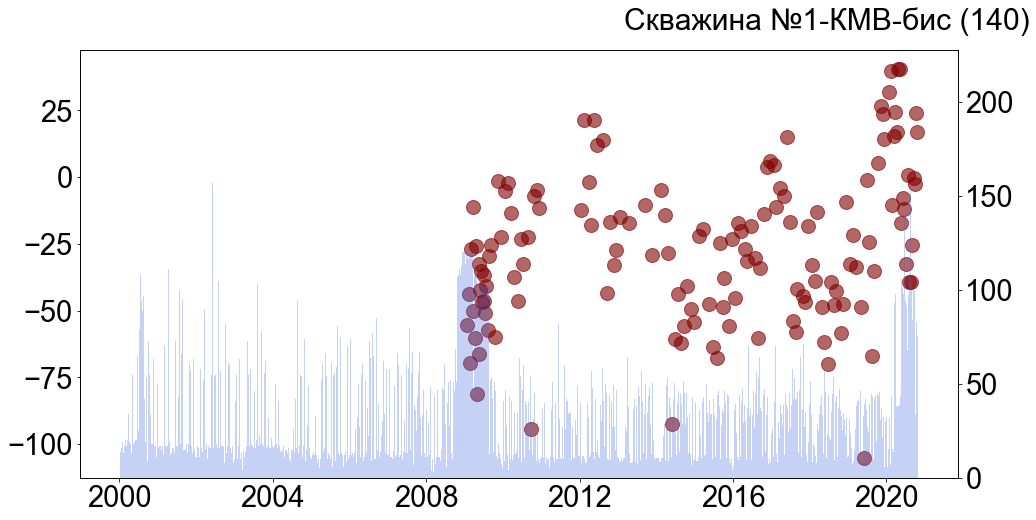

In [12]:
params = {
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 23,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [40/2.54, 20/2.54],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
       }

rcParams.update(params)
xlim = ('2000-01')
xlim = datetime.strptime(xlim , '%Y-%m')
well = df_dyn[df_dyn['IDPN'] == 140]
well = well[(well['ДАТА'] > xlim)]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)# Тут примерно все тоже самое, только я создаю рисунок а на нем говорю, чтро будет 4 сабплота и в данном случае вызываю 1. 4 это количество, 1 это адрес по горищонтали, 1 это адрес по вертикали
ax.annotate('Скважина №'+ str(wellnames[a])+ ' ('+str(wellnumbers[a])+')',
    xy=(0.85, 1.1), xycoords='axes fraction',
    horizontalalignment='center', verticalalignment='top',
    fontsize=30, color = 'black') #here goes the annotation of well number and well name in the top right of every subplot
lns1 = ax.plot(df_out_maslov['ДАТА'], df_out_maslov['popravka_gaz_temp,m'],'o', alpha = 0.6, color = "maroon",label = 'Газовый_фактор',markersize=14)
ax1 = ax.twinx()
lns3 = ax1.bar(x=well['ДАТА'], height =well['ДЕБИТ_СБОРНЫЙ_М3_СУТ'], width = 1, alpha = 0.3, color = "royalblue",label = 'Дебит')


In [27]:
#wellnumbers = [140,6002,111,112,10071,141,101,355,10070,46,,,,,,,,,,,,,,,,,,,,,,,,]
#wellnames = ['1-KMV-BIS','75-bis','1-E','2-E','71','55','34-бис','24-бис-1','70','46','39-бис','36-бис','49-Э','9','56','33-бис','41-бис','57-РЭ-бис']
params = {
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 23,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [40/2.54, 20/2.54],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
       }
df_out_maslov=pd.DataFrame()
rcParams.update(params)
xlim = ('2009-01')
xlim = datetime.strptime(xlim , '%Y-%m')
glubina = pd.read_excel('D:\\Kortunov\\transfer\\Esentuk\\glubina.xlsx')
df_gaz_sostav = pd.read_excel('D:\\Kortunov\\transfer\\Esentuk\\gaz_sostav.xlsx')
glubina['скв'] = glubina['скв'].astype(str)
#df = pd.concat([df,df_chem], ignore_index=True, sort=False)
for a in range(26,len(wellnames)):

    print(a)
    print(wellnumbers[a])
    print(wellnames[a])
    well = df[df['IDPN'] == wellnumbers[a]]
    well = well[(well['ДАТА'] > xlim)]
    df_dyn = df_dyn[(df_dyn['ДАТА'] > xlim)]
    
    #    well = well[(well['ДАТА'] > xlim)]
    df_out = pd.DataFrame()
    countnulls = well['ГАЗОВЫЙ_ФАКТОР_поДОБЫЧЕ_(ЕЗМВ_Р)_(м3_в_м3)_ID_7104'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
    #countnulls = well['Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040'].count()
    aa = df_info.loc[df_info['ID PN'] == wellnumbers[a], 'АО Точки Замера'].values

    df_gaz_sostav_well = df_gaz_sostav[df_gaz_sostav["IDPN"] ==wellnumbers[a]]
    CO2 = df_gaz_sostav_well['CO2(g)'].values
    CH4 = df_gaz_sostav_well['Mtg(g)'].values
    N2 = df_gaz_sostav_well['N'].values
    
    glubina_well = glubina[glubina["скв"] == str(wellnames[a])]
    bottom = glubina_well['Глубина'].values
    temp_max = well['Температура_СБОРНАЯ_(Градус_С)'].max()
    if temp_max>45:
        temp_max = 45
#    countnulls1 = well['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
    if countnulls > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график
        print('YES')
        df2 = pd.DataFrame()
        df_out = pd.DataFrame()
        df2 = well.groupby("ДАТА").mean()
        df2['ДАТА'] = df2.index
        df_out =  df2[['IDPN','ДАТА','ГАЗОВЫЙ_ФАКТОР_поДОБЫЧЕ_(ЕЗМВ_Р)_(м3_в_м3)_ID_7104','Температура_СБОРНАЯ_(Градус_С)','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)']]
        df_out['ДАТА'] = pd.to_datetime(df_out['ДАТА'])
        df_dyn['ДАТА']= pd.to_datetime(df_dyn['ДАТА'])
        df_out = df_out.reset_index(drop=True)
        df_out['Газовый_фактор_(м3_в_м3)_ID_7062']= df_out['ГАЗОВЫЙ_ФАКТОР_поДОБЫЧЕ_(ЕЗМВ_Р)_(м3_в_м3)_ID_7104']
        df_out = pd.merge_asof(df_out, df_dyn[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna().sort_values('ДАТА'), on="ДАТА", tolerance=pd.Timedelta("2ms"))
        
#        df_out = pd.merge_asof(df_out, df_chem[['ДАТА','Хлорид_Cl-_(грамм_в_литре)_ID_2301']], on="ДАТА", tolerance=pd.Timedelta("2ms"))
        df_out['Давление на устье, kPa'] = (df_out['Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО']-aa)*9.807
        df_out['Давление на устье, kPa']= df_out['Давление на устье, kPa'].combine_first((df_out['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)']-aa)*9.807)
        my_list = df_out.columns.tolist()
        reordered_cols = reorder_columns(my_list, first_cols=['ДАТА', 'Давление на устье, kPa', 'Газовый_фактор_(м3_в_м3)_ID_7062','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206'], last_cols=['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'], drop_cols=['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО'])
        df_out = df_out[reordered_cols]


    
#     elif countnulls1 > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график
#         print('Check_gaz_factor')
#         print(wellnames[a])
#         df2 = pd.DataFrame()
#         df2 = well.groupby("ДАТА").mean()
#         df2['ДАТА'] = df2.index
#         df_gaz_factor = pd.DataFrame()
#         df_gaz_factor['ДАТА']= df2['ДАТА']
#         df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']= df2['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
#         df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086'] = df2['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']
# #        df_gaz_factor['Давление'] = df2['Давление_МИН_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7572']*98.0665
#         df_gaz_factor = df_gaz_factor.dropna()


# #        print('a = ',aa)

#  #kpa
#         df_gaz_factor['Давление'] = (df2['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)'] - aa)*9.807 #kpa
#         df_gaz_factor['debit gaza'] = df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']-df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
#         df_gaz_factor['gaz_factor'] = df_gaz_factor['debit gaza']/df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
#         df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062'] = (df_gaz_factor['gaz_factor']*df_gaz_factor['Давление'])/101.325# для одной атмосферы
#         df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062'] = df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062'][df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062'] > 0]
#         df_gaz_factor = df_gaz_factor.reset_index(drop=True)
#         df2 =  df2.reset_index(drop=True)
#         del df2['Газовый_фактор_(м3_в_м3)_ID_7062']
       
#         df2 = pd.merge_asof(df2, df_gaz_factor[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062']].dropna(), on="ДАТА", tolerance=pd.Timedelta("2ms"))
#         df_out =  df2[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Минерализация_(грамм_в_литре)_ID_2208','Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Двуокись_CO2_РАСТВОРЕННАЯ_(грамм_в_литре)_СБОРНАЯ','Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076','Температура_СРЕД_СУТ_(ЕЗМВ)_dt_(Градус_С)_ID_7590','Температура_при_отборе_пробы_(Градус_С)_ID_7012','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО']]
#         df_out['ДАТА'] = pd.to_datetime(df_out['ДАТА'])
#         df_dyn['ДАТА']= pd.to_datetime(df_dyn['ДАТА'])
#         df_out = df_out.reset_index(drop=True)
#         df_out = pd.merge_asof(df_out, df_dyn[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna(), on="ДАТА", tolerance=pd.Timedelta("2ms"))
#         df_out['Давление на устье, kPa'] = (df_out['Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО']-aa)*9.807
#         df_out['Давление на устье, kPa']= df_out['Давление на устье, kPa'].combine_first((df_out['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)']-aa)*9.807) 
#         my_list = df_out.columns.tolist()
#         reordered_cols = reorder_columns(my_list, first_cols=['ДАТА', 'Давление на устье, kPa','Газовый_фактор_(м3_в_м3)_ID_7062','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Минерализация_(грамм_в_литре)_ID_2208'], last_cols=['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'], drop_cols=['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО'])
#         df_out = df_out[reordered_cols]

#         df_out= df_out[df_out['Газовый_фактор_(м3_в_м3)_ID_7062'].notna()]
#         df_out= df_out[df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].notna()]
#         df_out['Давление на устье, kPa']=df_out['Давление на устье, kPa'].fillna(method='ffill')
    else:
        continue

        
        
#     df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301']=df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].fillna(method='ffill')        
#     df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403']=df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].fillna(method='ffill')        
#     df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302']=df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302'].fillna(method='ffill')        
#     df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303']=df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303'].fillna(method='ffill')        
#     df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404']=df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404'].fillna(method='ffill')        
#     df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405']=df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].fillna(method='ffill')        
#     df_out['Давление на устье, kPa']=df_out['Давление на устье, kPa'].fillna(method='ffill')
#     df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301']=df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].fillna(method='ffill')        
#     df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403']=df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].fillna(method='bfill')        
#     df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302']=df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302'].fillna(method='bfill')        
#     df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303']=df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303'].fillna(method='bfill')        
#     df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404']=df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404'].fillna(method='bfill')        
#     df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405']=df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].fillna(method='bfill')  
#     df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301']=df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].fillna(method='bfill')  
#     df_out['Давление на устье, kPa']=df_out['Давление на устье, kPa'].fillna(method='bfill')
    df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']=df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].fillna(101.325)
#    df_out= df_out[df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].notna()]
    df_out= df_out[df_out['Газовый_фактор_(м3_в_м3)_ID_7062'].notna()]
    df_out = df_out.iloc[1:]
    df_out= df_out[df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].notna()]
    df_out= df_out[df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404'].notna()]
    df_out= df_out[df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303'].notna()]
    df_out= df_out[df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302'].notna()]
    df_out= df_out[df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].notna()]
    df_out= df_out[df_out['Температура_СБОРНАЯ_(Градус_С)'].notna()]
#    df_out= df_out[df_out['Температура_СБОРНАЯ_(Градус_С)'].notna()]
    df_out= df_out[df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].notna()]
    
#    df_out= df_out[df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].notna()]
#    df_out= df_out[df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].notna()]
    
    df_out['popravka gaz,m'] = np.NaN
    df_out['popravka_gaz_temp,m'] = np.NaN
    for nomer_stroky in range(0, len(df_out.index)):
        if df_out['pH_водородный_показатель_ID_2201'].iloc[nomer_stroky] > 0:
            ph = str(df_out['pH_водородный_показатель_ID_2201'].iloc[nomer_stroky])
        else:
            ph = str(6.5)
            
#        print(nomer_stroky)
        
        if df_out['Давление на устье, kPa'].iloc[nomer_stroky] >0:
            pressure = df_out['Давление на устье, kPa'].iloc[nomer_stroky]*0.00987
        else:
            pressure = 1
#        bottom = 150
 #       bottom = float(df_info.loc[df_info['ID PN']  == wellnumbers[a], 'glub'].values/10)
        press_diff = bottom/10-pressure
        x = IPhreeqc() #initalize IPhreeqc object
        
        x.LoadDatabase('phreeqc.dat') # Load database
        x.SetDumpStringOn()   #set DumpString output on
        x.SetDumpFileOn()
        x.AccumulateLine(
        """
        SOLUTION 1
            temp      """ +' '+        str(df_out['Температура_СБОРНАЯ_(Градус_С)'].iloc[nomer_stroky]))
        x.AccumulateLine("""
            pH"""        +' '+ str(ph))
        x.AccumulateLine("""
            pe        4
            redox     pe
            units     mol/l
            density   1 
            C(4)"""  +' '+   str(' '+ str(df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303'].iloc[nomer_stroky]/61.008) +' charge'))
        x.AccumulateLine("""
            Ca"""+' '+        str(df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].iloc[nomer_stroky]/40))
        x.AccumulateLine("""
            Cl"""+' '+        str(df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].iloc[nomer_stroky]/35.45))
        x.AccumulateLine("""
            Mg""" +' '+        str(df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404'].iloc[nomer_stroky]/24.305))
        x.AccumulateLine("""
            Na"""  +' '+        str(df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].iloc[nomer_stroky]/22.99))
        x.AccumulateLine("""
            S(6)""" +' '+        str(df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302'].iloc[nomer_stroky]/96.06))
        x.AccumulateLine("""
            -water    1 # kg""")
        x.AccumulateLine("""
        SOLUTION_MASTER_SPECIES
            Hdg		Hdg	 0	Hdg		2.016 # H2 gas
            Oxg		Oxg	 0	Oxg		32 # Oxygen gas
            Mtg		Mtg	 0.0	Mtg		16.032 # CH4 gas

            Ntg		Ntg	 0	Ntg		28.0134 # N2 gas
        
        SOLUTION_SPECIES
        Hdg = Hdg # H2
            -dw	 5.13e-9
            -Vm 6.52  0.78  0.12 # supcrt
        Oxg = Oxg # O2
            -dw	 2.35e-9
            -Vm   5.7889  6.3536  3.2528  -3.0417   -0.3943 # supcrt
        Mtg = Mtg # CH4
            -dw   1.85e-9
            -Vm   9.01  -1.11  0  -1.85  -1.50 # ref. 1 + Hnedkovsky et al., 1996, JCT 28, 125
        Ntg = Ntg # N2
            -dw	 1.96e-9
            -Vm 7 # Pray et al., 1952, IEC 44. 1146
        H2O = H2O
            # H2O + 0.01e- = H2O-0.01; -log_k -9 # aids convergence

        PHASES
            CO2(g)
                CO2 = CO2
                log_k	-1.468
                delta_h -4.776 kcal
                -analytic   10.5624  -2.3547e-2  -3972.8  0  5.8746e5  1.9194e-5
                -T_c  304.2 # critical T, K
                -P_c   72.80 # critical P, atm
                -Omega 0.225 # acentric factor
            H2O(g)
                H2O = H2O
                log_k  1.506; delta_h -44.03 kJ
                -T_c  647.3 # critical T, K
                -P_c  300# critical P, atm
                -Omega 0.344 #  acentric factor
                -analytic   -16.5066 -2.0013E-3  2710.7  3.7646  0 2.24E-6
            Oxg(g)
                 Oxg = Oxg
                -analytic -7.5001 7.8981e-003 0.0 0.0 2.0027e+005
                -T_c  154.6  
                -P_c   49.80  
                -Omega 0.021
            Hdg(g)
                Hdg = Hdg
                -analytic   -9.3114e+000    4.6473e-003   -4.9335e+001    1.4341e+000    1.2815e+005
                -T_c  33.2  
                -P_c   12.80  
                -Omega -0.225
            Ntg(g)
                Ntg = Ntg
                -analytic -58.453 1.81800E-03  3199  17.909 -27460
                -T_c  126.2  
                -P_c   33.50  
                -Omega 0.039
            Mtg(g)
                Mtg = Mtg
                -analytic   10.44  -7.65e-3  -6669  0  1.014e6 # CH4 solubilities 25 - 100°C
                -T_c  190.6  
                -P_c   45.40 
                -Omega 0.008
             """)
        x.AccumulateLine("""
        GAS_PHASE 1
            -fixed_pressure
            -pressure""" +' '+        str(df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].iloc[nomer_stroky]/101.325))
        x.AccumulateLine("""
            -volume"""  +' '+        str(df_out['Газовый_фактор_(м3_в_м3)_ID_7062'].iloc[nomer_stroky]))
        x.AccumulateLine("""
           -temperature""" +' '+        str(df_out['Температура_СБОРНАЯ_(Градус_С)'].iloc[nomer_stroky]))
        x.AccumulateLine("""
            CO2(g)""" +' '+        str(float(CO2*df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].iloc[nomer_stroky]/101.325)))
#         x.AccumulateLine("""
#             H2O(g)    0""")
# #         x.AccumulateLine("""
# #             Ntg(g)""" +' '+        str(float(N2*df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].iloc[nomer_stroky]/101.325)))
# #         x.AccumulateLine("""
# #             Mtg(g)""" +' '+        str(float(CH4*df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].iloc[nomer_stroky]/101.325)))
        x.AccumulateLine("""

        REACTION_PRESSURE 1
              """)
        x.AccumulateLine(   str(float(np.round(pressure,2)))+' '+str(float(np.round(bottom/10,2))) + ' in ' + str(int(np.round(press_diff)))+ ' steps')
        x.AccumulateLine("""

        REACTION_TEMPERATURE 1
              """)
        x.AccumulateLine(   str(df_out['Температура_СБОРНАЯ_(Градус_С)'].iloc[nomer_stroky])+' '+str(temp_max) + ' in ' + str(int(np.round(press_diff)))+ ' steps')
#        x.AccumulateLine(   str(15)+' '+str(temp_max) + ' in ' + str(int(np.round(press_diff)))+ ' steps')
        x.AccumulateLine("""

        SELECTED_OUTPUT
            -file     D:\\Kortunov\\transfer\\Esentuk\\teeeeeest.txt
            -user_punch           true
            -high_precision       false
            -reset
            
            -simulation	true
            -gases CO2(g) H2O(g) Mtg(g) Ntg(g)
            -totals    C(4) Ca Cl Mg  Na S(6)
        USER_PUNCH
            -headings density1
            -start
             10 punch RHO
            -end
        END

        """
        ) 
        rrr = x.GetDumpString()
        x.RunAccumulated() #Run phreeqc
        df1 = pd.DataFrame()
        bbb = x.GetSelectedOutputArray()
        headers = bbb.pop(0)
        df1 = pd.DataFrame(bbb, columns=headers)
        df1 = df1.iloc[1:]
        df1['CO2,kg']=df1['g_CO2(g)']*(12+32)/1000+df1['g_Ntg(g)']*(28)/1000+df1['g_H2O(g)']*(16+2)/1000+df1['g_Mtg(g)']*(16)/1000
        df1['densityCO2, kg/l']=df1['CO2,kg']/df1['volume']
        df1['density, kg/m3'] = (df1['CO2,kg']+1)/(df1['volume']/1000+1/1000)
#        df1['density, kg/m3'] = (df1['CO2,kg']+df1['density1'])/(df1['volume']/1000+1/1000)
#        df1['delta_h, m'] = 101325*(np.round(press_diff,2)/(np.round(press_diff)-1)/10)/df1['density, kg/m3']/9.80665
        df1['delta_h, m'] = 101325*(np.round(press_diff,2)/(int(np.round(press_diff))-1))/df1['density, kg/m3']/9.80

        df1['H,m'] = df1['delta_h, m'].cumsum()
        df1['real pressure, atm'] = df1['pressure']+pressure
        delta_p = np.round(press_diff,2)/(np.round(press_diff)-1)
        df1['popravka'] = df1['delta_h, m']-delta_p*101325/1000/9.8
        df_out['popravka gaz,m'].iloc[nomer_stroky]= df1['popravka'].sum()*-1
        ###########################
        
        df1['density2, kg/m3'] = (df1['CO2,kg']+df1['density1'])/(df1['volume']/1000+1/1000)
#        df1['delta_h, m'] = 101325*(np.round(press_diff,2)/(np.round(press_diff)-1)/10)/df1['density, kg/m3']/9.80665
        df1['delta_h2, m'] = 101325*(np.round(press_diff,2)/(int(np.round(press_diff))-1))/df1['density2, kg/m3']/9.80

        df1['H,m2'] = df1['delta_h2, m'].cumsum()
        df1['real pressure, atm2'] = df1['pressure']+pressure
        delta_p = np.round(press_diff,2)/(np.round(press_diff)-1)
        df1['popravka_gaz_temp'] = df1['delta_h2, m']-delta_p*101325/1000/9.8
        df_out['popravka_gaz_temp,m'].iloc[nomer_stroky]= df1['popravka_gaz_temp'].sum()*-1
    
    df_out_maslov = pd.concat([df_out_maslov,df_out[['IDPN','ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062','popravka_gaz_temp,m','popravka gaz,m']]], ignore_index=True, sort=True)

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)# Тут примерно все тоже самое, только я создаю рисунок а на нем говорю, чтро будет 4 сабплота и в данном случае вызываю 1. 4 это количество, 1 это адрес по горищонтали, 1 это адрес по вертикали
    ax.annotate('Скважина №'+ str(wellnames[a])+ ' ('+str(wellnumbers[a])+')',
        xy=(0.85, 1.1), xycoords='axes fraction',
        horizontalalignment='center', verticalalignment='top',
        fontsize=30, color = 'black') #here goes the annotation of well number and well name in the top right of every subplot
    
#    ax1 = ax.twinx()
#    lns2 = ax1.plot(df_out['ДАТА'],df_out['popravka gaz,m'],'o', alpha = 0.2, color = "tab:blue",label = 'Газовый_фактор',markersize=14)
    lns1 = ax.plot(df_out['ДАТА'],df_out['popravka_gaz_temp,m'],'o', alpha = 0.6, color = "maroon",label = 'Газовый_фактор',markersize=14)
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#            ax.xaxis.set_minor_locator(MultipleLocator(12))
    ax.tick_params(which='minor', length=4)
    ax.tick_params(which='major', length=5, width=2)
    months = mdates.MonthLocator() 
    ax.xaxis.set_minor_locator(months)

    ax.set_ylabel('Поправка к напору на забое скважины, м', color = "black")
    ax.set_xlabel('Дата, года', color = "Black")
    ax.tick_params('y', colors= "black")
#    plt.show()

#    plt.plot(df_out['ДАТА'],df_out['popravka,m'],'o')

    #lns1 = ax.plot(well['ДАТА'], well['Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040'],'o', alpha = 0.6, color = "maroon",label = 'Газовый_фактор',markersize=14)
   

    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    fig.set_facecolor('white')# тут я решил сделать белый фон, а не прозрачный как в прошлом скрипте
    directory = 'D:\\WORK\\MSU\\Esentuk\\popravka_figures2_po_dobische'
    filename = '\\'+str(wellnames[a])# и рисунок поменял на джипег
    fullpath = directory + filename
    if not os.path.exists(directory):
        os.makedirs(directory)
    keepcharacters = (' ','.','_',')','(','\\',':')
    fullpath2 = "".join(c for c in fullpath if c.isalnum() or c in keepcharacters).rstrip()
    plt.savefig(fullpath2,dpi=300,facecolor='w',bbox_inches = 'tight',pad_inches = 0)#,transparent=True)
    plt.close()
    fig.clf
directory = 'D:\\WORK\\MSU\\Esentuk\\popravka2'
filename = '\\'+'Gaztermlift_Maslovu_po_dobiche'+'.csv'
fullpath = directory + filename
if not os.path.exists(directory):
    os.makedirs(directory)
keepcharacters = (' ','.','_',')','(','\\',':')
fullpath2 = "".join(c for c in fullpath if c.isalnum() or c in keepcharacters).rstrip()
df_out_maslov.to_csv(fullpath2, index=False,encoding= 'utf-8-sig')

26
6002
75-бис
YES


C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Exception: An error occured.
ERROR:                 C(4) Charge balance has not converged. 	Residual: -1.736719e-01

ERROR:                   Ca has not converged. Total: 2.650629e-02	Calculated: 1.110379e-39	Residual: 2.650629e-02

ERROR:                   Cl has not converged. Total: 2.018338e-02	Calculated: 2.656061e-02	Residual: -6.377228e-03

ERROR:                   Mg has not converged. Total: 8.068617e-03	Calculated: 3.404374e-03	Residual: 4.664243e-03

ERROR:                   Na has not converged. Total: 3.416436e-02	Calculated: 2.720978e-03	Residual: 3.144338e-02

ERROR:                 S(6) has not converged. Total: 9.281226e-03	Calculated: 5.761661e-03	Residual: 3.519565e-03

ERROR:                   Mu Ionic strength has not converged. 	Residual: -1.058522e-02

ERROR:               A(H2O) Activity of water has not converged. 	Residual: -6.196284e-01

ERROR: Model failed to converge for initial solution  1.


In [28]:
CO2

array([1.])

In [20]:
df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].iloc[nomer_stroky]

101.325

In [24]:
df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302'].iloc[nomer_stroky]

0.1277499981224537

In [401]:
df1

,sim,state,soln,dist_x,time,step,pH,pe,reaction,temp(C),Alk(eq/kgw),mu,mass_H2O,charge(eq),pct_err,C(4)(mol/kgw),Ca(mol/kgw),Cl(mol/kgw),Mg(mol/kgw),Na(mol/kgw),S(6)(mol/kgw),pressure,total mol,volume,g_CO2(g),g_H2O(g),g_Mtg(g),g_Ntg(g),density1,"CO2,kg","densityCO2, kg/l","density, kg/m3","delta_h, m","H,m","real pressure, atm",popravka
1,1,react,1,-99.0,0.0,1,5.358117,11.931075,-99,32.700001,0.065413,0.123324,0.999997,3.335367e-12,1.785332e-09,0.459521,0.026358,0.0248,0.009077,0.038176,0.009417,15.740000,0.532741,0.778085,0.532741,0.0,0.0,0.0,1.020608,0.023441,0.030126,575.585830,18.109533,18.109533,31.476461,7.685942
2,1,react,1,-99.0,0.0,2,5.333930,11.953193,-99,32.794616,0.065413,0.123310,0.999997,3.334694e-12,1.785102e-09,0.481605,0.026358,0.0248,0.009077,0.038176,0.009417,16.748154,0.510658,0.696905,0.510658,0.0,0.0,0.0,1.021589,0.022469,0.032241,602.549411,17.299147,35.408680,32.484615,6.875556
3,1,react,1,-99.0,0.0,3,5.311320,11.961314,-99,32.889232,0.065413,0.123295,0.999997,3.334737e-12,1.785258e-09,0.503333,0.026358,0.0248,0.009077,0.038176,0.009417,17.756308,0.488930,0.625709,0.488930,0.0,0.0,0.0,1.022555,0.021513,0.034382,628.349363,16.588846,51.997526,33.492769,6.165255
4,1,react,1,-99.0,0.0,4,5.290111,11.980884,-99,32.983847,0.065413,0.123280,0.999997,3.334851e-12,1.785453e-09,0.524709,0.026358,0.0248,0.009077,0.038176,0.009417,18.764462,0.467554,0.562877,0.467554,0.0,0.0,0.0,1.023505,0.020572,0.036549,653.008802,15.962405,67.959930,34.500923,5.538814
5,1,react,1,-99.0,0.0,5,5.270158,11.990678,-99,33.078462,0.065413,0.123265,0.999997,3.334555e-12,1.785429e-09,0.545736,0.026358,0.0248,0.009077,0.038176,0.009417,19.772615,0.446527,0.507121,0.446527,0.0,0.0,0.0,1.024440,0.019647,0.038743,676.553088,15.406907,83.366837,35.509077,4.983317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,1,react,1,-99.0,0.0,127,4.921098,11.469107,-99,44.621538,0.065414,0.121545,0.999997,3.334827e-12,1.801964e-09,0.992264,0.026358,0.0248,0.009077,0.038176,0.009417,142.767385,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.045031,0.000000,NaN,1000.000000,10.423591,1394.821250,158.503846,0.000000
128,1,react,1,-99.0,0.0,128,4.920667,11.465929,-99,44.716154,0.065414,0.121532,0.999997,3.334747e-12,1.802046e-09,0.992264,0.026358,0.0248,0.009077,0.038176,0.009417,143.775538,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.045035,0.000000,NaN,1000.000000,10.423591,1405.244841,159.512000,0.000000
129,1,react,1,-99.0,0.0,129,4.920237,11.461814,-99,44.810769,0.065414,0.121519,0.999997,3.334721e-12,1.802156e-09,0.992264,0.026358,0.0248,0.009077,0.038176,0.009417,144.783692,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.045038,0.000000,NaN,1000.000000,10.423591,1415.668431,160.520154,0.000000
130,1,react,1,-99.0,0.0,130,4.919810,11.444705,-99,44.905385,0.065414,0.121506,0.999997,3.334853e-12,1.802351e-09,0.992264,0.026358,0.0248,0.009077,0.038176,0.009417,145.791846,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.045041,0.000000,NaN,1000.000000,10.423591,1426.092022,161.528307,0.000000


In [364]:
18.933643-17.926822

1.0068209999999986

In [155]:
wellnumbers = [140]
wellnames = ['1-КМВ-бис']

In [71]:
#wellnumbers = [140,6002,111,112,10071,141,101,355,10070,46,,,,,,,,,,,,,,,,,,,,,,,,]
#wellnames = ['1-KMV-BIS','75-bis','1-E','2-E','71','55','34-бис','24-бис-1','70','46','39-бис','36-бис','49-Э','9','56','33-бис','41-бис','57-РЭ-бис']
params = {
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 23,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [40/2.54, 20/2.54],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
       }
df_out_maslov=pd.DataFrame()
rcParams.update(params)
xlim = ('2009-01')
xlim = datetime.strptime(xlim , '%Y-%m')
glubina = pd.read_excel('D:\\Kortunov\\transfer\\Esentuk\\glubina.xlsx')
df_gaz_sostav = pd.read_excel('D:\\Kortunov\\transfer\\Esentuk\\gaz_sostav.xlsx')
glubina['скв'] = glubina['скв'].astype(str)
#df = pd.concat([df,df_chem], ignore_index=True, sort=False)
for a in range(0,len(wellnames)):

    print(a)
    print(wellnumbers[a])
    print(wellnames[a])
    well = df[df['IDPN'] == wellnumbers[a]]
    well = well[(well['ДАТА'] > xlim)]
#    df_dyn = df_dyn[(df_dyn['ДАТА'] > xlim)]
    
    #    well = well[(well['ДАТА'] > xlim)]
    df_out = pd.DataFrame()
    countnulls = well['Газовый_фактор_(м3_в_м3)_ID_7062'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
    #countnulls = well['Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040'].count()
    aa = df_info.loc[df_info['ID PN'] == wellnumbers[a], 'АО Точки Замера'].values

    df_gaz_sostav_well = df_gaz_sostav[df_gaz_sostav["IDPN"] ==wellnumbers[a]]
    CO2 = df_gaz_sostav_well['CO2(g)'].values
    CH4 = df_gaz_sostav_well['Mtg(g)'].values
    N2 = df_gaz_sostav_well['N'].values
    
    glubina_well = glubina[glubina["скв"] == str(wellnames[a])]
    bottom = glubina_well['Глубина'].values
    temp_max = well['Температура_СБОРНАЯ_(Градус_С)'].max()
    if temp_max>45:
        temp_max = 45
#    countnulls1 = well['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
    if countnulls > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график
        print('YES')
        df2 = pd.DataFrame()
        df_out = pd.DataFrame()
        df2 = well.groupby("ДАТА").mean()
        df2['ДАТА'] = df2.index
        df_out =  df2[['IDPN','ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062','Температура_СБОРНАЯ_(Градус_С)','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)']]
        df_out['ДАТА'] = pd.to_datetime(df_out['ДАТА'])
        df_dyn['ДАТА']= pd.to_datetime(df_dyn['ДАТА'])
        df_out = df_out.reset_index(drop=True)
        df_out = pd.merge_asof(df_out, df_dyn[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna().sort_values('ДАТА'), on="ДАТА", tolerance=pd.Timedelta("2ms"))
        
#        df_out = pd.merge_asof(df_out, df_chem[['ДАТА','Хлорид_Cl-_(грамм_в_литре)_ID_2301']], on="ДАТА", tolerance=pd.Timedelta("2ms"))
        df_out['Давление на устье, kPa'] = (df_out['Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО']-aa)*9.807
        df_out['Давление на устье, kPa']= df_out['Давление на устье, kPa'].combine_first((df_out['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)']-aa)*9.807)
        my_list = df_out.columns.tolist()
        reordered_cols = reorder_columns(my_list, first_cols=['ДАТА', 'Давление на устье, kPa', 'Газовый_фактор_(м3_в_м3)_ID_7062','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206'], last_cols=['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'], drop_cols=['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО'])
        df_out = df_out[reordered_cols]


    
#     elif countnulls1 > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график
#         print('Check_gaz_factor')
#         print(wellnames[a])
#         df2 = pd.DataFrame()
#         df2 = well.groupby("ДАТА").mean()
#         df2['ДАТА'] = df2.index
#         df_gaz_factor = pd.DataFrame()
#         df_gaz_factor['ДАТА']= df2['ДАТА']
#         df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']= df2['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
#         df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086'] = df2['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']
# #        df_gaz_factor['Давление'] = df2['Давление_МИН_СУТ_(ЕЗМВ)_Р1_(кг_на_см2)_ID_7572']*98.0665
#         df_gaz_factor = df_gaz_factor.dropna()


# #        print('a = ',aa)

#  #kpa
#         df_gaz_factor['Давление'] = (df2['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)'] - aa)*9.807 #kpa
#         df_gaz_factor['debit gaza'] = df_gaz_factor['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086']-df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
#         df_gaz_factor['gaz_factor'] = df_gaz_factor['debit gaza']/df_gaz_factor['Отбор_ВОДА_по_машинам_(ЕЗМВ_Р)__(метр_куб)_ID_7087']
#         df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062'] = (df_gaz_factor['gaz_factor']*df_gaz_factor['Давление'])/101.325# для одной атмосферы
#         df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062'] = df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062'][df_gaz_factor['Газовый_фактор_(м3_в_м3)_ID_7062'] > 0]
#         df_gaz_factor = df_gaz_factor.reset_index(drop=True)
#         df2 =  df2.reset_index(drop=True)
#         del df2['Газовый_фактор_(м3_в_м3)_ID_7062']
       
#         df2 = pd.merge_asof(df2, df_gaz_factor[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062']].dropna(), on="ДАТА", tolerance=pd.Timedelta("2ms"))
#         df_out =  df2[['ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Минерализация_(грамм_в_литре)_ID_2208','Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Двуокись_CO2_РАСТВОРЕННАЯ_(грамм_в_литре)_СБОРНАЯ','Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076','Температура_СРЕД_СУТ_(ЕЗМВ)_dt_(Градус_С)_ID_7590','Температура_при_отборе_пробы_(Градус_С)_ID_7012','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО']]
#         df_out['ДАТА'] = pd.to_datetime(df_out['ДАТА'])
#         df_dyn['ДАТА']= pd.to_datetime(df_dyn['ДАТА'])
#         df_out = df_out.reset_index(drop=True)
#         df_out = pd.merge_asof(df_out, df_dyn[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna(), on="ДАТА", tolerance=pd.Timedelta("2ms"))
#         df_out['Давление на устье, kPa'] = (df_out['Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО']-aa)*9.807
#         df_out['Давление на устье, kPa']= df_out['Давление на устье, kPa'].combine_first((df_out['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)']-aa)*9.807) 
#         my_list = df_out.columns.tolist()
#         reordered_cols = reorder_columns(my_list, first_cols=['ДАТА', 'Давление на устье, kPa','Газовый_фактор_(м3_в_м3)_ID_7062','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Минерализация_(грамм_в_литре)_ID_2208'], last_cols=['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'], drop_cols=['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО'])
#         df_out = df_out[reordered_cols]

#         df_out= df_out[df_out['Газовый_фактор_(м3_в_м3)_ID_7062'].notna()]
#         df_out= df_out[df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].notna()]
#         df_out['Давление на устье, kPa']=df_out['Давление на устье, kPa'].fillna(method='ffill')
    else:
        continue

        
        
    df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301']=df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].fillna(method='ffill')        
    df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403']=df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].fillna(method='ffill')        
    df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302']=df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302'].fillna(method='ffill')        
    df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303']=df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303'].fillna(method='ffill')        
    df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404']=df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404'].fillna(method='ffill')        
    df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405']=df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].fillna(method='ffill')        
    df_out['Давление на устье, kPa']=df_out['Давление на устье, kPa'].fillna(method='ffill')
    df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301']=df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].fillna(method='ffill')        
    df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403']=df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].fillna(method='bfill')        
    df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302']=df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302'].fillna(method='bfill')        
    df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303']=df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303'].fillna(method='bfill')        
    df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404']=df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404'].fillna(method='bfill')        
    df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405']=df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].fillna(method='bfill')  
    df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301']=df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].fillna(method='bfill')  
    df_out['Давление на устье, kPa']=df_out['Давление на устье, kPa'].fillna(method='bfill')
    df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']=df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].fillna(101.325)
#    df_out= df_out[df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].notna()]
    df_out= df_out[df_out['Газовый_фактор_(м3_в_м3)_ID_7062'].notna()]
    df_out = df_out.iloc[1:]
#     df_out= df_out[df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].notna()]
#     df_out= df_out[df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404'].notna()]
#     df_out= df_out[df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303'].notna()]
#     df_out= df_out[df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302'].notna()]
#     df_out= df_out[df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].notna()]
    df_out= df_out[df_out['Температура_СБОРНАЯ_(Градус_С)'].notna()]
#     df_out= df_out[df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].notna()]
    
#    df_out= df_out[df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].notna()]
#    df_out= df_out[df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].notna()]
    
    df_out['popravka gaz,m'] = np.NaN
    df_out['popravka_gaz_temp,m'] = np.NaN
    for nomer_stroky in range(0, len(df_out.index)):
        if df_out['pH_водородный_показатель_ID_2201'].iloc[nomer_stroky] > 0:
            ph = str(df_out['pH_водородный_показатель_ID_2201'].iloc[nomer_stroky])
        else:
            ph = str(6.5)
            
#        print(nomer_stroky)
        
        if df_out['Давление на устье, kPa'].iloc[nomer_stroky] >0:
            pressure = df_out['Давление на устье, kPa'].iloc[nomer_stroky]*0.00987
          
        else:
            pressure = 1
#        bottom = 150
 #       bottom = float(df_info.loc[df_info['ID PN']  == wellnumbers[a], 'glub'].values/10)
        press_diff = bottom/10-pressure
        x = IPhreeqc() #initalize IPhreeqc object
        
        x.LoadDatabase('phreeqc.dat') # Load database
        x.SetDumpStringOn()   #set DumpString output on
        x.SetDumpFileOn()
        x.AccumulateLine(
        """
        SOLUTION 1
            temp      """ +' '+        str(df_out['Температура_СБОРНАЯ_(Градус_С)'].iloc[nomer_stroky]))
        x.AccumulateLine("""
            pH"""        +' '+ str(ph))
        x.AccumulateLine("""
            pe        4
            redox     pe
            units     mol/l
            density   1 calc
            C(4)"""  +' '+   str(' '+ str(df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303'].iloc[nomer_stroky]/61.008) +' charge'))
        x.AccumulateLine("""
            Ca"""+' '+        str(df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].iloc[nomer_stroky]/40))
        x.AccumulateLine("""
            Cl"""+' '+        str(df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].iloc[nomer_stroky]/35.45))
        x.AccumulateLine("""
            Mg""" +' '+        str(df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404'].iloc[nomer_stroky]/24.305))
        x.AccumulateLine("""
            Na"""  +' '+        str(df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].iloc[nomer_stroky]/22.99))
        x.AccumulateLine("""
            S(6)""" +' '+        str(df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302'].iloc[nomer_stroky]/96.06))
        x.AccumulateLine("""
            -water    1 # kg""")

        x.AccumulateLine("""
        GAS_PHASE 1
            -fixed_pressure
            -pressure""" +' '+        str(df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].iloc[nomer_stroky]/101.325))
        x.AccumulateLine("""
            -volume"""  +' '+        str(df_out['Газовый_фактор_(м3_в_м3)_ID_7062'].iloc[nomer_stroky]))
        x.AccumulateLine("""
           -temperature""" +' '+        str(df_out['Температура_СБОРНАЯ_(Градус_С)'].iloc[nomer_stroky]))
        x.AccumulateLine("""
            CO2(g)""" +' '+        str(float(CO2*df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].iloc[nomer_stroky]/101.325)))
#        x.AccumulateLine("""
#             H2O(g)    0""")
        x.AccumulateLine("""
             Ntg(g)""" +' '+        str(float(N2*df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].iloc[nomer_stroky]/101.325)))
        x.AccumulateLine("""
            Mtg(g)""" +' '+        str(float(CH4*df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].iloc[nomer_stroky]/101.325)))
        x.AccumulateLine("""

        REACTION_PRESSURE 1
              """)
        x.AccumulateLine(   str(float(np.round(pressure,2)))+' '+str(float(np.round(bottom/10,2))) + ' in ' + str(int(np.round(press_diff)/10))+ ' steps')
        x.AccumulateLine("""

        REACTION_TEMPERATURE 1
              """)
        x.AccumulateLine(   str(df_out['Температура_СБОРНАЯ_(Градус_С)'].iloc[nomer_stroky])+' '+str(temp_max) + ' in ' + str(int(np.round(press_diff)/10))+ ' steps')
#        x.AccumulateLine(   str(15)+' '+str(temp_max) + ' in ' + str(int(np.round(press_diff)))+ ' steps')
        x.AccumulateLine("""

        SELECTED_OUTPUT
            -file     D:\\Kortunov\\transfer\\Esentuk\\teeeeeest.txt
            -user_punch           true
            -high_precision       false
            -reset
            
            -simulation	true
            -gases CO2(g) H2O(g) Mtg(g) Ntg(g)
            -totals    C(4) Ca Cl Mg  Na S(6)
        USER_PUNCH
            -headings density1
            -start
             10 punch RHO
            -end
        END

        """
        ) 
        rrr = x.GetDumpString()
        x.RunAccumulated() #Run phreeqc
        df1 = pd.DataFrame()
        bbb = x.GetSelectedOutputArray()
        headers = bbb.pop(0)
        df1 = pd.DataFrame(bbb, columns=headers)
        df1 = df1.iloc[1:]
        df1['CO2,kg']=df1['g_CO2(g)']*(12+32)/1000+df1['g_Ntg(g)']*(28)/1000+df1['g_H2O(g)']*(16+2)/1000+df1['g_Mtg(g)']*(16)/1000
        df1['densityCO2, kg/l']=df1['CO2,kg']/df1['volume']
        df1['density, kg/m3'] = (df1['CO2,kg']+1)/(df1['volume']/1000+1/1000)
#        df1['density, kg/m3'] = (df1['CO2,kg']+df1['density1'])/(df1['volume']/1000+1/1000)
#        df1['delta_h, m'] = 101325*(np.round(press_diff,2)/(np.round(press_diff)-1)/10)/df1['density, kg/m3']/9.80665
        df1['delta_h, m'] = 101325*(np.round(press_diff,2)*10/(int(np.round(press_diff))-1))/df1['density, kg/m3']/9.80

        df1['H,m'] = df1['delta_h, m'].cumsum()
        df1['real pressure, atm'] = df1['pressure']+pressure
        delta_p = np.round(press_diff,2)/(np.round(press_diff)-1)
        df1['popravka'] = df1['delta_h, m']-delta_p*101325/1000/9.8*10
        df1['popravka']
        df_out['popravka gaz,m'].iloc[nomer_stroky]= df1['popravka'].sum()*-1
        ###########################
        
        df1['density2, kg/m3'] = (df1['CO2,kg']+df1['density1'])/(df1['volume']/1000+1/1000)
#        df1['delta_h, m'] = 101325*(np.round(press_diff,2)/(np.round(press_diff)-1)/10)/df1['density, kg/m3']/9.80665
        df1['delta_h2, m'] = 101325*(np.round(press_diff,2)*10/(int(np.round(press_diff))-1))/df1['density2, kg/m3']/9.80

        df1['H,m2'] = df1['delta_h2, m'].cumsum()
        df1['real pressure, atm2'] = df1['pressure']+pressure
        delta_p = np.round(press_diff,2)/(np.round(press_diff)-1)
        df1['popravka_gaz_temp'] = df1['delta_h2, m']-delta_p*101325/1000/9.8*10
        df_out['popravka_gaz_temp,m'].iloc[nomer_stroky]= df1['popravka_gaz_temp'].sum()*-1
    
    df_out_maslov = pd.concat([df_out_maslov,df_out[['IDPN','ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062','popravka_gaz_temp,m','popravka gaz,m']]], ignore_index=True, sort=True)

#   plt.plot(df_out['ДАТА'],df_out['popravka,m'],'o')
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)# Тут примерно все тоже самое, только я создаю рисунок а на нем говорю, чтро будет 4 сабплота и в данном случае вызываю 1. 4 это количество, 1 это адрес по горищонтали, 1 это адрес по вертикали
    ax.annotate('Скважина №'+ str(wellnames[a])+ ' ('+str(wellnumbers[a])+')',
        xy=(0.85, 1.1), xycoords='axes fraction',
        horizontalalignment='center', verticalalignment='top',
        fontsize=30, color = 'black') #here goes the annotation of well number and well name in the top right of every subplot

#    ax1 = ax.twinx()
#    lns2 = ax1.plot(df_out['ДАТА'],df_out['popravka gaz,m'],'o', alpha = 0.2, color = "tab:blue",label = 'Газовый_фактор',markersize=14)
    lns1 = ax.plot(df_out['ДАТА'],df_out['popravka_gaz_temp,m'],'o', alpha = 0.6, color = "maroon",label = 'Газовый_фактор',markersize=14)
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    #            ax.xaxis.set_minor_locator(MultipleLocator(12))
    ax.tick_params(which='minor', length=4)
    ax.tick_params(which='major', length=5, width=2)
    months = mdates.MonthLocator() 
    ax.xaxis.set_minor_locator(months)

    ax.set_ylabel('Поправка к напору на забое скважины, м', color = "black")
    ax.set_xlabel('Дата, года', color = "Black")
    ax.tick_params('y', colors= "black")


#     #lns1 = ax.plot(well['ДАТА'], well['Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040'],'o', alpha = 0.6, color = "maroon",label = 'Газовый_фактор',markersize=14)
#    plt.show()

    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    fig.set_facecolor('white')# тут я решил сделать белый фон, а не прозрачный как в прошлом скрипте
    directory = 'D:\\WORK\\MSU\\Esentuk\\popravka_figures3'
    filename = '\\'+str(wellnames[a])# и рисунок поменял на джипег
    fullpath = directory + filename
    if not os.path.exists(directory):
        os.makedirs(directory)
    keepcharacters = (' ','.','_',')','(','\\',':')
    fullpath2 = "".join(c for c in fullpath if c.isalnum() or c in keepcharacters).rstrip()
    plt.savefig(fullpath2,dpi=300,facecolor='w',bbox_inches = 'tight',pad_inches = 0)#,transparent=True)
    plt.close()
    fig.clf
directory = 'D:\\WORK\\MSU\\Esentuk\\popravka3'
filename = '\\'+'Gaztermlift_Maslovu'+'.csv'
fullpath = directory + filename
if not os.path.exists(directory):
    os.makedirs(directory)
keepcharacters = (' ','.','_',')','(','\\',':')
fullpath2 = "".join(c for c in fullpath if c.isalnum() or c in keepcharacters).rstrip()
df_out_maslov.to_csv(fullpath2, index=False,encoding= 'utf-8-sig')

0
140
1-КМВ-бис
YES


C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [72]:
#pd.options.display.max_rows = 50
df1

,sim,state,soln,dist_x,time,step,pH,pe,reaction,temp(C),Alk(eq/kgw),mu,mass_H2O,charge(eq),pct_err,C(4)(mol/kgw),Ca(mol/kgw),Cl(mol/kgw),Mg(mol/kgw),Na(mol/kgw),S(6)(mol/kgw),pressure,total mol,volume,g_CO2(g),g_H2O(g),g_Mtg(g),g_Ntg(g),density1,"CO2,kg","densityCO2, kg/l","density, kg/m3","delta_h, m","H,m","real pressure, atm",popravka,"density2, kg/m3","delta_h2, m","H,m2","real pressure, atm2",popravka_gaz_temp
1,1,react,1,-99.0,0.0,1,5.270472,-0.397621,-99,22.625999,0.063905,0.124631,0.999998,1.988800e-11,1.063104e-08,0.602872,0.025488,0.024424,0.009579,0.037968,0.009886,16.920000,0.473935,0.610953,0.473935,0.0,0.0,0.0,1.009654,0.020853,0.034132,633.695325,164.271644,164.271644,33.840266,6.017347e+01,639.688288,162.732654,162.732654,33.840266,58.634481
2,1,react,1,-99.0,0.0,2,5.097085,0.649591,-99,24.490499,0.063905,0.124327,0.999998,2.004543e-11,1.073220e-08,0.847819,0.025488,0.024424,0.009579,0.037968,0.009886,27.743333,0.228988,0.167382,0.228988,0.0,0.0,0.0,1.011827,0.010075,0.060195,865.248367,120.310164,284.581808,44.663600,1.621199e+01,875.379197,118.917805,281.650459,44.663600,14.819632
3,1,react,1,-99.0,0.0,3,4.995290,0.192318,-99,26.355000,0.063905,0.124030,0.999998,2.004504e-11,1.074874e-08,1.030605,0.025488,0.024424,0.009579,0.037968,0.009886,38.566667,0.046202,0.022304,0.046202,0.0,0.0,0.0,1.013344,0.002033,0.091144,980.170903,106.204104,390.785912,55.486933,2.105931e+00,993.223757,104.808380,386.458839,55.486933,0.710207
4,1,react,1,-99.0,0.0,4,4.962274,0.643176,-99,28.219500,0.063905,0.123740,0.999998,2.004546e-11,1.076551e-08,1.076807,0.025488,0.024424,0.009579,0.037968,0.009886,49.390000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.013604,0.000000,NaN,1000.000000,104.098173,494.884085,66.310266,-1.421085e-14,1013.603598,102.701069,489.159908,66.310266,-1.397104
5,1,react,1,-99.0,0.0,5,4.949435,-0.231922,-99,30.084000,0.063905,0.123459,0.999998,1.963730e-11,1.056213e-08,1.076807,0.025488,0.024424,0.009579,0.037968,0.009886,60.213333,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.013427,0.000000,NaN,1000.000000,104.098173,598.982257,77.133600,-1.421085e-14,1013.427224,102.718942,591.878850,77.133600,-1.379230
6,1,react,1,-99.0,0.0,6,4.937515,0.908080,-99,31.948500,0.063905,0.123187,0.999998,2.004787e-11,1.079863e-08,1.076807,0.025488,0.024424,0.009579,0.037968,0.009886,71.036667,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.013220,0.000000,NaN,1000.000000,104.098173,703.080430,87.956933,-1.421085e-14,1013.220075,102.739943,694.618793,87.956933,-1.358230
7,1,react,1,-99.0,0.0,7,4.926477,-0.145939,-99,33.813000,0.063905,0.122925,0.999998,2.001507e-11,1.079615e-08,1.076807,0.025488,0.024424,0.009579,0.037968,0.009886,81.860000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.012983,0.000000,NaN,1000.000000,104.098173,807.178603,98.780266,-1.421085e-14,1012.983412,102.763946,797.382739,98.780266,-1.334227
8,1,react,1,-99.0,0.0,8,4.916290,0.895029,-99,35.677500,0.063905,0.122671,0.999998,2.004811e-11,1.082872e-08,1.076807,0.025488,0.024424,0.009579,0.037968,0.009886,92.683333,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.012719,0.000000,NaN,1000.000000,104.098173,911.276776,109.603600,-1.421085e-14,1012.718511,102.790827,900.173566,109.603600,-1.307346
9,1,react,1,-99.0,0.0,9,4.906921,0.695120,-99,37.542000,0.063905,0.122425,0.999998,2.004555e-11,1.084164e-08,1.076807,0.025488,0.024424,0.009579,0.037968,0.009886,103.506667,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.012426,0.000000,NaN,1000.000000,104.098173,1015.374948,120.426933,-1.421085e-14,1012.426477,102.820476,1002.994042,120.426933,-1.277696
10,1,react,1,-99.0,0.0,10,4.898339,-0.304707,-99,39.406500,0.063905,0.122187,0.999998,1.979164e-11,1.071802e-08,1.076807,0.025488,0.024424,0.009579,0.037968,0.009886,114.330000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.012108,0.000000,NaN,1000.000000,104.098173,1119.473121,131.250266,-1.421085e-14,1012.108451,102.852785,1105.846827,131.250266,-1.245388


In [47]:
int(np.round(press_diff))-1

In [10]:
wellnumbers = [140]
wellnames = ['1-КМВ-бис']

In [16]:
wellnumbers =  pd.unique(df_info['ID PN']).astype(int)
index = np.argwhere(wellnumbers==90020)
#wellnumbers= wellnumbers.numpy.delete(90020)
wellnumbers = np.delete(wellnumbers, index)
wellnames = df_info['Номер скважины']
wellnames= wellnames.drop(7,axis=0)
wellnames= wellnames.reset_index(drop=True)
wellnumbers

array([  110,   104,   105,   107,   111,   112,   141,   140,   106,
         108,    99,   114,   109,   117,   122,   120,   121,   119,
         115,   102,   116,   147,   118,   143,   245,  6001,  6002,
       90030, 11071,    97,   251, 10070, 10071,    98,   250,   355,
         100,   101,   243,   246])

In [52]:
pd.options.display.max_rows = 100
wellnames

0          418ʹ
1        41-бис
2            56
3     57-РЭ-бис
4           1-Э
5           2-Э
6            55
7     1-КМВ-бис
8         57-РЭ
9         58-РЭ
10           36
11          360
12        59-РЭ
13        389-н
14         21-н
15         11-н
16         20-н
17          7-н
18           41
19           39
20    23 (23-н)
21         45-а
22     1-НВ-бис
23           46
24         49-Э
25            9
26       75-бис
27           73
28         71-н
29       17-бис
30      418-бис
31           70
32           71
33           24
34       24-бис
35     24-бис-1
36       33-бис
37       34-бис
38       36-бис
39       39-бис
Name: Номер скважины, dtype: object

In [45]:
glubina = pd.read_excel('D:\\Kortunov\\transfer\\Esentuk\\glubina.xlsx')
glubina_well = glubina[glubina["скв"] =='1-КМВ-бис']
glubina_well['Глубина'].values

array([1468.])

In [12]:
#wellnumbers = [140,6002,111,112,10071,141,101,355,10070,46,,,,,,,,,,,,,,,,,,,,,,,,]
#wellnames = ['1-KMV-BIS','75-bis','1-E','2-E','71','55','34-бис','24-бис-1','70','46','39-бис','36-бис','49-Э','9','56','33-бис','41-бис','57-РЭ-бис']
params = {
       'axes.labelsize': 10,
       'font.size': 10,
       'font.sans-serif': 'Times New Roman',
       'legend.fontsize': 12,
       'xtick.labelsize': 10,
       'ytick.labelsize': 10,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [17/2.54, 6.5/2.54],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
        'lines.linewidth': 0.5669291  ,
       }
df_out_maslov=pd.DataFrame()
rcParams.update(params)
xlim = ('2009-01')
xlim = datetime.strptime(xlim , '%Y-%m')
xlim1 = (2008*365.25, 2020*365.25)
glubina = pd.read_excel('D:\\Kortunov\\transfer\\Esentuk\\glubina.xlsx')
df_gaz_sostav = pd.read_excel('D:\\Kortunov\\transfer\\Esentuk\\gaz_sostav.xlsx')
glubina['скв'] = glubina['скв'].astype(str)
x = IPhreeqc() #initalize IPhreeqc object
df1 = pd.DataFrame()
x.LoadDatabase('pitzer.dat') # Load database
x.SetDumpStringOn()   #set DumpString output on
x.SetDumpFileOn()
ph=np.NaN
steps = np.NaN
bbb = np.NaN
temp_ustie = 20

df_out_vtext=pd.DataFrame(columns=['IDPN','Name','max','min'])
#df = pd.concat([df,df_chem], ignore_index=True, sort=False)
df_out = pd.DataFrame()
for a in range(0,len(wellnames)):

    print(a)
    print(wellnumbers[a])
    print(wellnames[a])
    well = df[df['IDPN'] == wellnumbers[a]]
    well = well[(well['ДАТА'] > xlim)]
#    df_dyn = df_dyn[(df_dyn['ДАТА'] > xlim)]
    
    #    well = well[(well['ДАТА'] > xlim)]
    df_out = pd.DataFrame()
    countnulls = well['Газовый_фактор_(м3_в_м3)_ID_7062'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
    #countnulls = well['Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040'].count()
    aa = df_info.loc[df_info['ID PN'] == wellnumbers[a], 'АО Точки Замера'].values

    df_gaz_sostav_well = df_gaz_sostav[df_gaz_sostav["IDPN"] ==wellnumbers[a]]
    CO2 = df_gaz_sostav_well['CO2(g)'].values
    CH4 = df_gaz_sostav_well['Mtg(g)'].values
    N2 = df_gaz_sostav_well['N'].values
    
    glubina_well = glubina[glubina["скв"] == str(wellnames[a])]
    bottom = glubina_well['Глубина'].values
    temp_max = well['Температура_СБОРНАЯ_(Градус_С)'].max()
    if temp_max>45:
        temp_max = 45
#    countnulls1 = well['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
    if countnulls > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график
        print('YES')
       
        df2 = pd.DataFrame()
        df_out = pd.DataFrame()
        df2 = well.groupby("ДАТА").mean()
        df2['ДАТА'] = df2.index
        df_out =  df2[['IDPN','ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062','Температура_СБОРНАЯ_(Градус_С)','ДЕБИТ_СБОРНЫЙ_М3_СУТ','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)']]
        df_out['ДАТА'] = pd.to_datetime(df_out['ДАТА'])
        df_dyn['ДАТА']= pd.to_datetime(df_dyn['ДАТА'])
        df_out = df_out.reset_index(drop=True)
        df_out = pd.merge_asof(df_out, df_dyn[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna().sort_values('ДАТА'), on="ДАТА", tolerance=pd.Timedelta("2ms"))
        
#        df_out = pd.merge_asof(df_out, df_chem[['ДАТА','Хлорид_Cl-_(грамм_в_литре)_ID_2301']], on="ДАТА", tolerance=pd.Timedelta("2ms"))
        df_out['Давление на устье, kPa'] = (df_out['Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО']-aa)*9.807
        df_out['Давление на устье, kPa']= df_out['Давление на устье, kPa'].combine_first((df_out['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)']-aa)*9.807)
        df_out['Глубина до воды, м'] = (df_out['Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО']-aa)
        df_out['Глубина до воды, м']= df_out['Глубина до воды, м'].combine_first((df_out['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)']-aa))
        df_out[['Давление на устье, kPa']] = df_out[['Давление на устье, kPa']].mask((df_out[['Давление на устье, kPa']] - df_out[['Давление на устье, kPa']].mean()).abs() > 3 * df_out[['Давление на устье, kPa']].std())
        df_out[['Давление на устье, kPa']] = df_out[['Давление на устье, kPa']].mask((df_out[['Давление на устье, kPa']] - df_out[['Давление на устье, kPa']].mean()).abs() > 3 * df_out[['Давление на устье, kPa']].std())
        df_out= df_out[df_out['Давление на устье, kPa'].notna()]  
        my_list = df_out.columns.tolist()
        reordered_cols = reorder_columns(my_list, first_cols=['ДАТА', 'Давление на устье, kPa', 'Газовый_фактор_(м3_в_м3)_ID_7062','ДЕБИТ_СБОРНЫЙ_М3_СУТ','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206'], last_cols=['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'], drop_cols=['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО'])
        df_out = df_out[reordered_cols]


    

    else:
        continue
    df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301']=df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].fillna(method='ffill')        
    df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403']=df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].fillna(method='ffill')        
    df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302']=df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302'].fillna(method='ffill')        
    df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303']=df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303'].fillna(method='ffill')        
    df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404']=df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404'].fillna(method='ffill')        
    df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405']=df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].fillna(method='ffill')        
    df_out['Давление на устье, kPa']=df_out['Давление на устье, kPa'].fillna(method='ffill')
    df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301']=df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].fillna(method='ffill')        
    df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403']=df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].fillna(method='bfill')        
    df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302']=df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302'].fillna(method='bfill')        
    df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303']=df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303'].fillna(method='bfill')        
    df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404']=df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404'].fillna(method='bfill')        
    df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405']=df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].fillna(method='bfill')  
    df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301']=df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].fillna(method='bfill')  
    df_out['Давление на устье, kPa']=df_out['Давление на устье, kPa'].fillna(method='bfill')
    df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']=df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].fillna(101.325)
#    df_out= df_out[df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].notna()]
    df_out= df_out[df_out['Газовый_фактор_(м3_в_м3)_ID_7062'].notna()]
    df_out = df_out.iloc[1:]
    df_out= df_out[df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].notna()]
    df_out= df_out[df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404'].notna()]
    df_out= df_out[df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303'].notna()]
    df_out= df_out[df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302'].notna()]
    df_out= df_out[df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].notna()]
    df_out= df_out[df_out['Температура_СБОРНАЯ_(Градус_С)'].notna()]
#    df_out= df_out[df_out['Температура_СБОРНАЯ_(Градус_С)'].notna()]
    df_out= df_out[df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].notna()]
    df_out= df_out[df_out['Глубина до воды, м'].notna()]        
        

#     df_out= df_out[df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].notna()]

#    df_out= df_out[df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].notna()]
#    df_out= df_out[df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].notna()]

    df_out['popravka gaz,m'] = np.NaN
    df_out['popravka_gaz_temp,m'] = np.NaN
    for nomer_stroky in range(0, len(df_out.index)):
        try:
            df1_new = pd.DataFrame()
    #        print(nomer_stroky)
            if df_out['Температура_СБОРНАЯ_(Градус_С)'].iloc[nomer_stroky] <= 15:
                temp_ustie = 15
            else:
                temp_ustie = df_out['Температура_СБОРНАЯ_(Градус_С)'].iloc[nomer_stroky]

            if df_out['pH_водородный_показатель_ID_2201'].iloc[nomer_stroky] > 0:
                ph = str(df_out['pH_водородный_показатель_ID_2201'].iloc[nomer_stroky])
            else:
                ph = str(6.5)

    #        print(nomer_stroky)

            if df_out['Давление на устье, kPa'].iloc[nomer_stroky] >0:
                pressure = df_out['Давление на устье, kPa'].iloc[nomer_stroky]*0.00987+df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].iloc[nomer_stroky]/101.325
                visota_stolba = bottom
            else:
                pressure = df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].iloc[nomer_stroky]/101.325
                visota_stolba = bottom-abs(df_out['Глубина до воды, м'].iloc[nomer_stroky])
    #        bottom = 150
     #       bottom = float(df_info.loc[df_info['ID PN']  == wellnumbers[a], 'glub'].values/10)
            press_diff = bottom*0.0981-pressure
            visota_uchastka = 10
            steps=np.rint(visota_stolba/visota_uchastka)
            for step in range(0,int(steps)):
    #            print('x')
                x.AccumulateLine(
                """
                SOLUTION 1
                    temp      """ +' '+        str(df_out['Температура_СБОРНАЯ_(Градус_С)'].iloc[nomer_stroky]))
                x.AccumulateLine("""
                    pH"""        +' '+ str(ph))
                x.AccumulateLine("""
                    pe        4
                    redox     pe
                    units     mol/l
                    density   1 calc
                    C(4)"""  +' '+   str(' '+ str(df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303'].iloc[nomer_stroky]/61.008) +' charge'))
                x.AccumulateLine("""
                    Ca"""+' '+        str(df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].iloc[nomer_stroky]/40))
                x.AccumulateLine("""
                    Cl"""+' '+        str(df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].iloc[nomer_stroky]/35.45))
                x.AccumulateLine("""
                    Mg""" +' '+        str(df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404'].iloc[nomer_stroky]/24.305))
                x.AccumulateLine("""
                    Na"""  +' '+        str(df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].iloc[nomer_stroky]/22.99))
                x.AccumulateLine("""
                    S(6)""" +' '+        str(df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302'].iloc[nomer_stroky]/96.06))
                x.AccumulateLine("""
                    -water    1 # kg""")

                x.AccumulateLine("""
                GAS_PHASE 1
                    -fixed_pressure
                    -pressure""" +' '+        str(df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].iloc[nomer_stroky]/101.325))
                x.AccumulateLine("""
                    -volume"""  +' '+        str(df_out['Газовый_фактор_(м3_в_м3)_ID_7062'].iloc[nomer_stroky]))
                x.AccumulateLine("""
                   -temperature""" +' '+        str(df_out['Температура_СБОРНАЯ_(Градус_С)'].iloc[nomer_stroky]))
                x.AccumulateLine("""
                    CO2(g)""" +' '+        str(float(CO2*df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].iloc[nomer_stroky]/101.325)))
        #        x.AccumulateLine("""
        #             H2O(g)    0""")
                x.AccumulateLine("""
                     Ntg(g)""" +' '+        str(float(N2*df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].iloc[nomer_stroky]/101.325)))
                x.AccumulateLine("""
                    Mtg(g)""" +' '+        str(float(CH4*df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].iloc[nomer_stroky]/101.325)))
                x.AccumulateLine("""

                REACTION_PRESSURE 1
                      """)
                x.AccumulateLine(   str(float(np.round(pressure,2))))
                x.AccumulateLine("""

                REACTION_TEMPERATURE 1
                      """)
                x.AccumulateLine(   str(float(temp_ustie+(temp_max-temp_ustie)/(steps-1)*step)))
        #        x.AccumulateLine(   str(15)+' '+str(temp_max) + ' in ' + str(int(np.round(press_diff)))+ ' steps')
                x.AccumulateLine("""

                SELECTED_OUTPUT
                    -file     D:\\Kortunov\\transfer\\Esentuk\\teeeeeest.txt
                    -user_punch           true
                    -high_precision       false
                    -reset

                    -simulation	true
                    -gases CO2(g) H2O(g) Mtg(g) Ntg(g)
                    -totals    C(4) Ca Cl Mg  Na S(6)
                USER_PUNCH
                    -headings density1
                    -start
                     10 punch RHO
                    -end
                END

                """
                )
    #            print('y')
                rrr = x.GetDumpString()
                x.RunAccumulated() #Run phreeqc
                df1 = pd.DataFrame()
                bbb = x.GetSelectedOutputArray()
                headers = bbb.pop(0)
                df1 = pd.DataFrame(bbb, columns=headers)
                df1 = df1.iloc[1:]

                x.ClearAccumulatedLines()
                df1['CO2,kg']=df1['g_CO2(g)']*(12+32)/1000+df1['g_Ntg(g)']*(28)/1000+df1['g_H2O(g)']*(16+2)/1000+df1['g_Mtg(g)']*(16)/1000
                df1['density2, kg/m3'] = (df1['CO2,kg']+df1['density1'])/(df1['volume']/1000+1/1000)
                pressure_add = df1['density2, kg/m3'].iloc[0]*visota_uchastka*9.80665/101325
                pressure = pressure + pressure_add
                df1['real pressure, atm'] = pressure
                df1['popravka, m'] =  df1['density2, kg/m3'].iloc[0]*visota_uchastka*9.80665*0.00010197-visota_uchastka
    #            print('z')
                df1_new=df1_new.append(df1, ignore_index = True)

            df_out['popravka_gaz_temp,m'].iloc[nomer_stroky]= df1_new['popravka, m'].sum()
        except:

            pass
    df_out_vtext = df_out_vtext.append({'IDPN': wellnumbers[a],'Name': wellnames[a],'max': df_out['popravka_gaz_temp,m'].max(),'min': df_out['popravka_gaz_temp,m'].min()}, ignore_index=True)

    df_out_maslov = pd.concat([df_out_maslov,df_out[['IDPN','ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062','popravka_gaz_temp,m','popravka gaz,m','ДЕБИТ_СБОРНЫЙ_М3_СУТ','Глубина до воды, м']]], ignore_index=True, sort=True)

 # plt.plot(df_out['ДАТА'],df_out['popravka,m'],'o')
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)# Тут примерно все тоже самое, только я создаю рисунок а на нем говорю, чтро будет 4 сабплота и в данном случае вызываю 1. 4 это количество, 1 это адрес по горищонтали, 1 это адрес по вертикали
    ax.annotate('Скважина №'+ str(wellnames[a]),
        xy=(0.77, 1.1), xycoords='axes fraction',
        horizontalalignment='center', verticalalignment='top',
        fontsize=16, color = 'black',fontweight ='extra bold') #here goes the annotation of well number and well name in the top right of every subplot

    lns1 = ax.plot(df_out['ДАТА'],df_out['popravka_gaz_temp,m'],'o--',  color = "black",label = 'Газовый_фактор',markersize=4)#alpha = 0.6,
    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    #            ax.xaxis.set_minor_locator(MultipleLocator(12))
    ax.tick_params(which='minor', length=2.83465, width=0.5669291)
    ax.tick_params(which='major', length=5.669291, width=0.5669291)# width=2
    months = mdates.MonthLocator() 
    ax.xaxis.set_minor_locator(months)
    ax.grid(axis = 'both',which ='major',alpha = 0.2,linewidth = 0.57)#активиззирую сетку
    ax.set_ylabel('Поправка к уровню флюида, м', color = "black")
    ax.set_xlabel('Дата, года', color = "Black")
    ax.tick_params('y', colors= "black")
    ax.set_xlim(xlim1)


    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    fig.set_facecolor('white')# тут я решил сделать белый фон, а не прозрачный как в прошлом скрипте
    directory = 'D:\\WORK\\MSU\\Esentuk\\popravka_figures6'
    filename = '\\'+str(wellnames[a])# и рисунок поменял на джипег
    fullpath = directory + filename
    if not os.path.exists(directory):
        os.makedirs(directory)
    keepcharacters = (' ','.','_',')','(','\\',':')
    fullpath2 = "".join(c for c in fullpath if c.isalnum() or c in keepcharacters).rstrip()
    plt.savefig(fullpath2,dpi=300,facecolor='w',bbox_inches = 'tight',pad_inches = 0)#,transparent=True)
    plt.close()
    fig.clf
directory = 'D:\\WORK\\MSU\\Esentuk\\popravka6'
filename = '\\'+'Gaztermlift_Maslovu'+'.csv'
fullpath = directory + filename
if not os.path.exists(directory):
    os.makedirs(directory)
keepcharacters = (' ','.','_',')','(','\\',':')
fullpath2 = "".join(c for c in fullpath if c.isalnum() or c in keepcharacters).rstrip()
df_out_maslov.to_csv(fullpath2, index=False,encoding= 'utf-8-sig')

0
110
418ʹ
YES


C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


1
104
41-бис
YES


C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


2
105
56
YES


C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


3
107
57-РЭ-бис
YES


C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


4
111
1-Э
YES


C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


5
112
2-Э
YES


C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


6
141
55
YES


C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


7
140
1-КМВ-бис
YES


C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


8
106
57-РЭ
9
108
58-РЭ
10
99
36
11
114
360
12
109
59-РЭ
13
117
389-н
14
122
21-н
15
120
11-н
16
121
20-н
17
119
7-н
18
115
41
19
102
39
20
116
23 (23-н)
21
147
45-а
22
118
1-НВ-бис
YES


C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


23
143
46
YES


C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


24
245
49-Э
YES


C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


25
6001
9
26
6002
75-бис
YES


C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


27
90030
73
28
11071
71-н
29
97
17-бис
YES


C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


30
251
418-бис
YES


C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


31
10070
70
32
10071
71
33
98
24
34
250
24-бис
35
355
24-бис-1
YES


C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


36
100
33-бис
37
101
34-бис
YES


C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


38
243
36-бис
39
246
39-бис
YES


C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Hydro\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


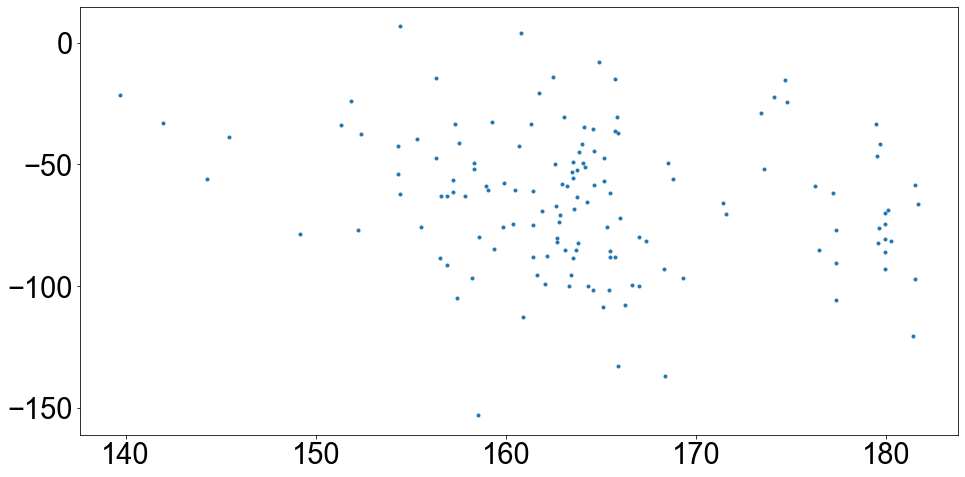

In [24]:
plt.plot(df_out_maslov['Глубина до воды, м'],df_out_maslov['popravka_gaz_temp,m'],'.')

In [28]:
from sklearn import linear_model
import statsmodels.api as sm
df_out_maslov=df_out_maslov[df_out_maslov['ДЕБИТ_СБОРНЫЙ_М3_СУТ'].notna()]
X = df_out_maslov[['Глубина до воды, м','ДЕБИТ_СБОРНЫЙ_М3_СУТ']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df_out_maslov['popravka_gaz_temp,m']
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
regr.get_params()

In [29]:
from sklearn import linear_model
import statsmodels.api as sm
df_out_maslov=df_out_maslov[df_out_maslov['ДЕБИТ_СБОРНЫЙ_М3_СУТ'].notna()]
X = df_out_maslov[['Глубина до воды, м','ДЕБИТ_СБОРНЫЙ_М3_СУТ']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df_out_maslov['popravka_gaz_temp,m']
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                             OLS Regression Results                            
Dep. Variable:     popravka_gaz_temp,m   R-squared:                       0.051
Model:                             OLS   Adj. R-squared:                  0.037
Method:                  Least Squares   F-statistic:                     3.688
Date:                 Tue, 26 Jan 2021   Prob (F-statistic):             0.0276
Time:                         21:54:24   Log-Likelihood:                -656.95
No. Observations:                  139   AIC:                             1320.
Df Residuals:                      136   BIC:                             1329.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

In [264]:
str(float(df_out['Температура_СБОРНАЯ_(Градус_С)'].iloc[nomer_stroky]+(temp_max-df_out['Температура_СБОРНАЯ_(Градус_С)'].iloc[nomer_stroky])/(steps-1)*step))

'0.0'

In [17]:
well

,IDPN,P_атмосферы_(SOLINST)_МАКС_СУТ_(Кпа)_ID_7111,P_атмосферы_(SOLINST)_МИН_СУТ_(Кпа)_ID_7112,P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110,P_атмосферы_в_замере_ГФ_(Кпа)_ID_7840,pH_водородный_показатель_ID_2201,Азот+метан_в_спонтанной_газовой_фазе_(%V)_ID_7067,Азот_N2_РАСТВОРЕННЫЙ_(объемный_процент)_ID_7212,Азот_N2_РАСТВОРЕННЫЙ_(см3_в_литре)_ID_7217,Азот_N2_в_спонтанной_газовой_фазе_(%V)_ID_3507,ГАЗОВЫЙ_ФАКТОР_поДОБЫЧЕ_(ЕЗМВ_Р)_(м3_в_м3)_ID_7104,Газовый фактор при НТД условиях (м3 в м3) ID 7040,Газовый_фактор_(м3_в_м3)_ID_7062,Газосодержание общее (литр в литре) ID 7565,Газосодержание_общее_в_зам_ГФ_(л_в_л)_ID_7850,Газосодержание_общее_в_зам_ГФ_НТД_(л_в_л)_ID_7855,Гелий_He_РАСТВОРЕННЫЙ_(объемный_процент)_ID_7210,Гелий_He_в_спонтанной_газовой_фазе_(%V)_ID_3702,Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303,ДАТА,Двуокись_CO2_РАСТ_в_зам_ГФ_(грамм_в_литре)_ID_7845,Двуокись_CO2_РАСТВОРЕННАЯ_(%V)_ID_7214,Двуокись_CO2_РАСТВОРЕННАЯ_(грамм_в_литре)_ID_7225,Двуокись_CO2_РАСТВОРЕННАЯ_(дм3_в_дм3)_ID_7063,Двуокись_CO2_РАСТВОРЕННАЯ_(см3_в_литре)_ID_7219,Двуокись_CO2_в_спонтанной_газовой_фазе(%V)_ID_7066,Двуокись_CO2_общая_(грамм_в_литре)_ID_2311,Двуокись_CO2_свободная_(грамм_в_литре)_ID_2310,Дебит газа В ЗАМЕРЕ ГАЗ_ФАКТОРА (л/с) ID 7061,Дебит_воды_В_ЗАМЕРЕ_ГАЗ_ФАКТОРА_(л/с)_ID_7060,Калий_ион_K+_(грамм_в_литре)_ID_2402,Кальций-ион_Ca++_(грамм_в_литре)_ID_2405,МГУ_ГАЗ__Ar___(%_объемный)_ID_7782,МГУ_ГАЗ__CH4___(%_объемный)_ID_7788,МГУ_ГАЗ__CO2___(%_объемный)_ID_7789,МГУ_ГАЗ__CO___(%_объемный)_ID_7787,МГУ_ГАЗ__He___(%_объемный)_ID_7784,МГУ_ГАЗ__N2___(%_объемный)_ID_7786,МГУ_ГАЗ__O2___(%_объемный)_ID_7783,МГУ_ГАЗ__Н2___(%_объемный)_ID_7785,МГУ_ГАЗ__Сумма___(%_объемный)_ID_7790,Магний-ион_Mg++_(грамм_в_литре)_ID_2404,Напор ДИНАМИЧЕСКИЙ вычисленный АО (м),Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО,Напор_на_устье_в_замере_ГФ_(метры)_ID_7830,Натрий-ион_Na+_(грамм_в_литре)_ID_2401,Общая_газонасыщенность_(м3_в_м3)_ID_7064,Сероводород_H2S_ОБЩИЙ_(грамм_в_литре)_ID_3504,Сероводород_H2S_СВОБОДНЫЙ_(грамм_в_литре)_ID_3511,Сульфат_SO4--_(грамм_в_литре)_ID_2302,Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403,Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206,Температура_(SOLINST)_МАКС_СУТ_(Градус_С)_ID_7080,Температура_(SOLINST)_МИН_СУТ_(Градус_С)_ID_7081,Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076,Температура_(ЕЗМВ)_t1_НА_УСТЬЕ_(Градус_С)_ID_7091,Температура_МАКС_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7584,Температура_МИН_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7582,Температура_СБОРНАЯ_(Градус_С),Температура_СРЕД_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7580,Температура_воды_(Градус_С)_ID_7058,Температура_воды_в_замере_ГФ_(Градус_С)_ID_7820,Температура_воды_замер_машиниста(Градус_С)_ID_7059,Температура_воздуха_в_замере_ГФ_(Градус_С)_ID_7815,Температура_газа_в_замере_ГФ_(Градус_С)_ID_7835,Температура_динамическая_(Градус_С)_ID_7072,Температура_при_отборе_пробы_(Градус_С)_ID_7012,Температура_статическая_(Градус_С)_ID_7071,Хлорид_Cl-_(грамм_в_литре)_ID_2301,кислород_O2_РАСТВОРЕННЫЙ_(%V)_ID_7211,кислород_O2_РАСТВОРЕННЫЙ_(см3_литре)_ID_7216,кислород_O2_в_спонтанной_газовой_фазе_(%V)_ID_3505,метан_CH4_РАСТВОРЕННЫЙ_(объемный_процент)_ID_7213,метан_CH4_РАСТВОРЕННЫЙ_(см3_в_литре)_ID_7218,метан_CH4_в_спонтанной_газовой_фазе_(%V)_ID_3508
26,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,852.695,851.237998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.052999,20.121000,24.001896,NaN,NaN,NaN,28.052999,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,852.695,850.948997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.419001,20.289000,24.927631,NaN,NaN,NaN,29.419001,NaN,45.299999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [101]:
str(df_out['Температура_СБОРНАЯ_(Градус_С)'].iloc[nomer_stroky]+temp_max/steps*(step+1)


'[36.10204082]'

In [259]:
df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].iloc[nomer_stroky]

101.325

In [35]:
pd.options.display.max_rows = 10
df_out#.iloc[70:90]#.tail(30)

,ДАТА,"Давление на устье, kPa",Газовый_фактор_(м3_в_м3)_ID_7062,pH_водородный_показатель_ID_2201,Кальций-ион_Ca++_(грамм_в_литре)_ID_2405,Хлорид_Cl-_(грамм_в_литре)_ID_2301,Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303,Калий_ион_K+_(грамм_в_литре)_ID_2402,Магний-ион_Mg++_(грамм_в_литре)_ID_2404,Натрий-ион_Na+_(грамм_в_литре)_ID_2401,Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403,Сульфат_SO4--_(грамм_в_литре)_ID_2302,Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206,IDPN,"Глубина до воды, м",Температура_СБОРНАЯ_(Градус_С),P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110,"popravka gaz,m","popravka_gaz_temp,m"
46,2009-02-17,26.576969,0.625,NaN,0.1283,1.6487,4.5446,NaN,0.0559,NaN,2.5297,0.025,NaN,246,2.7100,14.200000,101.325000,NaN,-34.038540
68,2009-03-11,27.557670,0.640,6.57,0.1161,1.6685,4.5867,NaN,0.0486,NaN,2.5860,0.025,6.796,246,2.8100,14.000000,101.325000,NaN,-29.955968
103,2009-04-15,27.557670,0.724,NaN,0.1161,1.7032,4.6631,NaN,0.0486,NaN,2.5860,0.025,6.862,246,2.8100,14.200000,101.325000,NaN,-36.085344
132,2009-05-14,26.576969,0.655,6.54,0.1201,1.6859,4.5323,NaN,0.0547,NaN,2.5607,0.025,6.960,246,2.7100,14.300000,101.325000,NaN,-32.327257
179,2009-06-30,25.596270,0.672,6.58,0.1082,1.6849,4.6195,NaN,0.0462,NaN,2.6227,0.025,6.856,246,2.6100,15.000000,101.325000,NaN,-31.548722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4084,2020-03-16,15.388164,0.759,NaN,0.1415,1.7010,4.5784,NaN,0.0635,NaN,2.5467,0.020,NaN,246,1.5691,20.200001,95.243317,NaN,-48.468092
4109,2020-04-10,6.119568,0.929,NaN,0.1415,1.6974,4.5433,NaN,0.0635,NaN,2.5467,0.020,NaN,246,0.6240,20.548000,94.283844,NaN,-77.083084
4144,2020-05-15,10.308138,0.324,NaN,0.1307,1.7126,4.5582,NaN,0.0559,NaN,2.5733,0.020,NaN,246,1.0511,18.330000,94.565178,NaN,-41.076352
4186,2020-06-26,4.129728,0.900,NaN,0.1295,1.7270,4.5760,NaN,0.0584,NaN,2.5654,0.020,NaN,246,0.4211,21.444000,94.906471,NaN,-85.514634


In [30]:
df_out['Глубина до воды, м'].max()

54.769098854064964

In [113]:
str(df_out['Температура_СБОРНАЯ_(Градус_С)'].iloc[nomer_stroky]+temp_max/steps*step)

'[64.62599945]'

In [116]:
bottom

array([1468.])

In [117]:
np.rint(visota_stolba/100)

array([15.])

In [120]:
temp_max

45.0

In [124]:
int(steps)

15

In [180]:
df1_new=df1_new.append(df1, ignore_index = True)

In [181]:
df1_new

,sim,state,soln,dist_x,time,step,pH,pe,reaction,temp(C),Alk(eq/kgw),mu,mass_H2O,charge(eq),pct_err,C(4)(mol/kgw),Ca(mol/kgw),Cl(mol/kgw),Mg(mol/kgw),Na(mol/kgw),S(6)(mol/kgw),pressure,total mol,volume,g_CO2(g),g_H2O(g),g_Mtg(g),g_Ntg(g),density1,"CO2,kg","density2, kg/m3","real pressure, atm","popravka, m"
0,1,react,1,-99.0,0.0,1,6.134398,-0.402848,-99,25.299999,0.070503,0.11814,1.0,4.032148e-16,1.777564e-13,0.152925,0.00374,0.04631,0.00227,0.105213,0.00021,15.43,0.0,0.0,0.0,0.0,0.0,0.0,1.00458,0.0,1004.579739,16.401937,0.045638


In [140]:
df1['density2, kg/m3'].iloc[0]*100*9.80665

683179.9907814688

In [141]:
df1['density2, kg/m3'].iloc[0]

696.6497129819753

In [282]:
aa

array([638.96])

In [153]:
df1_new['popravka, m'].sum()*-1

30.36073168120926

In [158]:
df1_new.to_csv(fullpath2, index=False,encoding= 'utf-8-sig')

In [171]:
df_new

NameError: name 'df_new' is not defined

In [ ]:
#wellnumbers = [140,6002,111,112,10071,141,101,355,10070,46,,,,,,,,,,,,,,,,,,,,,,,,]
#wellnames = ['1-KMV-BIS','75-bis','1-E','2-E','71','55','34-бис','24-бис-1','70','46','39-бис','36-бис','49-Э','9','56','33-бис','41-бис','57-РЭ-бис']
params = {
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 23,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [40/2.54, 20/2.54],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
       }
df_out_maslov=pd.DataFrame()
rcParams.update(params)
xlim = ('2009-01')
xlim = datetime.strptime(xlim , '%Y-%m')
glubina = pd.read_excel('D:\\Kortunov\\transfer\\Esentuk\\glubina.xlsx')
df_gaz_sostav = pd.read_excel('D:\\Kortunov\\transfer\\Esentuk\\gaz_sostav.xlsx')
glubina['скв'] = glubina['скв'].astype(str)
x = IPhreeqc() #initalize IPhreeqc object
df1 = pd.DataFrame()
x.LoadDatabase('pitzer.dat') # Load database
x.SetDumpStringOn()   #set DumpString output on
x.SetDumpFileOn()
ph=np.NaN
steps = np.NaN
bbb = np.NaN
temp_ustie = 20
df_out_vtext=pd.DataFrame(columns=['IDPN','Name','max','min'])
#df = pd.concat([df,df_chem], ignore_index=True, sort=False)
df_out = pd.DataFrame()
for a in range(0,len(wellnames)):

    print(a)
    print(wellnumbers[a])
    print(wellnames[a])
    well = df[df['IDPN'] == wellnumbers[a]]
    well = well[(well['ДАТА'] > xlim)]
#    df_dyn = df_dyn[(df_dyn['ДАТА'] > xlim)]
    
    #    well = well[(well['ДАТА'] > xlim)]
    df_out = pd.DataFrame()
    countnulls = well['Газовый_фактор_(м3_в_м3)_ID_7062'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
    #countnulls = well['Газовый_фактор_при_НТД_условиям_(м3_в_м3)_ID_7040'].count()
    aa = df_info.loc[df_info['ID PN'] == wellnumbers[a], 'АО Точки Замера'].values

    df_gaz_sostav_well = df_gaz_sostav[df_gaz_sostav["IDPN"] ==wellnumbers[a]]
    CO2 = df_gaz_sostav_well['CO2(g)'].values
    CH4 = df_gaz_sostav_well['Mtg(g)'].values
    N2 = df_gaz_sostav_well['N'].values
    
    glubina_well = glubina[glubina["скв"] == str(wellnames[a])]
    bottom = glubina_well['Глубина'].values
    temp_max = well['Температура_СБОРНАЯ_(Градус_С)'].max()
    if temp_max>45:
        temp_max = 45
#    countnulls1 = well['Отбор_ГВС_по_счетчику_(ЕЗМВ_Р)__(метр_куб)_ID_7086'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
    if countnulls > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график
        print('YES')
       
        df2 = pd.DataFrame()
        df_out = pd.DataFrame()
        df2 = well.groupby("ДАТА").mean()
        df2['ДАТА'] = df2.index
        df_out =  df2[['IDPN','ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062','ДЕБИТ_СБОРНЫЙ_М3_СУТ','Температура_СБОРНАЯ_(Градус_С)','pH_водородный_показатель_ID_2201','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206','Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)']]
        df_out['ДАТА'] = pd.to_datetime(df_out['ДАТА'])
        df_dyn['ДАТА']= pd.to_datetime(df_dyn['ДАТА'])
        df_out = df_out.reset_index(drop=True)
        df_out = pd.merge_asof(df_out, df_dyn[['ДАТА','P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']].dropna().sort_values('ДАТА'), on="ДАТА", tolerance=pd.Timedelta("2ms"))
        
#        df_out = pd.merge_asof(df_out, df_chem[['ДАТА','Хлорид_Cl-_(грамм_в_литре)_ID_2301']], on="ДАТА", tolerance=pd.Timedelta("2ms"))
        df_out['Давление на устье, kPa'] = (df_out['Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО']-aa)*9.807
        df_out['Давление на устье, kPa']= df_out['Давление на устье, kPa'].combine_first((df_out['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)']-aa)*9.807)
        df_out['Глубина до воды, м']  = (df_out['Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО']-aa)
        df_out['Глубина до воды, м']= df_out['Глубина до воды, м'].combine_first((df_out['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)']-aa))
        df_out[['Давление на устье, kPa']] = df_out[['Давление на устье, kPa']].mask((df_out[['Давление на устье, kPa']] - df_out[['Давление на устье, kPa']].mean()).abs() > 3 * df_out[['Давление на устье, kPa']].std())
        df_out[['Давление на устье, kPa']] = df_out[['Давление на устье, kPa']].mask((df_out[['Давление на устье, kPa']] - df_out[['Давление на устье, kPa']].mean()).abs() > 3 * df_out[['Давление на устье, kPa']].std())
        df_out= df_out[df_out['Давление на устье, kPa'].notna()]  
        my_list = df_out.columns.tolist()
        reordered_cols = reorder_columns(my_list, first_cols=['ДАТА', 'Давление на устье, kPa', 'Газовый_фактор_(м3_в_м3)_ID_7062','pH_водородный_показатель_ID_2201','ДЕБИТ_СБОРНЫЙ_М3_СУТ','Кальций-ион_Ca++_(грамм_в_литре)_ID_2405','Хлорид_Cl-_(грамм_в_литре)_ID_2301', 'Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303','Калий_ион_K+_(грамм_в_литре)_ID_2402','Магний-ион_Mg++_(грамм_в_литре)_ID_2404','Натрий-ион_Na+_(грамм_в_литре)_ID_2401','Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403','Сульфат_SO4--_(грамм_в_литре)_ID_2302','Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206'], last_cols=['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'], drop_cols=['Напор ДИНАМИЧЕСКИЙ вычисленный АО (м)','Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО'])
        df_out = df_out[reordered_cols]


    

    else:
        continue
    df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301']=df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].fillna(method='ffill')        
    df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403']=df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].fillna(method='ffill')        
    df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302']=df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302'].fillna(method='ffill')        
    df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303']=df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303'].fillna(method='ffill')        
    df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404']=df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404'].fillna(method='ffill')        
    df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405']=df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].fillna(method='ffill')        
    df_out['Давление на устье, kPa']=df_out['Давление на устье, kPa'].fillna(method='ffill')
    df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301']=df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].fillna(method='ffill')        
    df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403']=df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].fillna(method='bfill')        
    df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302']=df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302'].fillna(method='bfill')        
    df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303']=df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303'].fillna(method='bfill')        
    df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404']=df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404'].fillna(method='bfill')        
    df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405']=df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].fillna(method='bfill')  
    df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301']=df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].fillna(method='bfill')  
    df_out['Давление на устье, kPa']=df_out['Давление на устье, kPa'].fillna(method='bfill')
    df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110']=df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].fillna(101.325)
#    df_out= df_out[df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].notna()]
    df_out= df_out[df_out['Газовый_фактор_(м3_в_м3)_ID_7062'].notna()]
    df_out = df_out.iloc[1:]
    df_out= df_out[df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].notna()]
    df_out= df_out[df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404'].notna()]
    df_out= df_out[df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303'].notna()]
    df_out= df_out[df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302'].notna()]
    df_out= df_out[df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].notna()]
    df_out= df_out[df_out['Температура_СБОРНАЯ_(Градус_С)'].notna()]
#    df_out= df_out[df_out['Температура_СБОРНАЯ_(Градус_С)'].notna()]
    df_out= df_out[df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].notna()]
    df_out= df_out[df_out['Глубина до воды, м'].notna()]        
        

#     df_out= df_out[df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].notna()]

#    df_out= df_out[df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].notna()]
#    df_out= df_out[df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].notna()]

    df_out['popravka gaz,m'] = np.NaN
    df_out['popravka_gaz_temp,m'] = np.NaN
    for nomer_stroky in range(0, 10):
        try:
            df1_new = pd.DataFrame()
    #        print(nomer_stroky)
            if df_out['Температура_СБОРНАЯ_(Градус_С)'].iloc[nomer_stroky] <= 15:
                temp_ustie = 15
            else:
                temp_ustie = df_out['Температура_СБОРНАЯ_(Градус_С)'].iloc[nomer_stroky]

            if df_out['pH_водородный_показатель_ID_2201'].iloc[nomer_stroky] > 0:
                ph = str(df_out['pH_водородный_показатель_ID_2201'].iloc[nomer_stroky])
            else:
                ph = str(6.5)

    #        print(nomer_stroky)

            if df_out['Давление на устье, kPa'].iloc[nomer_stroky] >0:
                pressure = df_out['Давление на устье, kPa'].iloc[nomer_stroky]*0.00987+df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].iloc[nomer_stroky]/101.325
                visota_stolba = bottom
            else:
                pressure = df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].iloc[nomer_stroky]/101.325
                visota_stolba = bottom-abs(df_out['Глубина до воды, м'].iloc[nomer_stroky])
    #        bottom = 150
     #       bottom = float(df_info.loc[df_info['ID PN']  == wellnumbers[a], 'glub'].values/10)
            press_diff = bottom*0.0981-pressure
            visota_uchastka = 10
            steps=np.rint(visota_stolba/visota_uchastka)
            for step in range(0,int(steps)):
    #            print('x')
                x.AccumulateLine(
                """
                SOLUTION 1
                    temp      """ +' '+        str(df_out['Температура_СБОРНАЯ_(Градус_С)'].iloc[nomer_stroky]))
                x.AccumulateLine("""
                    pH"""        +' '+ str(ph))
                x.AccumulateLine("""
                    pe        4
                    redox     pe
                    units     mol/l
                    density   1 calc""")
#                    C(4)"""  +' '+   str(' '+ str(df_out['Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303'].iloc[nomer_stroky]/61.008) +' charge'))
#                x.AccumulateLine("""
#                    Ca"""+' '+        str(df_out['Кальций-ион_Ca++_(грамм_в_литре)_ID_2405'].iloc[nomer_stroky]/40))
#                x.AccumulateLine("""
#                    Cl"""+' '+        str(df_out['Хлорид_Cl-_(грамм_в_литре)_ID_2301'].iloc[nomer_stroky]/35.45))
#                x.AccumulateLine("""
 #                   Mg""" +' '+        str(df_out['Магний-ион_Mg++_(грамм_в_литре)_ID_2404'].iloc[nomer_stroky]/24.305))
#                x.AccumulateLine("""
#                    Na"""  +' '+        str(df_out['Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403'].iloc[nomer_stroky]/22.99))
#                x.AccumulateLine("""
#                    S(6)""" +' '+        str(df_out['Сульфат_SO4--_(грамм_в_литре)_ID_2302'].iloc[nomer_stroky]/96.06))
                x.AccumulateLine("""
                    -water    1 # kg""")

                x.AccumulateLine("""
                GAS_PHASE 1
                    -fixed_pressure
                    -pressure""" +' '+        str(df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].iloc[nomer_stroky]/101.325))
                x.AccumulateLine("""
                    -volume"""  +' '+        str(25))
                x.AccumulateLine("""
                   -temperature""" +' '+        str(df_out['Температура_СБОРНАЯ_(Градус_С)'].iloc[nomer_stroky]))
                x.AccumulateLine("""
                    CO2(g)""" +' '+        str(float(CO2*df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].iloc[nomer_stroky]/101.325)))
        #        x.AccumulateLine("""
        #             H2O(g)    0""")
                x.AccumulateLine("""
                     Ntg(g)""" +' '+        str(float(N2*df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].iloc[nomer_stroky]/101.325)))
                x.AccumulateLine("""
                    Mtg(g)""" +' '+        str(float(CH4*df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].iloc[nomer_stroky]/101.325)))
                x.AccumulateLine("""

                REACTION_PRESSURE 1
                      """)
                x.AccumulateLine(   str(float(np.round(pressure,2))))
                x.AccumulateLine("""

                REACTION_TEMPERATURE 1
                      """)
                x.AccumulateLine(   str(20))
        #        x.AccumulateLine(   str(15)+' '+str(temp_max) + ' in ' + str(int(np.round(press_diff)))+ ' steps')
                x.AccumulateLine("""

                SELECTED_OUTPUT
                    -file     D:\\Kortunov\\transfer\\Esentuk\\teeeeeest.txt
                    -user_punch           true
                    -high_precision       false
                    -reset

                    -simulation	true
                    -gases CO2(g) H2O(g) Mtg(g) Ntg(g)
                    -totals    C(4) Ca Cl Mg  Na S(6)
                USER_PUNCH
                    -headings density1
                    -start
                     10 punch RHO
                    -end
                END

                """
                )
    #            print('y')
                rrr = x.GetDumpString()
                x.RunAccumulated() #Run phreeqc
                df1 = pd.DataFrame()
                bbb = x.GetSelectedOutputArray()
                headers = bbb.pop(0)
                df1 = pd.DataFrame(bbb, columns=headers)
                df1 = df1.iloc[1:]

                x.ClearAccumulatedLines()
                df1['CO2,kg']=df1['g_CO2(g)']*(12+32)/1000+df1['g_Ntg(g)']*(28)/1000+df1['g_H2O(g)']*(16+2)/1000+df1['g_Mtg(g)']*(16)/1000
                df1['density2, kg/m3'] = (df1['CO2,kg']+df1['density1'])/(df1['volume']/1000+1/1000)
                pressure_add = df1['density2, kg/m3'].iloc[0]*visota_uchastka*9.80665/101325
                pressure = pressure + pressure_add
                df1['real pressure, atm'] = pressure
                df1['popravka, m'] =  df1['density2, kg/m3'].iloc[0]*visota_uchastka*9.80665*0.00010197-visota_uchastka
    #            print('z')
                df1_new=df1_new.append(df1, ignore_index = True)

            df_out['popravka_gaz_temp,m'].iloc[nomer_stroky]= df1_new['popravka, m'].sum()
        except:

            pass
    df_out_vtext = df_out_vtext .append({'IDPN': wellnumbers[a],'Name': wellnames[a],'max': df_out['popravka_gaz_temp,m'].max(),'min': df_out['popravka_gaz_temp,m'].min()}, ignore_index=True)

    df_out_maslov = pd.concat([df_out_maslov,df_out[['IDPN','ДАТА','Газовый_фактор_(м3_в_м3)_ID_7062','popravka_gaz_temp,m','popravka gaz,m']]], ignore_index=True, sort=True)

#   plt.plot(df_out['ДАТА'],df_out['popravka,m'],'o')
#     fig = plt.figure()
#     ax = fig.add_subplot(1,1,1)# Тут примерно все тоже самое, только я создаю рисунок а на нем говорю, чтро будет 4 сабплота и в данном случае вызываю 1. 4 это количество, 1 это адрес по горищонтали, 1 это адрес по вертикали
#     ax.annotate('Скважина №'+ str(wellnames[a])+ ' ('+str(wellnumbers[a])+')',
#         xy=(0.85, 1.1), xycoords='axes fraction',
#         horizontalalignment='center', verticalalignment='top',
#         fontsize=30, color = 'black') #here goes the annotation of well number and well name in the top right of every subplot

#     lns1 = ax.plot(df_out['ДАТА'],df_out['popravka_gaz_temp,m'],'o--', alpha = 0.6, color = "maroon",label = 'Газовый_фактор',markersize=14)
#     ax.xaxis_date()
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#     #            ax.xaxis.set_minor_locator(MultipleLocator(12))
#     ax.tick_params(which='minor', length=4)
#     ax.tick_params(which='major', length=5, width=2)
#     months = mdates.MonthLocator() 
#     ax.xaxis.set_minor_locator(months)

#     ax.set_ylabel('Поправка к напору на забое скважины, м', color = "black")
#     ax.set_xlabel('Дата, года', color = "Black")
#     ax.tick_params('y', colors= "black")




#     plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
#     fig.set_facecolor('white')# тут я решил сделать белый фон, а не прозрачный как в прошлом скрипте
#     directory = 'D:\\WORK\\MSU\\Esentuk\\popravka_figures4'
#     filename = '\\'+str(wellnames[a])# и рисунок поменял на джипег
#     fullpath = directory + filename
#     if not os.path.exists(directory):
#         os.makedirs(directory)
#     keepcharacters = (' ','.','_',')','(','\\',':')
#     fullpath2 = "".join(c for c in fullpath if c.isalnum() or c in keepcharacters).rstrip()
#     plt.savefig(fullpath2,dpi=300,facecolor='w',bbox_inches = 'tight',pad_inches = 0)#,transparent=True)
#     plt.close()
#     fig.clf
# directory = 'D:\\WORK\\MSU\\Esentuk\\popravka4'
# filename = '\\'+'Gaztermlift_Maslovu'+'.csv'
# fullpath = directory + filename
# if not os.path.exists(directory):
#     os.makedirs(directory)
# keepcharacters = (' ','.','_',')','(','\\',':')
# fullpath2 = "".join(c for c in fullpath if c.isalnum() or c in keepcharacters).rstrip()
# df_out_maslov.to_csv(fullpath2, index=False,encoding= 'utf-8-sig')

In [ ]:
df1_new

(100, 10)

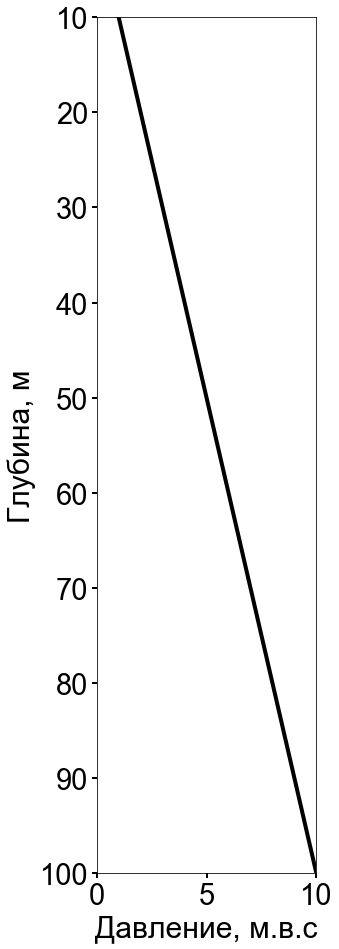

In [107]:
params = {
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 23,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [10/2.54, 40/2.54],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
       }

rcParams.update(params)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)# Тут примерно все тоже самое, только я создаю рисунок а на нем говорю, чтро будет 4 сабплота и в данном случае вызываю 1. 4 это количество, 1 это адрес по горищонтали, 1 это адрес по вертикали
# ax.annotate('Скважина №'+ str(wellnames[a])+ ' ('+str(wellnumbers[a])+')',
#     xy=(0.85, 1.1), xycoords='axes fraction',
#     horizontalalignment='center', verticalalignment='top',
#     fontsize=30, color = 'black') #here goes the annotation of well number and well name in the top right of every subplot
df1_new['Глубина']=df1_new.index*10+10
df1_new= df1_new[df1_new['Глубина']<=100] 
lns1 = ax.plot(df1_new['Глубина']/10,df1_new['Глубина'],'-', alpha = 1, color = "0",label = 'Газовый_фактор',linewidth=4)
#ax.xaxis_date()
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#            ax.xaxis.set_minor_locator(MultipleLocator(12))
ax.tick_params(which='minor', length=4)
ax.tick_params(which='major', length=5, width=2)
#months = mdates.MonthLocator() 
#ax.xaxis.set_minor_locator(months)
plt.gca().invert_yaxis()
ax.set_ylabel('Глубина, м', color = "black")
ax.set_xlabel('Давление, м.в.с', color = "Black")
ax.tick_params('y', colors= "black")
ax.set_xlim(0, 10)
ax.set_ylim(100, 10)


(100, 10)

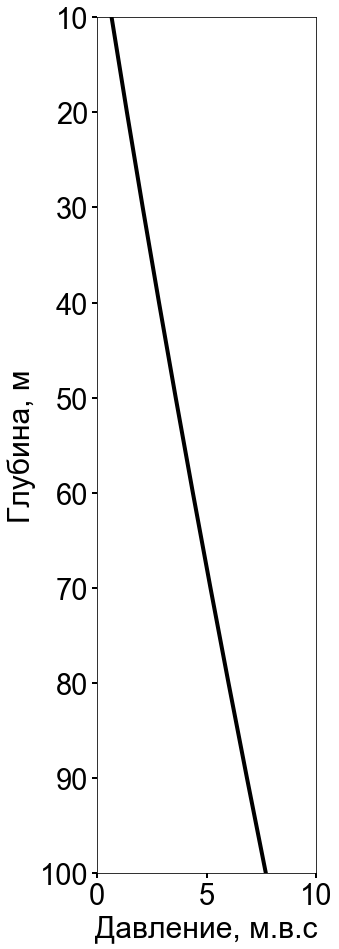

In [103]:
params = {
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 23,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [10/2.54, 40/2.54],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
       }

rcParams.update(params)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)# Тут примерно все тоже самое, только я создаю рисунок а на нем говорю, чтро будет 4 сабплота и в данном случае вызываю 1. 4 это количество, 1 это адрес по горищонтали, 1 это адрес по вертикали
# ax.annotate('Скважина №'+ str(wellnames[a])+ ' ('+str(wellnumbers[a])+')',
#     xy=(0.85, 1.1), xycoords='axes fraction',
#     horizontalalignment='center', verticalalignment='top',
#     fontsize=30, color = 'black') #here goes the annotation of well number and well name in the top right of every subplot
df1_new['Глубина']=df1_new.index*10+10
df1_new= df1_new[df1_new['Глубина']<=100] 
lns1 = ax.plot(df1_new['real pressure, atm']-17.13,df1_new['Глубина'],'-', alpha = 1, color = "0",label = 'Газовый_фактор',linewidth=4)
#ax.xaxis_date()
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#            ax.xaxis.set_minor_locator(MultipleLocator(12))
ax.tick_params(which='minor', length=4)
ax.tick_params(which='major', length=5, width=2)
#months = mdates.MonthLocator() 
#ax.xaxis.set_minor_locator(months)
plt.gca().invert_yaxis()
ax.set_ylabel('Глубина, м', color = "black")
ax.set_xlabel('Давление, м.в.с', color = "Black")
ax.tick_params('y', colors= "black")
ax.set_xlim(0, 10)
ax.set_ylim(100, 10)


(100, 10)

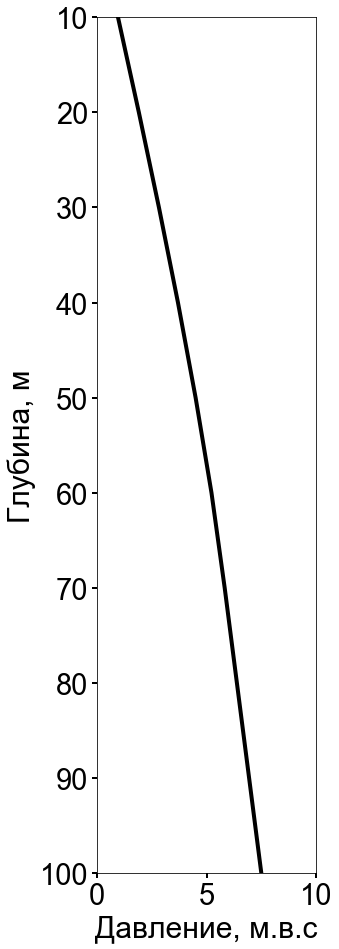

In [96]:
params = {
       'axes.labelsize': 30,
       'font.size': 15,
       'font.sans-serif': 'Arial',
       'legend.fontsize': 23,
       'xtick.labelsize': 29,
       'ytick.labelsize': 29,
       'xtick.direction': 'out',
       'ytick.direction': 'out',
       'text.usetex': False,
       'figure.figsize': [10/2.54, 40/2.54],
       'mathtext.default': 'regular',
       'axes.facecolor': 'white',
       }

rcParams.update(params)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)# Тут примерно все тоже самое, только я создаю рисунок а на нем говорю, чтро будет 4 сабплота и в данном случае вызываю 1. 4 это количество, 1 это адрес по горищонтали, 1 это адрес по вертикали
# ax.annotate('Скважина №'+ str(wellnames[a])+ ' ('+str(wellnumbers[a])+')',
#     xy=(0.85, 1.1), xycoords='axes fraction',
#     horizontalalignment='center', verticalalignment='top',
#     fontsize=30, color = 'black') #here goes the annotation of well number and well name in the top right of every subplot
df1_new['Глубина']=df1_new.index*10+10
df1_new= df1_new[df1_new['Глубина']<=100] 
lns1 = ax.plot(df1_new['real pressure, atm']-17.13,df1_new['Глубина'],'-', alpha = 1, color = "0",label = 'Газовый_фактор',linewidth=4)
#ax.xaxis_date()
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#            ax.xaxis.set_minor_locator(MultipleLocator(12))
ax.tick_params(which='minor', length=4)
ax.tick_params(which='major', length=5, width=2)
#months = mdates.MonthLocator() 
#ax.xaxis.set_minor_locator(months)
plt.gca().invert_yaxis()
ax.set_ylabel('Глубина, м', color = "black")
ax.set_xlabel('Давление, м.в.с', color = "Black")
ax.tick_params('y', colors= "black")
ax.set_xlim(0, 10)
ax.set_ylim(100, 10)

In [13]:
df_out['P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110'].iloc[nomer_stroky]/101.325

0.932181297394484

In [29]:
df1_new.index*10

TypeError: 'RangeIndex' object is not callable

In [30]:
df1_new['Глубина']

0         0
1        10
2        20
3        30
4        40
       ... 
142    1420
143    1430
144    1440
145    1450
146    1460
Name: Глубина, Length: 147, dtype: int64

In [35]:
pd.unique(df_dyn['IDPN'])

array([     143,      243,      245,      246,      348,      349,
            148,      149,     6002,       97,       99,      100,
            101,      102,      104,      105,      110,      111,
            140,      141,      146,      144,    90020,      118,
            112,      269,      103,      113,      242,      117,
            247,      249,      107, 72620015, 72222003,      116,
            345,      343,      344,      351,      120,      106,
       72222002,      232,      114,      250,      127,      129,
            130,      133,      137,      108,      109,      115,
            122,      123,      124,      125,      126,      128,
            131,      132,      135,      136,      138,      121,
            308,      307,      287,      119, 72222008,     6001,
       72620005,      147, 72222007, 72222004, 72222005,       98,
            991,      992, 72222006, 72620008, 72620011, 72620014,
       72620024,      994,      993,      996,      997, 72222

In [69]:
rcParams.update(params)
wellnumbers =  pd.unique(df['IDPN'])#в переменную wellnumbers  записываем все уникальные номера скважин
#columnames = ['Напор_(SOLINST)_СРЕД_СУТ_(метры)','Дебит_(м3_в_сут)','CO2_общая_(грамм_в_литре)','CO2_РАСТВОРЕННАЯ_(объемный_процент)','CO2_свободная_(грамм_в_литре)','pH_водородный_показатель','борная_кислота_H3BO3_(грамм_в_литре)','бор_суммарно_B_(грамм_в_литре)','Газовый_фактор_(м3_в_м3)','гидрокарбонат_HCO3-_(грамм_в_литре)','Давление_(ЕЗМВ)_P1_устье_(кг_на_см2)','Дебит_газа_(м3_в_сут)','Динамический_уровень_от_ТЗ_замер_техника_(метры)','Динамический_уровень_от_точки_замера_(метры)','железо_двухвалентноеFe++_(грамм_в_литре)','железо_суммарно_Fe_(грамм_в_литре)','железо_трехвалентное_Fe+++_(грамм_в_литре)','жесткость_карбонатная_(грамм-экв_в_литре)','жесткость_общая_(грамм-экв_в_литре)','иодид_I-_(грамм_в_литре)','карбонат_CO3--_(грамм_в_литре)','кальций-ион_Ca++_(грамм_в_литре)','Напор_(ГИДЭК)_СРЕД_СУТ_(метры)','Общая_газонасыщенность_(м3_в_м3)']
columnames1 = list(df_dyn.columns)# в переменную колумнейм1 записываем все имена колонок в таблице
columnames = columnames1[7:]# в переменную колумнейм записываем все имена колонок в таблице начиня с 7й (до 7й там дата)
#def Create_Figures():#инициализируем функцию, так проще потом в будующем будет визуализировать
for a in range(0,len(wellnumbers)):#Перебираем все скважины
    if wellnumbers[a] > 12098535:
        print(a)# это для контроля я вывожу номера цикла и номера скважины, что бы просто понимать что происходит пока код считает
        print(wellnumbers[a])
        well = df_dyn[df_dyn['IDPN'] == wellnumbers[a]]#делаем отдельный датафрейм для каждой скважины какждый круг цикла, что бы не испортить коренной датафрейм
        well['tz']= well['Напор_(АО)_(метры)_ID_7073']-well['Статический_уровень_от_ТЗ_(метры)_ID_7051']
        well_tz = well['tz'].mean()
        if np.isnan(well_tz) ==False:
            well['new'] = well['Статический_уровень_от_ТЗ_(метры)_ID_7051']+well_tz
            well['Напор_(АО)_(метры)_ID_7073']=well['Напор_(АО)_(метры)_ID_7073'].fillna(well['new'])
#        for b in range(0,len(columnames)):#теперь перебираем каждую колонку в текущей скважине
        countnulls =  well['Напор_(АО)_(метры)_ID_7073'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
        if countnulls > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график
#                well = df[df['IDPN'] == wellnumbers[a]]
            fig, ax= plt.subplots()#это инициализация рисунка
            #scatter graph дает точечный график. Первые два значения через запятую это икс и игрек. Потом всякие параметры, прозрачность, размер цвет и тд. Лейбл используется в легенде
            lns1 = ax.scatter(well['ДАТА'], well['Напор_(АО)_(метры)_ID_7073'], s = 250, alpha = 0.7, color = "maroon", label = 'Напор_(АО)_(метры)_ID_7073')
            #secondary axis
#             ax1 = ax.twinx() Это использовалось для воода второй оси
#             #bar rate graph, он использовался для построения дебита, когда я строил для двух осей
#             lns2 = ax1.bar(x=well['ДАТА'], height =well['Дебит_(м3_в_сут)'], width = 1, alpha = 0.7, color = "royalblue",label = 'Дебит')
#             #legend setup wow it works Легенда так заебисто сделана потому что для графика bar draph и скаттера одновременно нормальным путем легенда не делалась, что-то там не совпадает
            myl=[lns1]#в данном случае это не нужно, можно просто написать ax.legend, но уж как есть.
            labs=[l.get_label() for l in myl]
#            ax.legend(myl, labs, frameon=False,mode = "expend",ncol=2, bbox_to_anchor=(0.85,0.97))#, loc="lower left")
            #dates format for x axis
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))#формат оси даты, есть много вариантов, например %Y это 4х значный год, а %y - двузначный год
            ax.xaxis_date()# мы сообщаем что нижняя ось это даты (формат данных для дат часто и не только тут работает не оч, поэтому типа отдельно сообщаем. Но насколько я помню, тут и без этого все работает)
#                    ax.set_xlim(, 2021*365.25)#устанавливаем ограничемние по нижней оси, тут я поленился, не сделал нормально, поэтому это ограничение в днях. В данном случае примерно от начала наших работ
            #это немного расширяет оси по вертикали, ограничение считает по макс+5% и мин-5%, что бы точки не упирались в потолок и пол. Не оч хорорший вариант, но для одного графика на оси работает норм. Я все думаю сделать что-то поумнее но пока нет времени
            ax.set_ylim( well['Напор_(АО)_(метры)_ID_7073'].min()-5* well['Напор_(АО)_(метры)_ID_7073'].min()/100, well['Напор_(АО)_(метры)_ID_7073'].max()+5* well['Напор_(АО)_(метры)_ID_7073'].max()/100) ##ads heads constrains, with 10% over the top to have some space for data
            ax.annotate('Скважина №' + str(wellnumbers[a]) + '  Колонка: '+'Напор_(АО)_(метры)_ID_7073',
                        xy=(0.5, .97), xycoords='figure fraction',
                        horizontalalignment='center', verticalalignment='top',
                        fontsize=30, color = 'black') #Этот кусок добавляет аннотацию - в данном случа он берет название скважины и название колонки и пишет их вверху каждого графика

            ax.set_ylabel('Напор, м, АО', color = "maroon")#Название оси(в цвет данных)
#            ax1.set_ylabel('Дебит, $м^3/сутки$', color = "royalblue")
            ax.tick_params('y', colors= "maroon")#формат чисел на осях (в цвет данных), так же там есть много опций
#            ax1.tick_params('y', colors= "royalblue")
            ax.grid(axis = 'both')#активиззирую сетку
            fig.tight_layout()#эта штука тут не нужна, она бывает нужна, когдда много графиков на одной картинке, но пусть будет
            directory = 'D:\\WORK\\MSU\\Esentuk\\figures\\wells\\gons'+str(wellnumbers[a]) #делаю переменную дериктория, где прописываю нужный путь и добавляю номер скважины. То есть для каждой скважины своя папка создается
            filename = '\\'+str(wellnumbers[a])+'_'+'Напор_(АО)_(метры)_ID_7073'#делаю переменную для имени файла, который собирается из номера скважины и названия колонки
            fullpath = directory + filename#соединяю адрес дериктории и имя файла в полный нужный мне путь
            if not os.path.exists(directory):
                os.makedirs(directory)#Проверяю есть ли такая папка, если нет - то создаю
            keepcharacters = (' ','.','_',')','(','\\',':')# эти две строчки нужны для того, что бы из названия файла убрать все символы, которые не могут использоваться в названии файла (там у некоторых колонок есть знако вопроса в названии, этот кусок кода этот знако вопроса убирает).
            fullpath2 = "".join(c for c in fullpath if c.isalnum() or c in keepcharacters).rstrip()
            plt.savefig(fullpath2,dpi=300,transparent=True)#,bbox_inches = 'tight',pad_inches = 0)#,transparent=True)# сохраняю фигуру, много тоже опций, все расписаны на сайте матплотлиба
            plt.close()#Закрываю картинку и все удаляю
            fig.clf
#Create_Figures()#вызов функции

70
72222005


C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

71
72222004
72
72620005
73
72222002
74
72620018
75
72620019
76
72620020
77
72620022
78
72620015
79
72222003
93
72222008
94
72222007
97
72222006
98
72620008
99
72620011
100
72620014
101
72620024
106
72222001
108
72620016
111
72620021
115
72620009
116
72620017


In [64]:
well['new']

103363    640.121766
103577    640.121766
103733    639.121766
103919    639.121766
104080    639.121766
             ...    
441389           NaN
441441           NaN
441491           NaN
441539           NaN
441586           NaN
Name: new, Length: 2253, dtype: float64

In [67]:
well['Напор_(АО)_(метры)_ID_7073']=well['Напор_(АО)_(метры)_ID_7073'].fillna(well['new'])
well['Напор_(АО)_(метры)_ID_7073']

C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


103363    640.121766
103577    640.121766
103733    639.121766
103919    639.121766
104080    639.121766
             ...    
441389    635.570007
441441    635.580017
441491    635.590027
441539    635.580017
441586    635.599976
Name: Напор_(АО)_(метры)_ID_7073, Length: 2253, dtype: float64

In [65]:
well['Напор_(АО)_(метры)_ID_7073']

103363           NaN
103577           NaN
103733           NaN
103919           NaN
104080           NaN
             ...    
441389    635.570007
441441    635.580017
441491    635.590027
441539    635.580017
441586    635.599976
Name: Напор_(АО)_(метры)_ID_7073, Length: 2253, dtype: float64

In [54]:
rcParams.update(params)
wellnumbers =  pd.unique(df['IDPN'])#в переменную wellnumbers  записываем все уникальные номера скважин
#columnames = ['Напор_(SOLINST)_СРЕД_СУТ_(метры)','Дебит_(м3_в_сут)','CO2_общая_(грамм_в_литре)','CO2_РАСТВОРЕННАЯ_(объемный_процент)','CO2_свободная_(грамм_в_литре)','pH_водородный_показатель','борная_кислота_H3BO3_(грамм_в_литре)','бор_суммарно_B_(грамм_в_литре)','Газовый_фактор_(м3_в_м3)','гидрокарбонат_HCO3-_(грамм_в_литре)','Давление_(ЕЗМВ)_P1_устье_(кг_на_см2)','Дебит_газа_(м3_в_сут)','Динамический_уровень_от_ТЗ_замер_техника_(метры)','Динамический_уровень_от_точки_замера_(метры)','железо_двухвалентноеFe++_(грамм_в_литре)','железо_суммарно_Fe_(грамм_в_литре)','железо_трехвалентное_Fe+++_(грамм_в_литре)','жесткость_карбонатная_(грамм-экв_в_литре)','жесткость_общая_(грамм-экв_в_литре)','иодид_I-_(грамм_в_литре)','карбонат_CO3--_(грамм_в_литре)','кальций-ион_Ca++_(грамм_в_литре)','Напор_(ГИДЭК)_СРЕД_СУТ_(метры)','Общая_газонасыщенность_(м3_в_м3)']
columnames1 = list(df_dyn.columns)# в переменную колумнейм1 записываем все имена колонок в таблице
columnames = columnames1[7:]# в переменную колумнейм записываем все имена колонок в таблице начиня с 7й (до 7й там дата)
#def Create_Figures():#инициализируем функцию, так проще потом в будующем будет визуализировать
for a in range(0,len(wellnumbers)):#Перебираем все скважины
    if wellnumbers[a] > 12098535:
        print(a)# это для контроля я вывожу номера цикла и номера скважины, что бы просто понимать что происходит пока код считает
        print(wellnumbers[a])
        well = df_dyn[df_dyn['IDPN'] == wellnumbers[a]]#делаем отдельный датафрейм для каждой скважины какждый круг цикла, что бы не испортить коренной датафрейм
        well['tz']= well['Напор_(АО)_(метры)_ID_7073']-well['Статический_уровень_от_ТЗ_(метры)_ID_7051']
        well_tz = well['tz'].mean()
        well['new'] = well['Статический_уровень_от_ТЗ_(метры)_ID_7051']+well_tz
        well['Напор_(АО)_(метры)_ID_7073'].fillna(well['new'])
#        for b in range(0,len(columnames)):#теперь перебираем каждую колонку в текущей скважине
        countnulls =  well['Статический_уровень_от_ТЗ_(метры)_ID_7051'].count()#считаем сколько ненулевых значений в нашей текущей колонке (переменная неправильно названа)
        if countnulls > 0:# Если есть хоть одно значение(это можно и менять естсетсвенно) значит строим график
#                well = df[df['IDPN'] == wellnumbers[a]]
            fig, ax= plt.subplots()#это инициализация рисунка
            #scatter graph дает точечный график. Первые два значения через запятую это икс и игрек. Потом всякие параметры, прозрачность, размер цвет и тд. Лейбл используется в легенде
            lns1 = ax.scatter(well['ДАТА'], well['Статический_уровень_от_ТЗ_(метры)_ID_7051'], s = 250, alpha = 0.7, color = "maroon", label = 'Напор_(АО)_(метры)_ID_7073')
            #secondary axis
#             ax1 = ax.twinx() Это использовалось для воода второй оси
#             #bar rate graph, он использовался для построения дебита, когда я строил для двух осей
#             lns2 = ax1.bar(x=well['ДАТА'], height =well['Дебит_(м3_в_сут)'], width = 1, alpha = 0.7, color = "royalblue",label = 'Дебит')
#             #legend setup wow it works Легенда так заебисто сделана потому что для графика bar draph и скаттера одновременно нормальным путем легенда не делалась, что-то там не совпадает
            myl=[lns1]#в данном случае это не нужно, можно просто написать ax.legend, но уж как есть.
            labs=[l.get_label() for l in myl]
#            ax.legend(myl, labs, frameon=False,mode = "expend",ncol=2, bbox_to_anchor=(0.85,0.97))#, loc="lower left")
            #dates format for x axis
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))#формат оси даты, есть много вариантов, например %Y это 4х значный год, а %y - двузначный год
            ax.xaxis_date()# мы сообщаем что нижняя ось это даты (формат данных для дат часто и не только тут работает не оч, поэтому типа отдельно сообщаем. Но насколько я помню, тут и без этого все работает)
#                    ax.set_xlim(, 2021*365.25)#устанавливаем ограничемние по нижней оси, тут я поленился, не сделал нормально, поэтому это ограничение в днях. В данном случае примерно от начала наших работ
            #это немного расширяет оси по вертикали, ограничение считает по макс+5% и мин-5%, что бы точки не упирались в потолок и пол. Не оч хорорший вариант, но для одного графика на оси работает норм. Я все думаю сделать что-то поумнее но пока нет времени
            ax.set_ylim( well['Статический_уровень_от_ТЗ_(метры)_ID_7051'].min()-5* well['Статический_уровень_от_ТЗ_(метры)_ID_7051'].min()/100, well['Статический_уровень_от_ТЗ_(метры)_ID_7051'].max()+5* well['Статический_уровень_от_ТЗ_(метры)_ID_7051'].max()/100) ##ads heads constrains, with 10% over the top to have some space for data
            ax.annotate('Скважина №' + str(wellnumbers[a]) + '  Колонка: '+str(columnames[b]),
                        xy=(0.5, .97), xycoords='figure fraction',
                        horizontalalignment='center', verticalalignment='top',
                        fontsize=30, color = 'black') #Этот кусок добавляет аннотацию - в данном случа он берет название скважины и название колонки и пишет их вверху каждого графика

            ax.set_ylabel('Напор, м, АО', color = "maroon")#Название оси(в цвет данных)
#            ax1.set_ylabel('Дебит, $м^3/сутки$', color = "royalblue")
            ax.tick_params('y', colors= "maroon")#формат чисел на осях (в цвет данных), так же там есть много опций
#            ax1.tick_params('y', colors= "royalblue")
            ax.grid(axis = 'both')#активиззирую сетку
            fig.tight_layout()#эта штука тут не нужна, она бывает нужна, когдда много графиков на одной картинке, но пусть будет
            directory = 'D:\\WORK\\MSU\\Esentuk\\figures\\wells\\gons_new'+str(wellnumbers[a]) #делаю переменную дериктория, где прописываю нужный путь и добавляю номер скважины. То есть для каждой скважины своя папка создается
            filename = '\\'+str(wellnumbers[a])+'_'+'Статический_уровень_от_ТЗ_(метры)_ID_7051'#делаю переменную для имени файла, который собирается из номера скважины и названия колонки
            fullpath = directory + filename#соединяю адрес дериктории и имя файла в полный нужный мне путь
            if not os.path.exists(directory):
                os.makedirs(directory)#Проверяю есть ли такая папка, если нет - то создаю
            keepcharacters = (' ','.','_',')','(','\\',':')# эти две строчки нужны для того, что бы из названия файла убрать все символы, которые не могут использоваться в названии файла (там у некоторых колонок есть знако вопроса в названии, этот кусок кода этот знако вопроса убирает).
            fullpath2 = "".join(c for c in fullpath if c.isalnum() or c in keepcharacters).rstrip()
            plt.savefig(fullpath2,dpi=300,transparent=True)#,bbox_inches = 'tight',pad_inches = 0)#,transparent=True)# сохраняю фигуру, много тоже опций, все расписаны на сайте матплотлиба
            plt.close()#Закрываю картинку и все удаляю
            fig.clf
#Create_Figures()#вызов функции

70
72222005


C:\Users\Hydro\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


71
72222004
72
72620005
73
72222002
74
72620018
75
72620019
76
72620020
77
72620022
78
72620015
79
72222003
93
72222008
94
72222007
97
72222006
98
72620008
99
72620011
100
72620014
101
72620024
106
72222001
108
72620016
111
72620021
115
72620009
116
72620017


In [48]:
well['Напор_(АО)_(метры)_ID_7073']

134228           NaN
134845           NaN
135579           NaN
136263           NaN
137007           NaN
             ...    
434588    839.809998
435959    841.809998
437973    843.809998
439434    836.809998
441387    837.880005
Name: Напор_(АО)_(метры)_ID_7073, Length: 380, dtype: float64

In [45]:
well

,IDPN,P_атмосферы_(SOLINST)_МАКС_СУТ_(Кпа)_ID_7111,P_атмосферы_(SOLINST)_МИН_СУТ_(Кпа)_ID_7112,P_атмосферы_(SOLINST)_СРЕД_СУТ_(Кпа)_ID_7110,P_атмосферы_в_замере_ГФ_(Кпа)_ID_7840,pH_водородный_показатель_ID_2201,Азот+метан_в_спонтанной_газовой_фазе_(%V)_ID_7067,Азот_N2_РАСТВОРЕННЫЙ_(объемный_процент)_ID_7212,Азот_N2_РАСТВОРЕННЫЙ_(см3_в_литре)_ID_7217,Азот_N2_в_спонтанной_газовой_фазе_(%V)_ID_3507,ГАЗОВЫЙ_ФАКТОР_поДОБЫЧЕ_(ЕЗМВ_Р)_(м3_в_м3)_ID_7104,Газовый фактор при НТД условиях (м3 в м3) ID 7040,Газовый_фактор_(м3_в_м3)_ID_7062,Газосодержание общее (литр в литре) ID 7565,Газосодержание_общее_в_зам_ГФ_(л_в_л)_ID_7850,Газосодержание_общее_в_зам_ГФ_НТД_(л_в_л)_ID_7855,Гелий_He_РАСТВОРЕННЫЙ_(объемный_процент)_ID_7210,Гелий_He_в_спонтанной_газовой_фазе_(%V)_ID_3702,Гидрокарбонат_HCO3-_(грамм_в_литре)_ID_2303,ДАТА,ДЕБИТ_СБОРНЫЙ_М3_СУТ,Двуокись_CO2_РАСТ_в_зам_ГФ_(грамм_в_литре)_ID_7845,Двуокись_CO2_РАСТВОРЕННАЯ_(%V)_ID_7214,Двуокись_CO2_РАСТВОРЕННАЯ_(грамм_в_литре)_ID_7225,Двуокись_CO2_РАСТВОРЕННАЯ_(дм3_в_дм3)_ID_7063,Двуокись_CO2_РАСТВОРЕННАЯ_(см3_в_литре)_ID_7219,Двуокись_CO2_в_спонтанной_газовой_фазе(%V)_ID_7066,Двуокись_CO2_общая_(грамм_в_литре)_ID_2311,Двуокись_CO2_свободная_(грамм_в_литре)_ID_2310,Дебит газа В ЗАМЕРЕ ГАЗ_ФАКТОРА (л/с) ID 7061,Дебит_воды_В_ЗАМЕРЕ_ГАЗ_ФАКТОРА_(л/с)_ID_7060,Калий_ион_K+_(грамм_в_литре)_ID_2402,Кальций-ион_Ca++_(грамм_в_литре)_ID_2405,МГУ_ГАЗ__Ar___(%_объемный)_ID_7782,МГУ_ГАЗ__CH4___(%_объемный)_ID_7788,МГУ_ГАЗ__CO2___(%_объемный)_ID_7789,МГУ_ГАЗ__CO___(%_объемный)_ID_7787,МГУ_ГАЗ__He___(%_объемный)_ID_7784,МГУ_ГАЗ__N2___(%_объемный)_ID_7786,МГУ_ГАЗ__O2___(%_объемный)_ID_7783,МГУ_ГАЗ__Н2___(%_объемный)_ID_7785,МГУ_ГАЗ__Сумма___(%_объемный)_ID_7790,Магний-ион_Mg++_(грамм_в_литре)_ID_2404,Напор ДИНАМИЧЕСКИЙ вычисленный АО (м),Напор вычисленный МИНИМАЛЬНЫЙ СУТОЧНЫЙ аппаратура АО,Напор_на_устье_в_замере_ГФ_(метры)_ID_7830,Натрий-ион_Na+_(грамм_в_литре)_ID_2401,Общая_газонасыщенность_(м3_в_м3)_ID_7064,Сероводород_H2S_ОБЩИЙ_(грамм_в_литре)_ID_3504,Сероводород_H2S_СВОБОДНЫЙ_(грамм_в_литре)_ID_3511,Сульфат_SO4--_(грамм_в_литре)_ID_2302,Сумма_катионов_Na+_и_K+_(грамм_в_литре)_ID_2403,Сухой_остаток_эксперимент__(грамм_в_литре)_ID_2206,Температура_(SOLINST)_МАКС_СУТ_(Градус_С)_ID_7080,Температура_(SOLINST)_МИН_СУТ_(Градус_С)_ID_7081,Температура_(SOLINST)_СРЕД_СУТ_(Градус_С)_ID_7076,Температура_(ЕЗМВ)_t1_НА_УСТЬЕ_(Градус_С)_ID_7091,Температура_МАКС_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7584,Температура_МИН_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7582,Температура_СБОРНАЯ_(Градус_С),Температура_СРЕД_СУТ_(ЕЗМВ)_t1_(Градус_С)_ID_7580,Температура_воды_(Градус_С)_ID_7058,Температура_воды_в_замере_ГФ_(Градус_С)_ID_7820,Температура_воды_замер_машиниста(Градус_С)_ID_7059,Температура_воздуха_в_замере_ГФ_(Градус_С)_ID_7815,Температура_газа_в_замере_ГФ_(Градус_С)_ID_7835,Температура_динамическая_(Градус_С)_ID_7072,Температура_при_отборе_пробы_(Градус_С)_ID_7012,Температура_статическая_(Градус_С)_ID_7071,Хлорид_Cl-_(грамм_в_литре)_ID_2301,кислород_O2_РАСТВОРЕННЫЙ_(%V)_ID_7211,кислород_O2_РАСТВОРЕННЫЙ_(см3_литре)_ID_7216,кислород_O2_в_спонтанной_газовой_фазе_(%V)_ID_3505,метан_CH4_РАСТВОРЕННЫЙ_(объемный_процент)_ID_7213,метан_CH4_РАСТВОРЕННЫЙ_(см3_в_литре)_ID_7218,метан_CH4_в_спонтанной_газовой_фазе_(%V)_ID_3508
34,246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,615.6947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.938999,16.566999,18.508265,NaN,NaN,NaN,18.938999,NaN,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5275,2020-08-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,615.2218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.752,20.635000,18.076000,19.422972,NaN,NaN,NaN,20.635000,NaN,13.0,NaN,NaN,NaN,NaN,NaN,13.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [49]:
well['Статический_уровень_от_ТЗ_(метры)_ID_7051']

134228    5.0
134845    5.0
135579    5.0
136263    5.0
137007    5.0
         ... 
434588    NaN
435959    NaN
437973    NaN
439434    NaN
441387    NaN
Name: Статический_уровень_от_ТЗ_(метры)_ID_7051, Length: 380, dtype: float64